
Latitude Band: (30-60)N-(30-60)S

Value Range: (0, 1)
Fraction_Valid:  0.5304221589934842
Mean: 0.21131481230258942
Standard Deviation: 0.1874496191740036
50th Percentile: 0.15026403963565826
80th Percentile: 0.312269389629364
90th Percentile: 0.4803459048271179
max_frequency::  
6772706.0


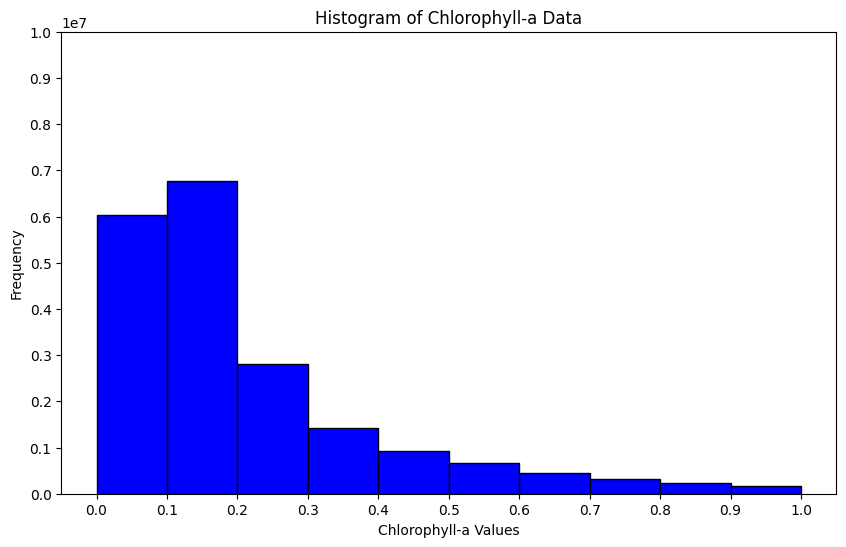

<Figure size 1000x600 with 0 Axes>

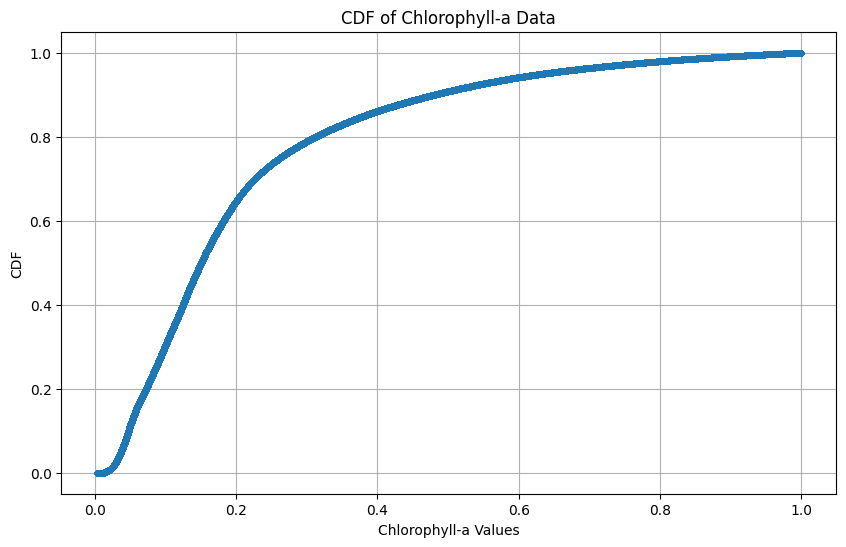


Value Range: (0, 0.5)
Fraction_Valid:  0.48165514617626887
Mean: 0.16368892788887024
Standard Deviation: 0.11018934845924377
50th Percentile: 0.13780661672353745
80th Percentile: 0.2436931371688843
90th Percentile: 0.3335564553737641
max_frequency::  
3845005.0


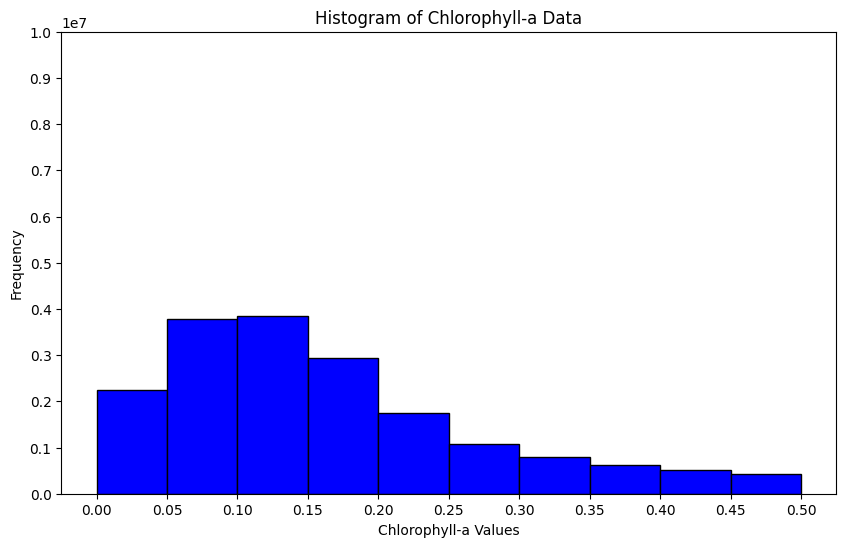

<Figure size 1000x600 with 0 Axes>

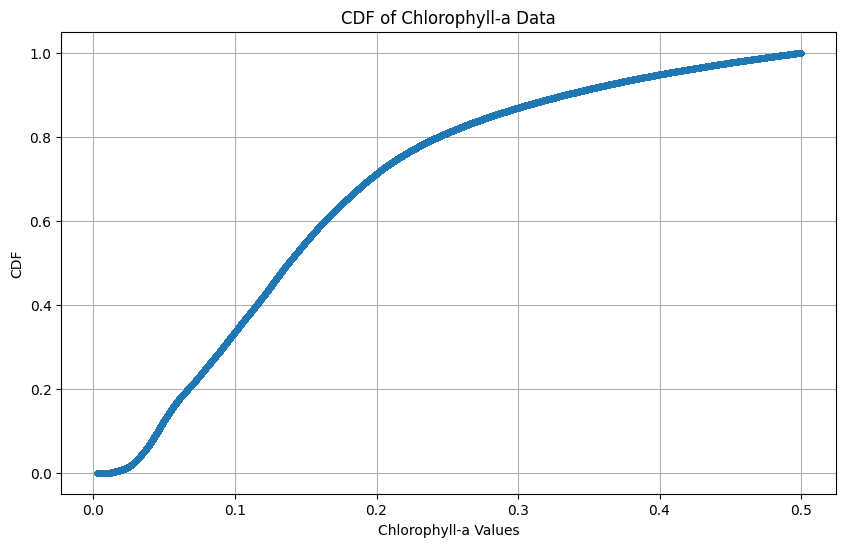


Value Range: (0, 0.25)
Fraction_Valid:  0.38985730667009605
Mean: 0.11963964253664017
Standard Deviation: 0.06028330698609352
50th Percentile: 0.11636598780751228
80th Percentile: 0.1778269112110138
90th Percentile: 0.20632074028253555
max_frequency::  
1977067.0


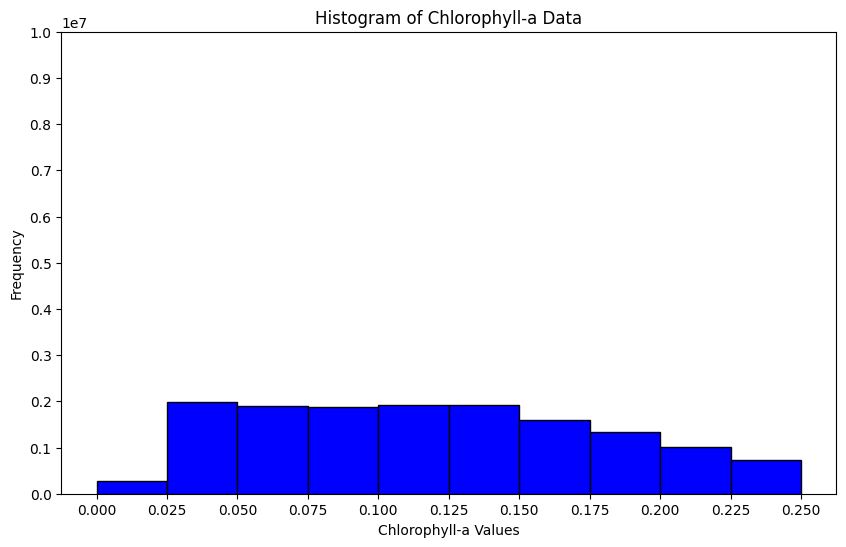

<Figure size 1000x600 with 0 Axes>

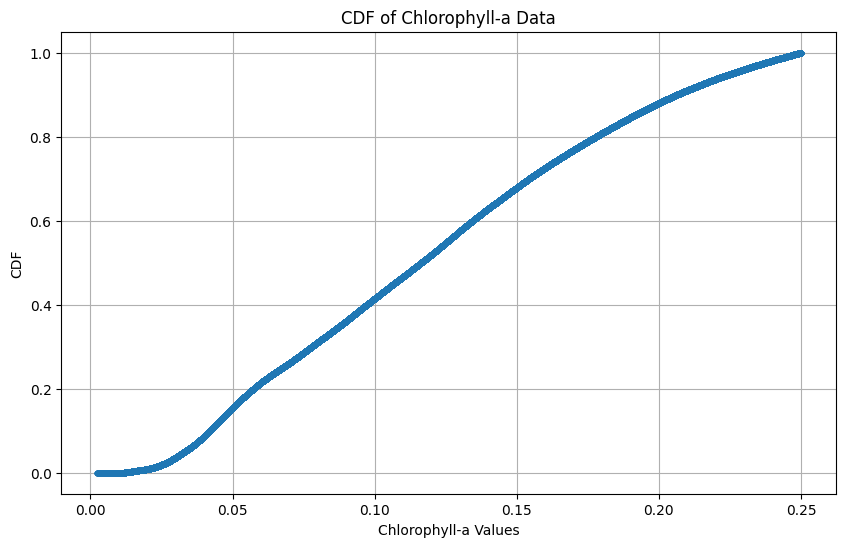


Value Range: (0, 0.1)
Fraction_Valid:  0.1616934585048011
Mean: 0.06052862107753754
Standard Deviation: 0.02245018072426319
50th Percentile: 0.058654697611927986
80th Percentile: 0.08421332389116287
90th Percentile: 0.09220549091696739
max_frequency::  
993175.0


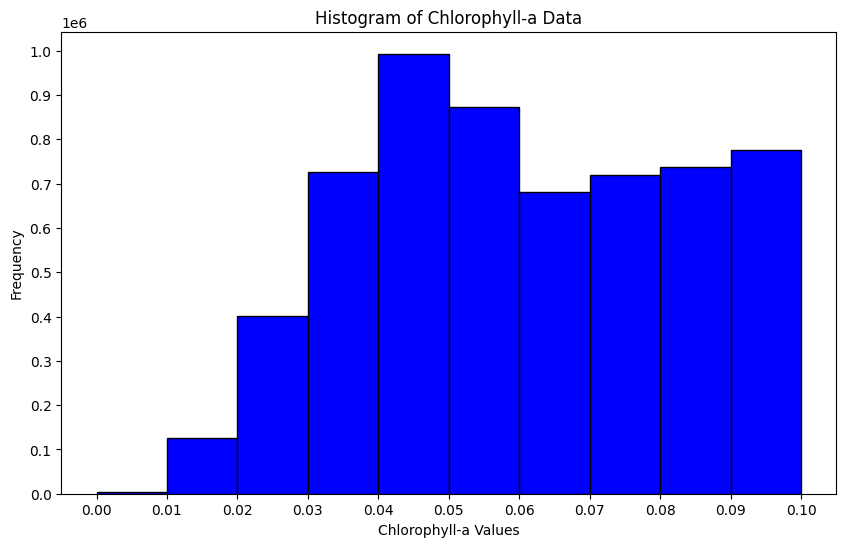

<Figure size 1000x600 with 0 Axes>

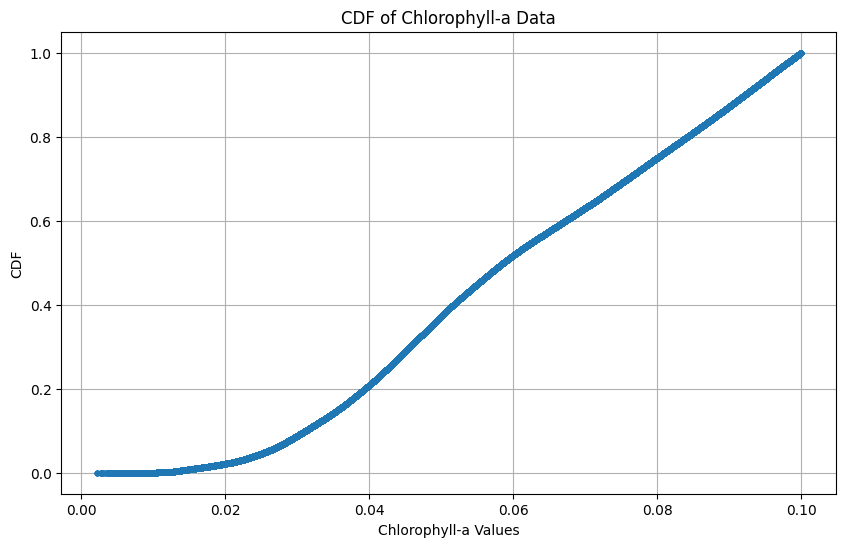


Value Range: (0.01, 1)
Fraction_Valid:  0.5303479188100138
Mean: 0.21134351193904877
Standard Deviation: 0.18744713068008423
50th Percentile: 0.1502830758690834
80th Percentile: 0.3123019337654114
90th Percentile: 0.4803784072399142
max_frequency::  
6718249.0


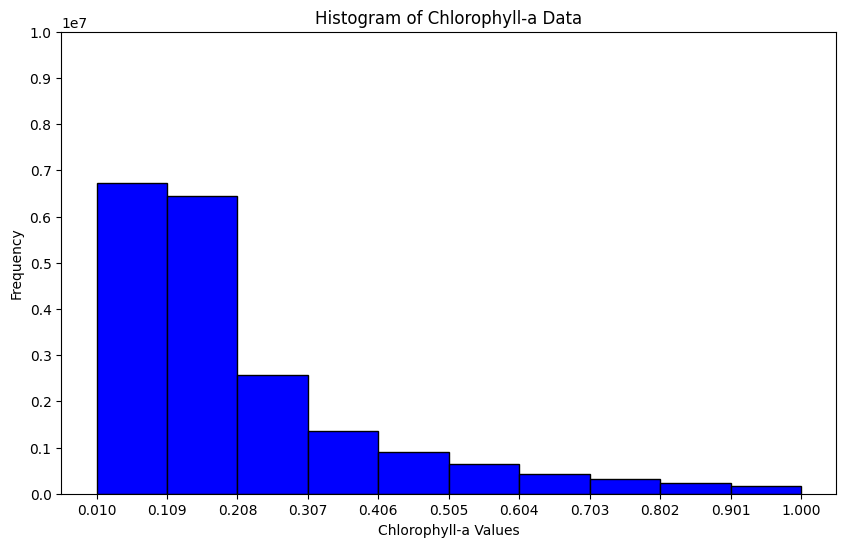

<Figure size 1000x600 with 0 Axes>

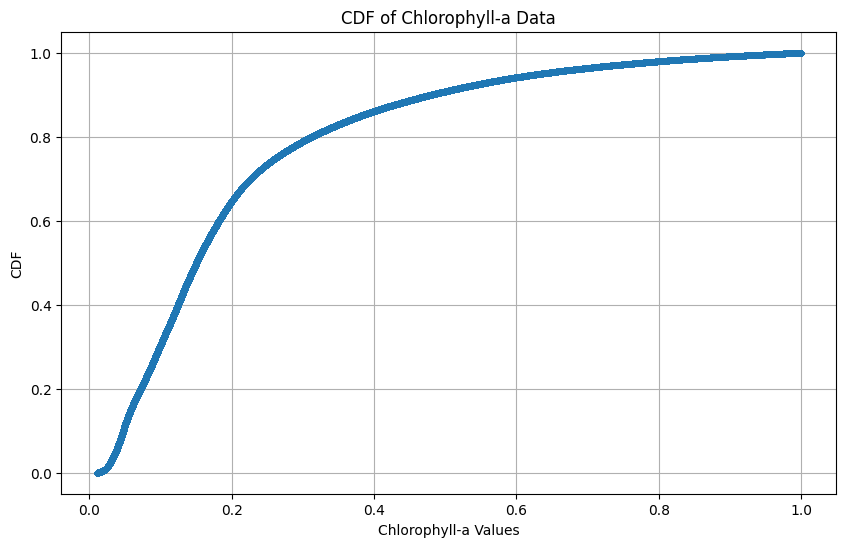


Value Range: (0.01, 0.5)
Fraction_Valid:  0.48158090599279835
Mean: 0.16371291875839233
Standard Deviation: 0.11018075793981552
50th Percentile: 0.1378258764743805
80th Percentile: 0.24371343851089478
90th Percentile: 0.33357709646224976
max_frequency::  
3721150.0


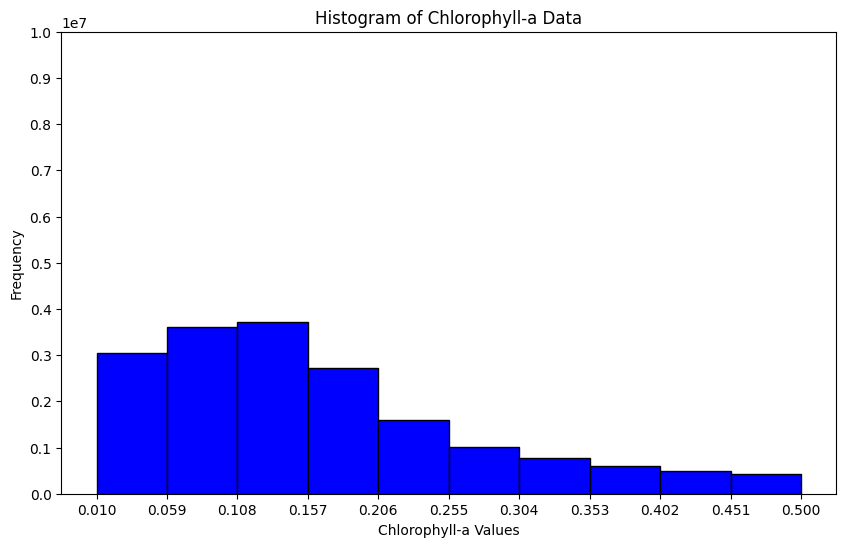

<Figure size 1000x600 with 0 Axes>

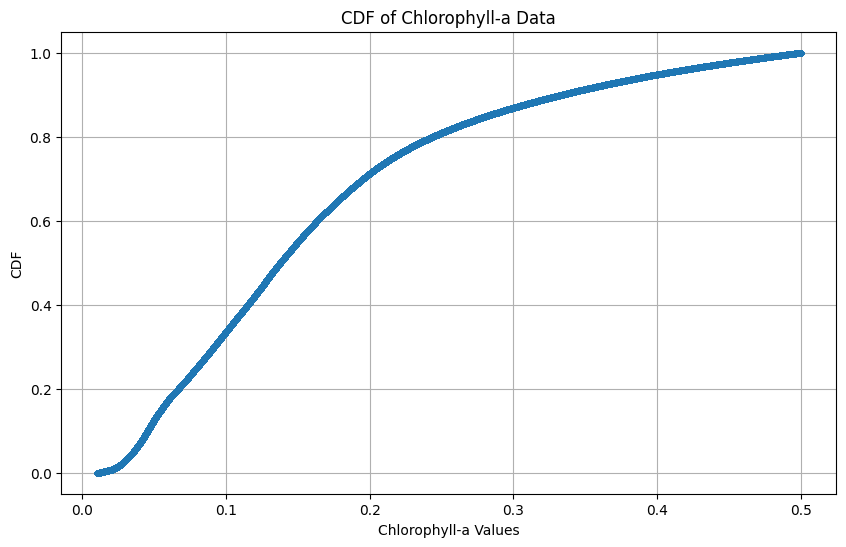


Value Range: (0.01, 0.25)
Fraction_Valid:  0.38978306648662553
Mean: 0.11966082453727722
Standard Deviation: 0.06026912480592728
50th Percentile: 0.11638427525758743
80th Percentile: 0.17783652544021608
90th Percentile: 0.2063274085521698
max_frequency::  
2177723.0


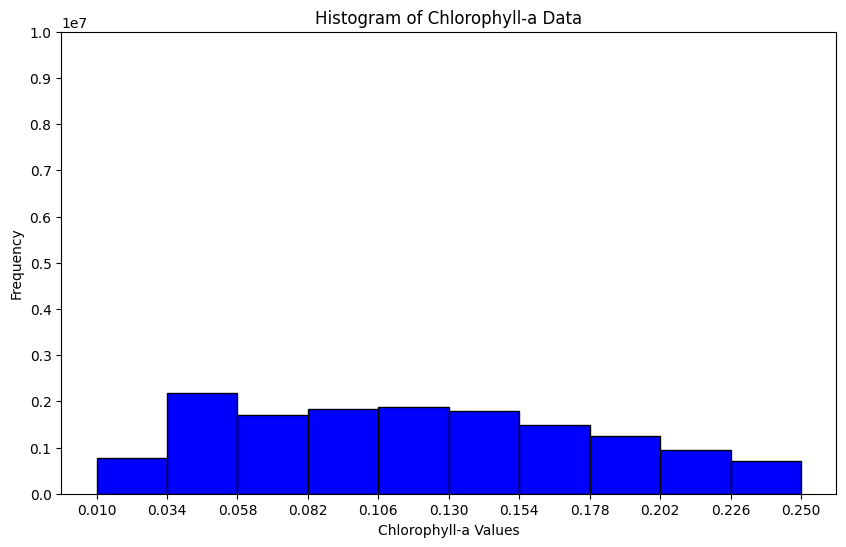

<Figure size 1000x600 with 0 Axes>

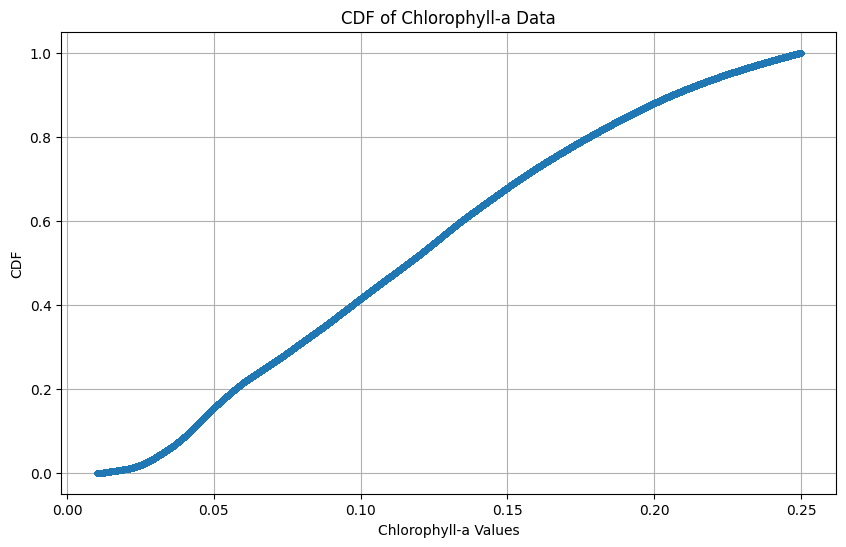


Value Range: (0.01, 0.1)
Fraction_Valid:  0.16161921832133058
Mean: 0.060552969574928284
Standard Deviation: 0.022426526993513107
50th Percentile: 0.058672551065683365
80th Percentile: 0.08422106653451919
90th Percentile: 0.09220880270004278
max_frequency::  
866765.0


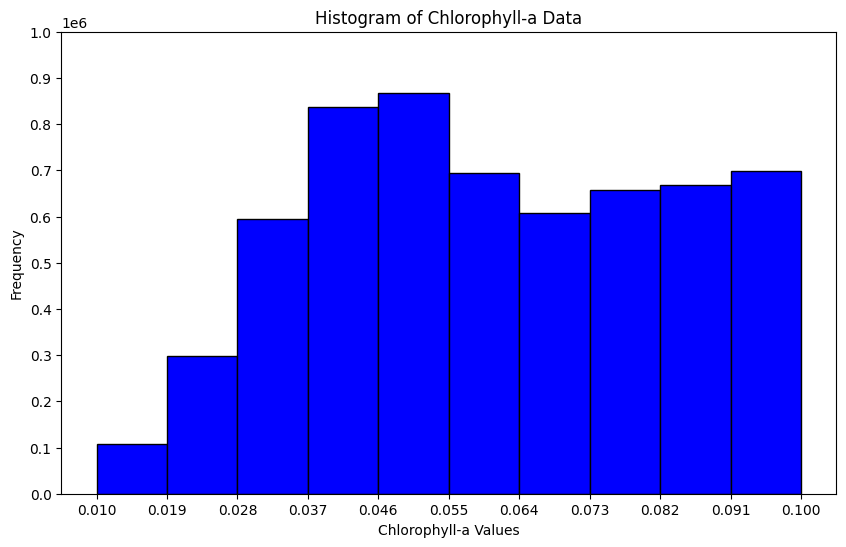

<Figure size 1000x600 with 0 Axes>

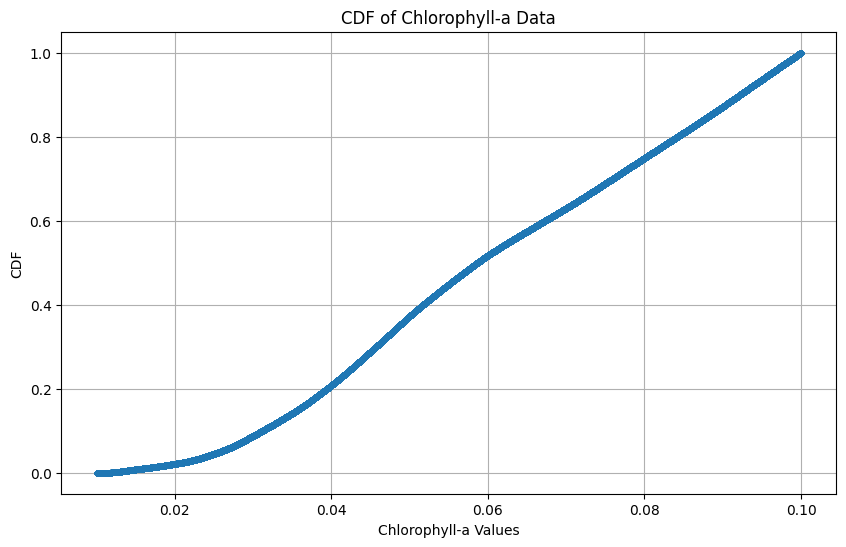

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

def plot_histogram(chlorA_data, value_range):
    chlorA_data = chlorA_data[(chlorA_data >= value_range[0]) & (chlorA_data <= value_range[1])]
    
    plt.figure(figsize=(10,6))
    
    bins = np.linspace(value_range[0], value_range[1], 11)
    hist, bins, patches = plt.hist(chlorA_data, bins=bins, edgecolor='black', color='blue')
    
    plt.xticks(bins)
    
    y_max = max(hist)
    print(y_max)
    a =10**( len(str(int(y_max)))-1  )
    arr=np.array([])
    for i in range(11) :
        arr=np.append(arr,a*i)
    
    plt.yticks(arr)
    
    plt.xlabel('Chlorophyll-a Values')
    plt.ylabel('Frequency')
    plt.title('Histogram of Chlorophyll-a Data')
    
    plt.show()

import numpy as np
import matplotlib.pyplot as plt

def plot_cdf(value_range, chlorA_data):
    filtered_data = chlorA_data[(chlorA_data >= value_range[0]) & (chlorA_data <= value_range[1])]
    
    # Sort the filtered data
    plt.figure(figsize=(10,6))
    sorted_data = np.sort(filtered_data)
    
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_data, cdf, marker='.', linestyle='none')
    
    plt.xlabel('Chlorophyll-a Values')
    plt.ylabel('CDF')
    plt.title('CDF of Chlorophyll-a Data')
    
    plt.grid(True)
    plt.show()

import numpy as np
import netCDF4 as nc

nc_file = nc.Dataset('AQUA_MODIS.20020101_20021231.L3m.YR.CHL.chlor_a.4km.nc', 'r')  # Open file in read mode

chlorA_data = nc_file.variables['chlor_a'][:]
fill_value = -32767.0
chlorA_data = chlorA_data.flatten()
chlorA_data=chlorA_data[:]
regional_pixels=chlorA_data.shape[0]
chlorA_data= np.where(~np.isnan(chlorA_data), chlorA_data, np.nan)
chlorA_data= chlorA_data.flatten()
chlorA_data= chlorA_data[chlorA_data != fill_value]


latitudes = nc_file.variables['lat'][:]
fill_value = -999.0
nc_file.close()
latitudes = np.where(~np.isnan(latitudes), latitudes, np.nan)
latitudes = latitudes.flatten()
latitudes = latitudes[latitudes != fill_value]


# Define latitude bands
latitude_bands = {
    #"30N-30S": (latitudes >= -30) & (latitudes <= 30),
    #"60N-60S": (latitudes >= -60) & (latitudes <= 60),
    #"90N-90S": np.full_like(latitudes, True, dtype=bool)
    "(30-60)N-(30-60)S": ( (latitudes>=-60) & (latitudes<=-30) & (latitudes>=30) & (latitudes<=60) )
}

value_ranges = [
    (0, 1), (0, 0.5), (0, 0.25), (0, 0.1),
    (0.01, 1), (0.01, 0.5), (0.01, 0.25), (0.01, 0.1)
]

def calculate_metrics(chlorA_data):
    mean_value = np.mean(chlorA_data)
    std_dev = np.std(chlorA_data)
    percentiles = np.percentile(chlorA_data, [50, 80, 90])
    return mean_value, std_dev, percentiles

for band_name, band_filter in latitude_bands.items():
    filtered_latitudes = latitudes[band_filter]
    filtered_values=chlorA_data[:];
    
    print(f"\nLatitude Band: {band_name}")
    for value_range in value_ranges:
        range_filter = (filtered_values >= value_range[0]) & (filtered_values <= value_range[1])
        filtered_data = filtered_values[range_filter]
        valid_pixels=filtered_data.shape[0]
        Fraction_Valid=valid_pixels/regional_pixels
        
        if len(filtered_data) > 0:
            mean_value, std_dev, percentiles = calculate_metrics(filtered_data)
            print(f"\nValue Range: {value_range}")
            print(f"Fraction_Valid: ",Fraction_Valid)
            print(f"Mean: {mean_value}")
            print(f"Standard Deviation: {std_dev}")
            print(f"50th Percentile: {percentiles[0]}")
            print(f"80th Percentile: {percentiles[1]}")
            print(f"90th Percentile: {percentiles[2]}")
            print("max_frequency::  ")
            p=plot_histogram(chlorA_data, value_range)
            plot_cdf(value_range, chlorA_data)
        else:
            print(f"\nValue Range: {value_range}")
            print("No data in this range.")



Latitude Band: 30N-30S

Value Range: (0, 1)
Fraction_Valid:  0.5304221589934842
Mean: 0.21131481230258942
Standard Deviation: 0.1874496191740036
50th Percentile: 0.15026403963565826
80th Percentile: 0.312269389629364
90th Percentile: 0.4803459048271179
max_frequency::  
6772706.0


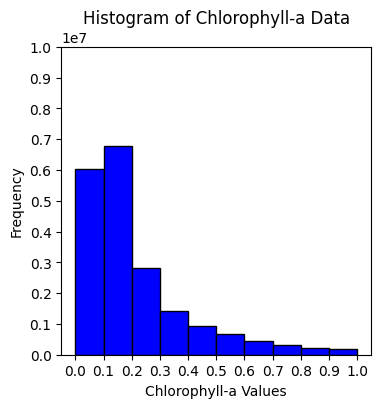

<Figure size 400x400 with 0 Axes>

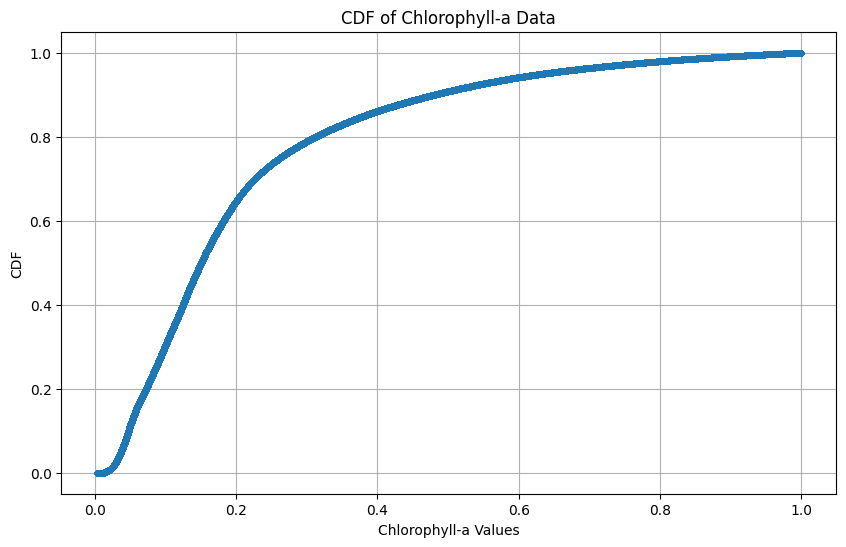


Value Range: (0, 0.5)
Fraction_Valid:  0.48165514617626887
Mean: 0.16368892788887024
Standard Deviation: 0.11018934845924377
50th Percentile: 0.13780661672353745
80th Percentile: 0.2436931371688843
90th Percentile: 0.3335564553737641
max_frequency::  
3845005.0


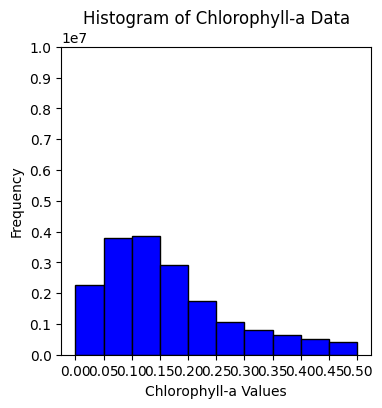

<Figure size 400x400 with 0 Axes>

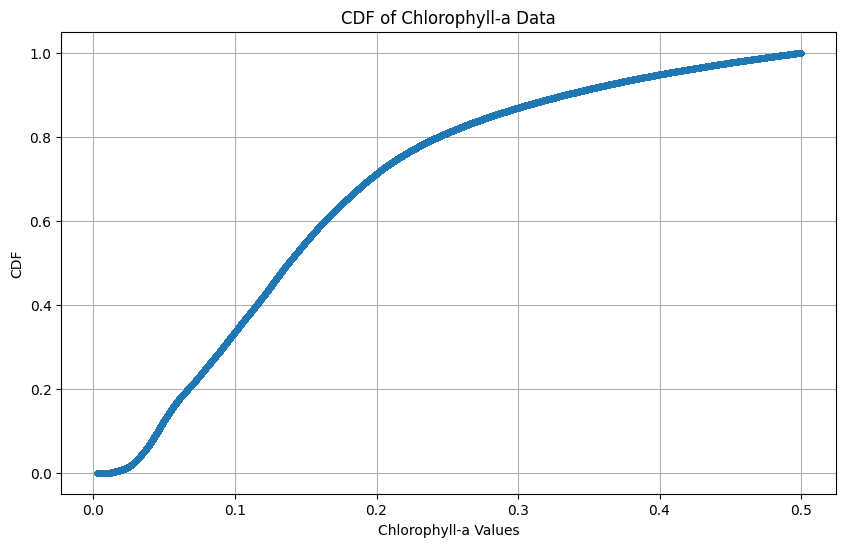


Value Range: (0, 0.25)
Fraction_Valid:  0.38985730667009605
Mean: 0.11963964253664017
Standard Deviation: 0.06028330698609352
50th Percentile: 0.11636598780751228
80th Percentile: 0.1778269112110138
90th Percentile: 0.20632074028253555
max_frequency::  
1977067.0


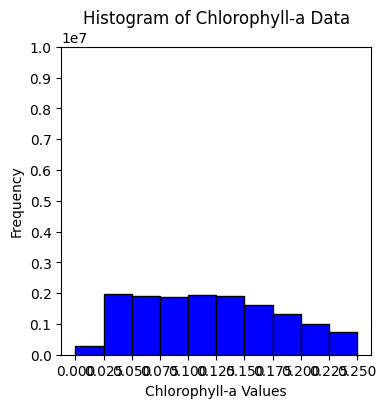

<Figure size 400x400 with 0 Axes>

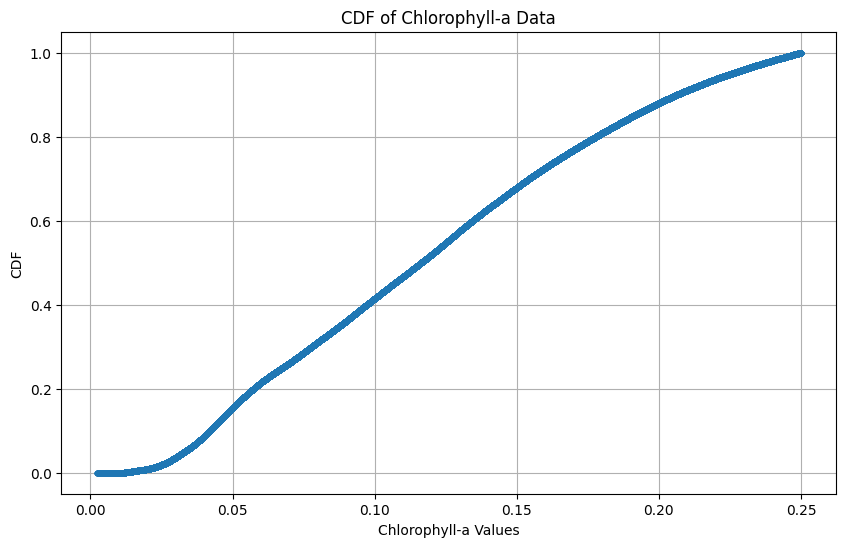


Value Range: (0, 0.1)
Fraction_Valid:  0.1616934585048011
Mean: 0.06052862107753754
Standard Deviation: 0.02245018072426319
50th Percentile: 0.058654697611927986
80th Percentile: 0.08421332389116287
90th Percentile: 0.09220549091696739
max_frequency::  
993175.0


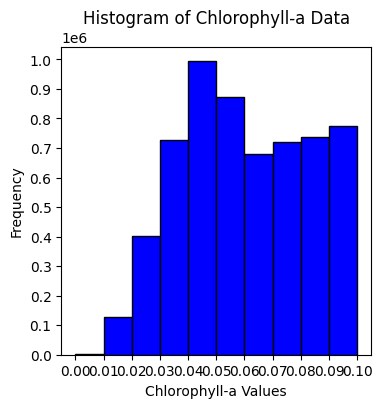

<Figure size 400x400 with 0 Axes>

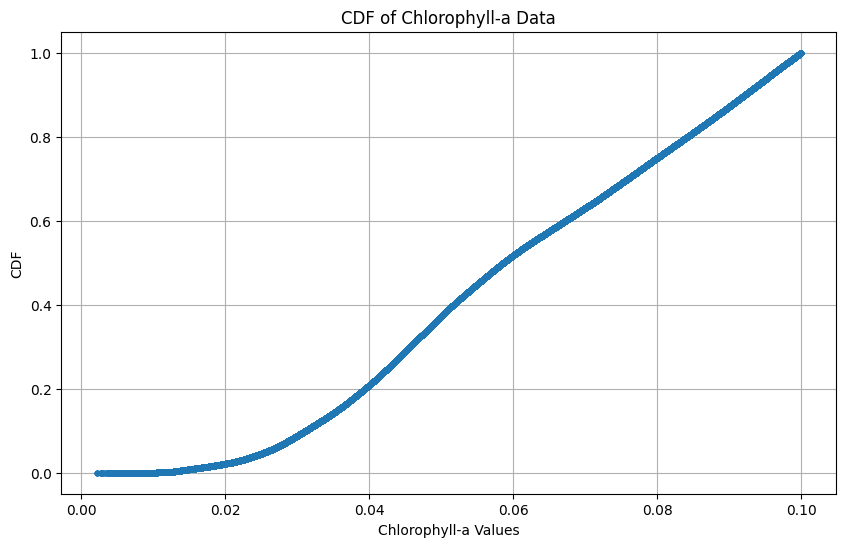


Value Range: (0.01, 1)
Fraction_Valid:  0.5303479188100138
Mean: 0.21134351193904877
Standard Deviation: 0.18744713068008423
50th Percentile: 0.1502830758690834
80th Percentile: 0.3123019337654114
90th Percentile: 0.4803784072399142
max_frequency::  
6718249.0


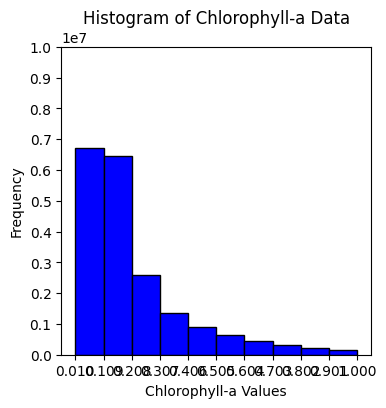

<Figure size 400x400 with 0 Axes>

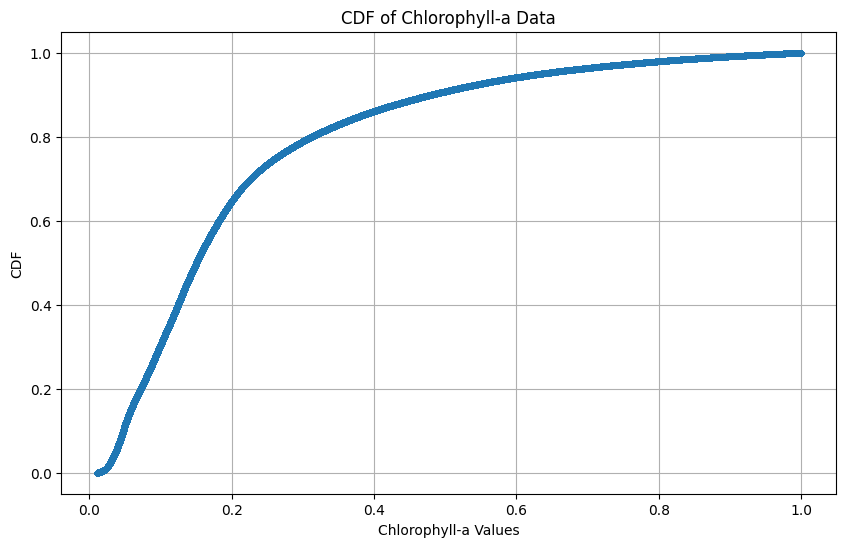


Value Range: (0.01, 0.5)
Fraction_Valid:  0.48158090599279835
Mean: 0.16371291875839233
Standard Deviation: 0.11018075793981552
50th Percentile: 0.1378258764743805
80th Percentile: 0.24371343851089478
90th Percentile: 0.33357709646224976
max_frequency::  
3721150.0


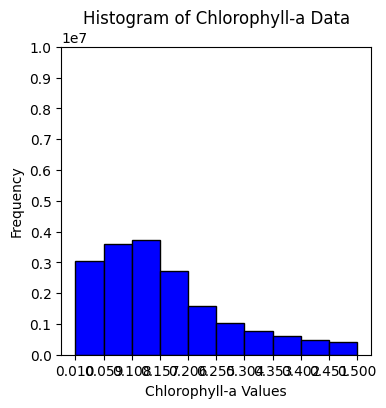

<Figure size 400x400 with 0 Axes>

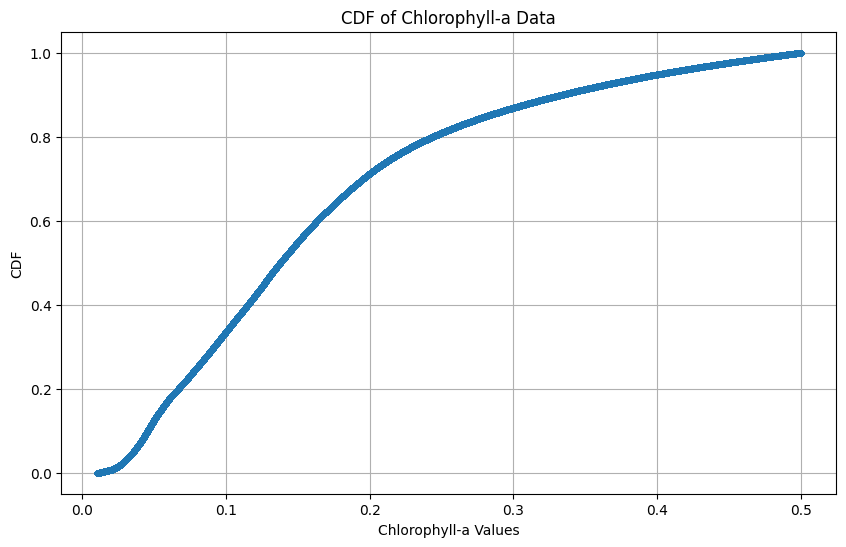


Value Range: (0.01, 0.25)
Fraction_Valid:  0.38978306648662553
Mean: 0.11966082453727722
Standard Deviation: 0.06026912480592728
50th Percentile: 0.11638427525758743
80th Percentile: 0.17783652544021608
90th Percentile: 0.2063274085521698
max_frequency::  
2177723.0


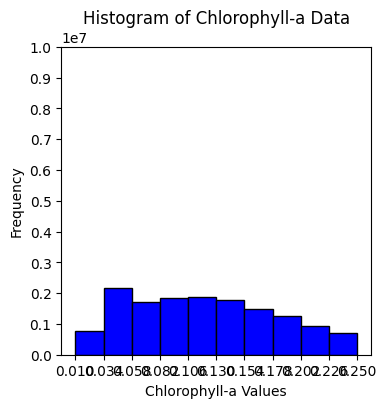

<Figure size 400x400 with 0 Axes>

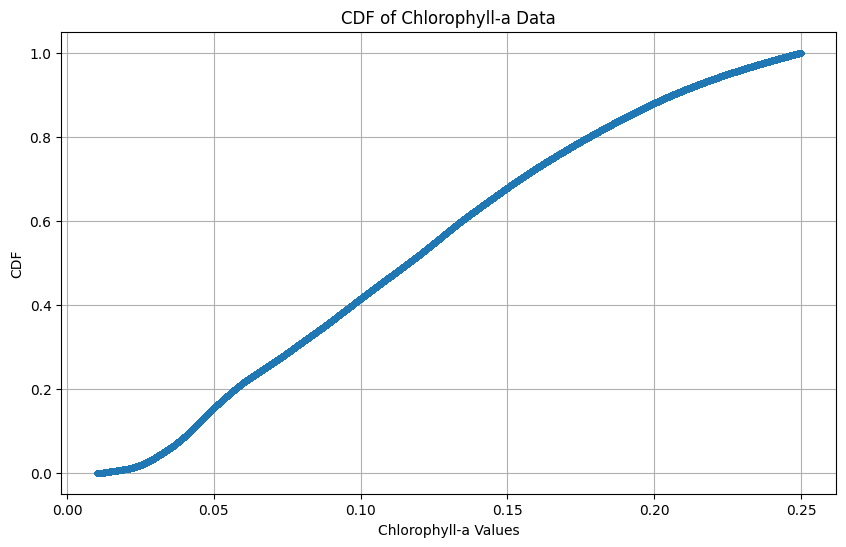


Value Range: (0.01, 0.1)
Fraction_Valid:  0.16161921832133058
Mean: 0.060552969574928284
Standard Deviation: 0.022426526993513107
50th Percentile: 0.058672551065683365
80th Percentile: 0.08422106653451919
90th Percentile: 0.09220880270004278
max_frequency::  
866765.0


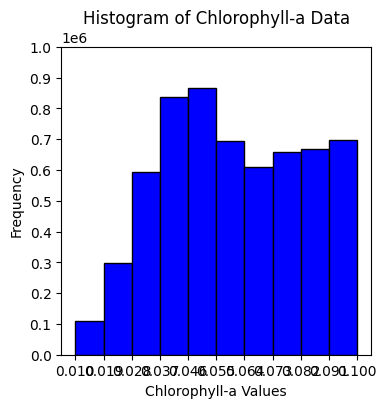

<Figure size 400x400 with 0 Axes>

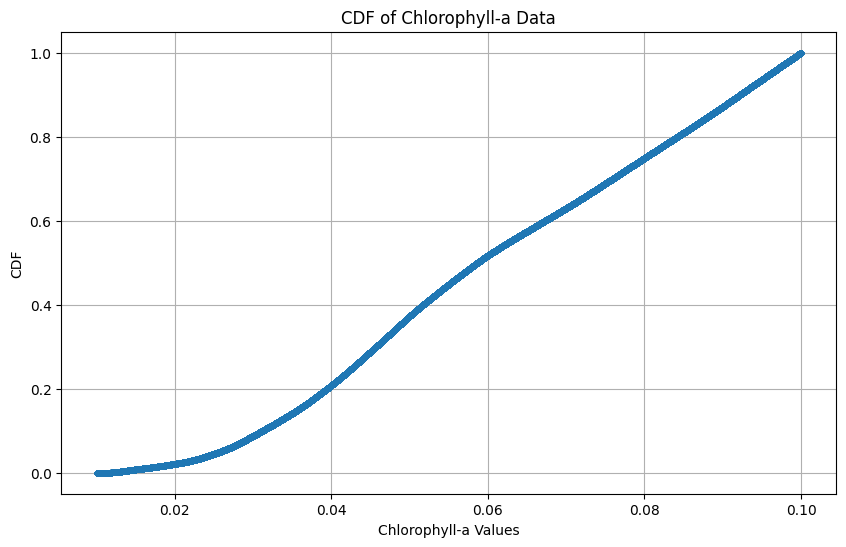


Latitude Band: 60N-60S

Value Range: (0, 1)
Fraction_Valid:  0.5304221589934842
Mean: 0.21131481230258942
Standard Deviation: 0.1874496191740036
50th Percentile: 0.15026403963565826
80th Percentile: 0.312269389629364
90th Percentile: 0.4803459048271179
max_frequency::  
6772706.0


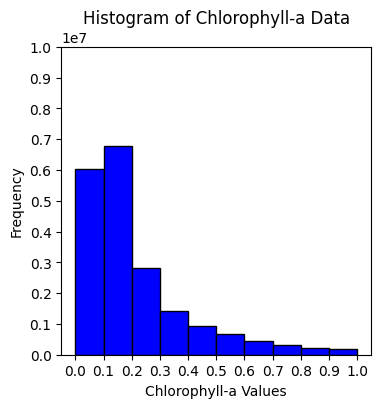

<Figure size 400x400 with 0 Axes>

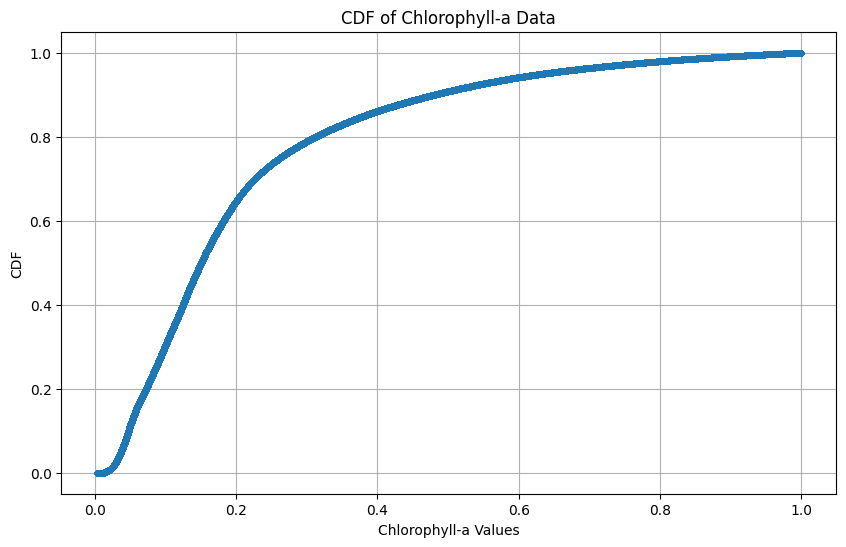


Value Range: (0, 0.5)
Fraction_Valid:  0.48165514617626887
Mean: 0.16368892788887024
Standard Deviation: 0.11018934845924377
50th Percentile: 0.13780661672353745
80th Percentile: 0.2436931371688843
90th Percentile: 0.3335564553737641
max_frequency::  
3845005.0


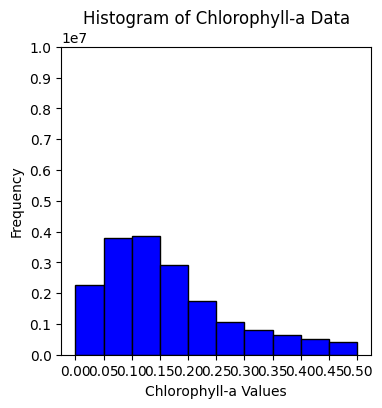

<Figure size 400x400 with 0 Axes>

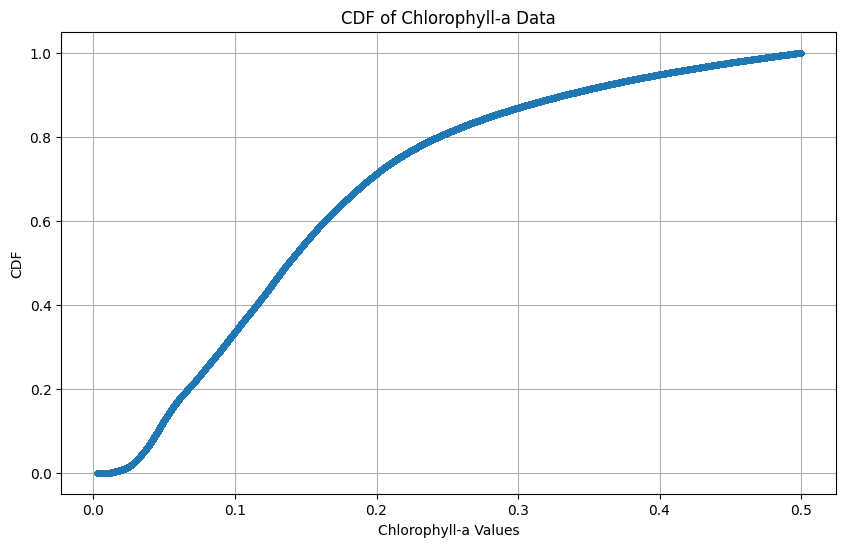


Value Range: (0, 0.25)
Fraction_Valid:  0.38985730667009605
Mean: 0.11963964253664017
Standard Deviation: 0.06028330698609352
50th Percentile: 0.11636598780751228
80th Percentile: 0.1778269112110138
90th Percentile: 0.20632074028253555
max_frequency::  
1977067.0


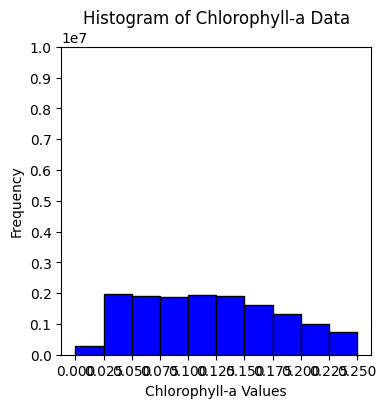

<Figure size 400x400 with 0 Axes>

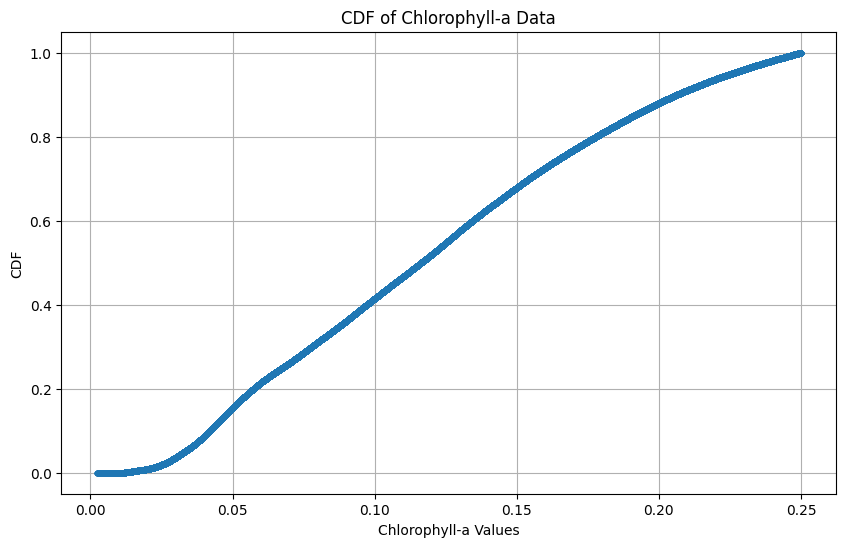


Value Range: (0, 0.1)
Fraction_Valid:  0.1616934585048011
Mean: 0.06052862107753754
Standard Deviation: 0.02245018072426319
50th Percentile: 0.058654697611927986
80th Percentile: 0.08421332389116287
90th Percentile: 0.09220549091696739
max_frequency::  
993175.0


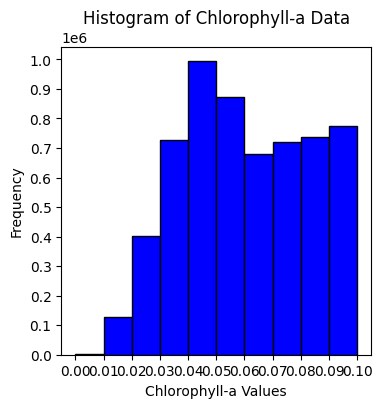

<Figure size 400x400 with 0 Axes>

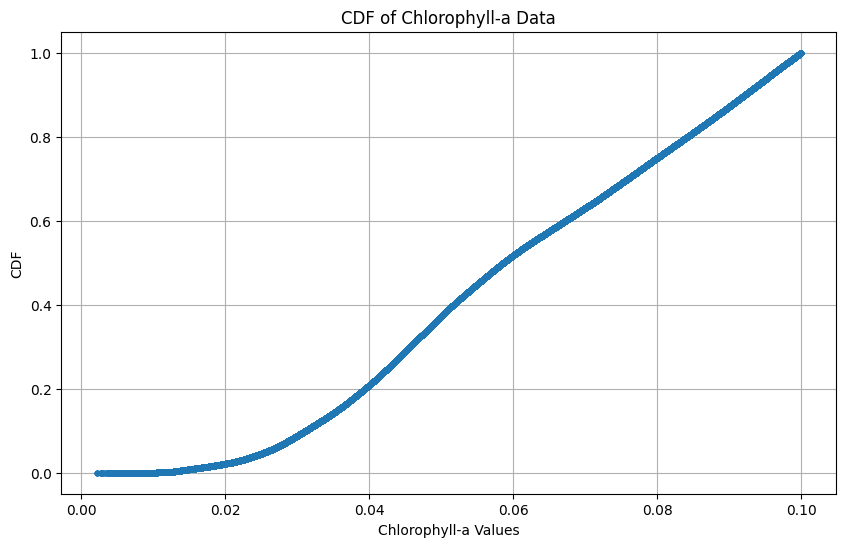


Value Range: (0.01, 1)
Fraction_Valid:  0.5303479188100138
Mean: 0.21134351193904877
Standard Deviation: 0.18744713068008423
50th Percentile: 0.1502830758690834
80th Percentile: 0.3123019337654114
90th Percentile: 0.4803784072399142
max_frequency::  
6718249.0


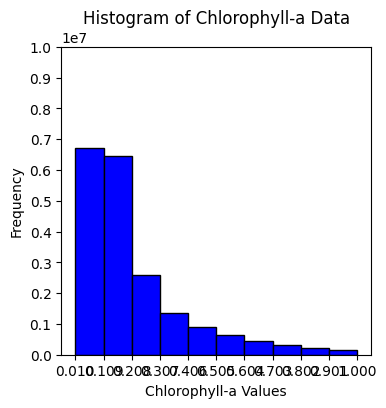

<Figure size 400x400 with 0 Axes>

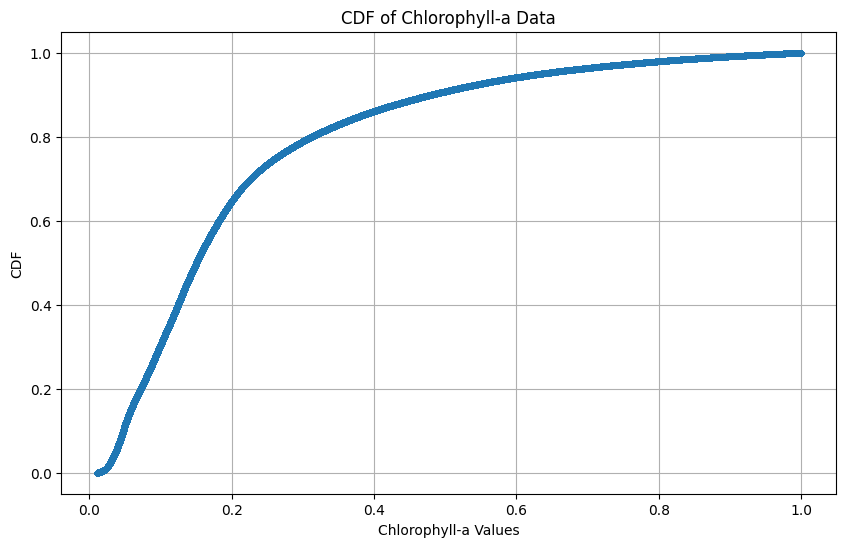


Value Range: (0.01, 0.5)
Fraction_Valid:  0.48158090599279835
Mean: 0.16371291875839233
Standard Deviation: 0.11018075793981552
50th Percentile: 0.1378258764743805
80th Percentile: 0.24371343851089478
90th Percentile: 0.33357709646224976
max_frequency::  
3721150.0


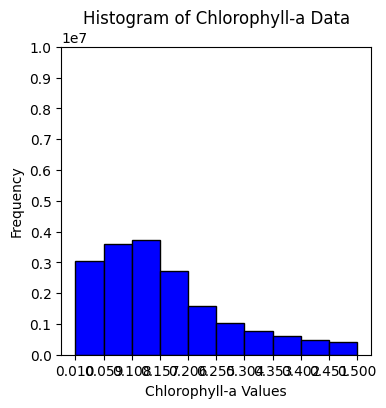

<Figure size 400x400 with 0 Axes>

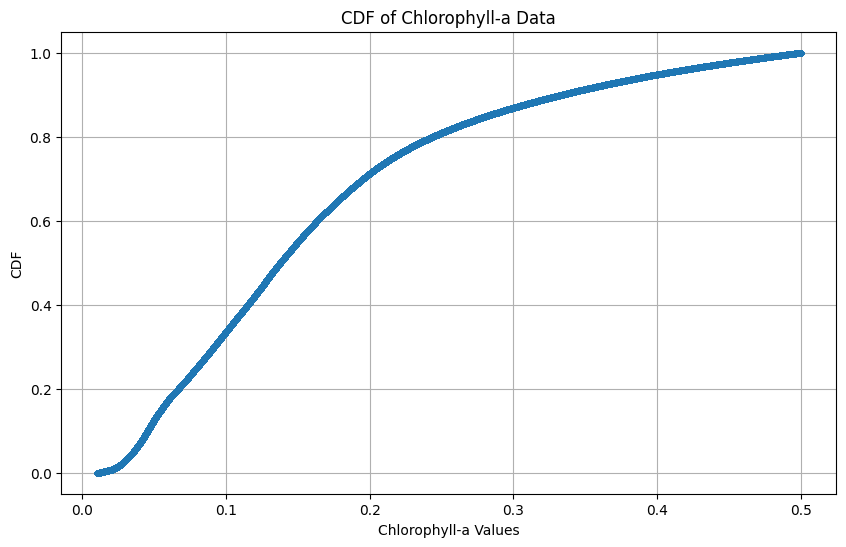


Value Range: (0.01, 0.25)
Fraction_Valid:  0.38978306648662553
Mean: 0.11966082453727722
Standard Deviation: 0.06026912480592728
50th Percentile: 0.11638427525758743
80th Percentile: 0.17783652544021608
90th Percentile: 0.2063274085521698
max_frequency::  
2177723.0


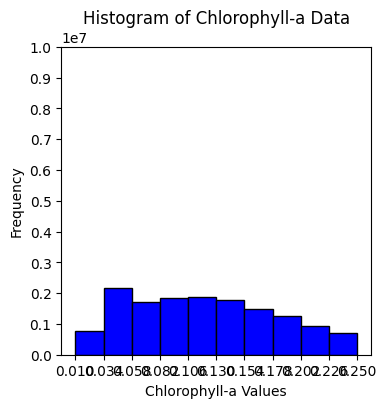

<Figure size 400x400 with 0 Axes>

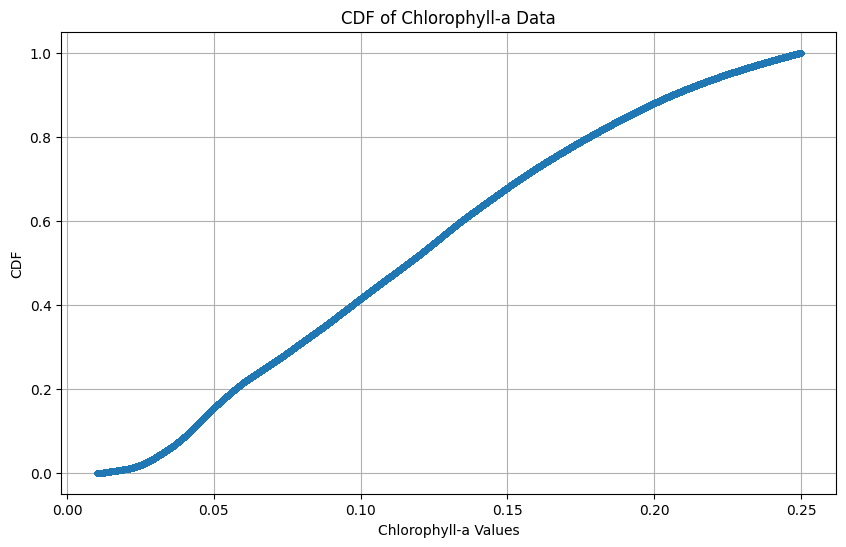


Value Range: (0.01, 0.1)
Fraction_Valid:  0.16161921832133058
Mean: 0.060552969574928284
Standard Deviation: 0.022426526993513107
50th Percentile: 0.058672551065683365
80th Percentile: 0.08422106653451919
90th Percentile: 0.09220880270004278
max_frequency::  
866765.0


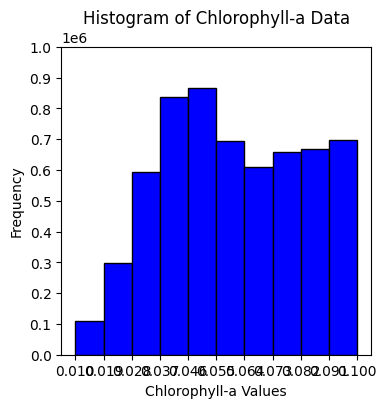

<Figure size 400x400 with 0 Axes>

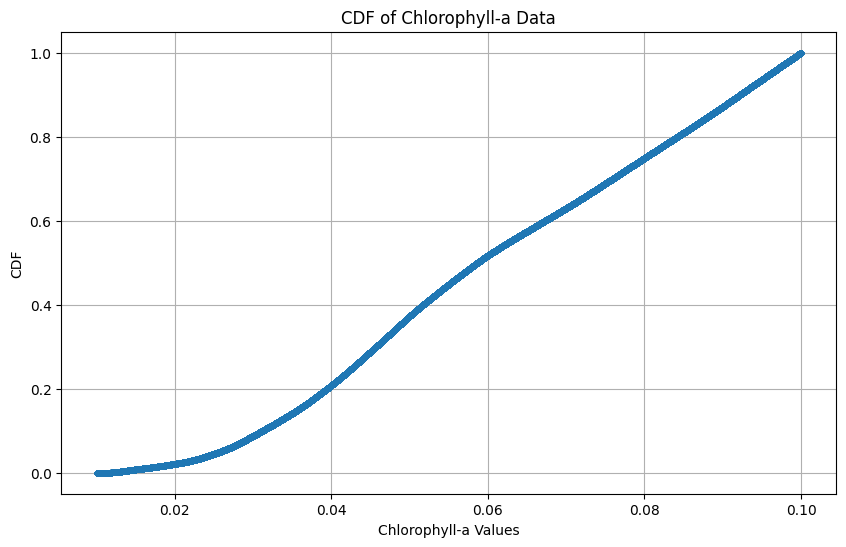


Latitude Band: 90N-90S

Value Range: (0, 1)
Fraction_Valid:  0.5304221589934842
Mean: 0.21131481230258942
Standard Deviation: 0.1874496191740036
50th Percentile: 0.15026403963565826
80th Percentile: 0.312269389629364
90th Percentile: 0.4803459048271179
max_frequency::  
6772706.0


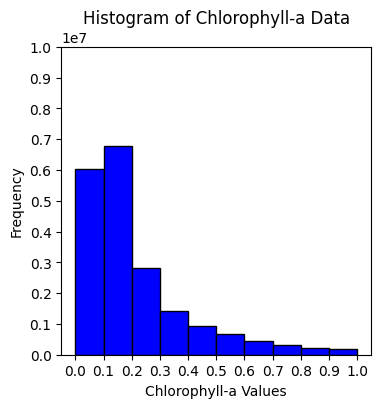

<Figure size 400x400 with 0 Axes>

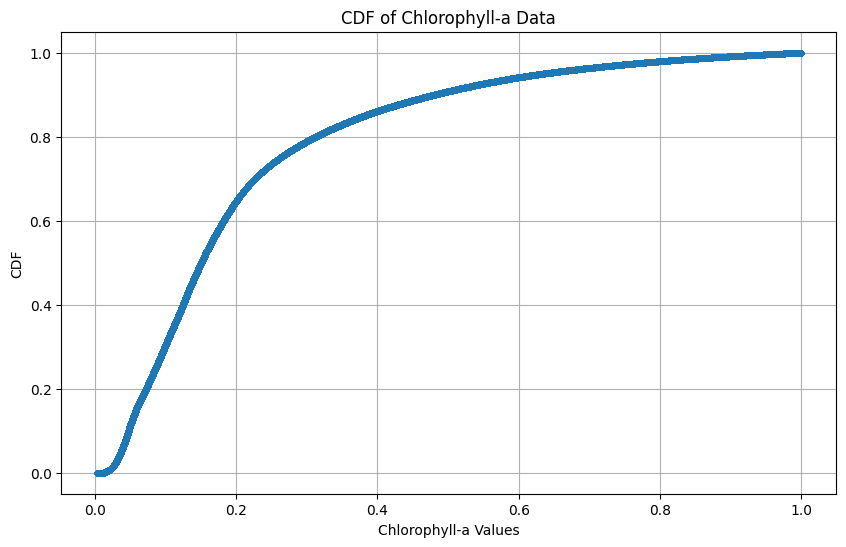


Value Range: (0, 0.5)
Fraction_Valid:  0.48165514617626887
Mean: 0.16368892788887024
Standard Deviation: 0.11018934845924377
50th Percentile: 0.13780661672353745
80th Percentile: 0.2436931371688843
90th Percentile: 0.3335564553737641
max_frequency::  
3845005.0


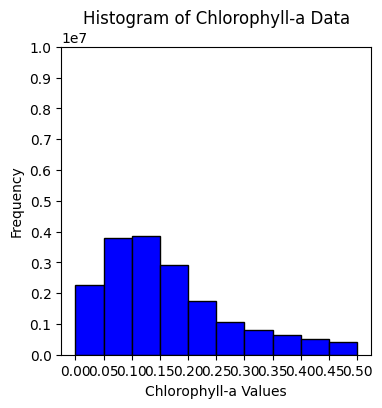

<Figure size 400x400 with 0 Axes>

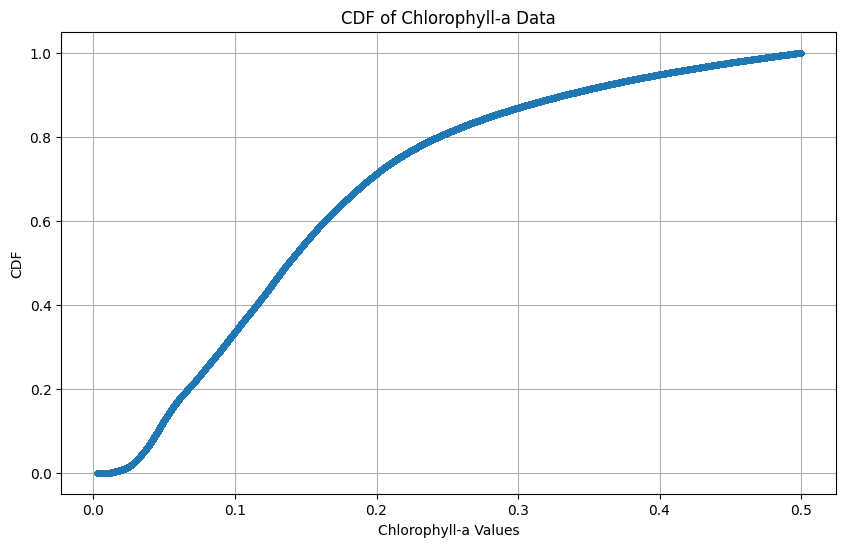


Value Range: (0, 0.25)
Fraction_Valid:  0.38985730667009605
Mean: 0.11963964253664017
Standard Deviation: 0.06028330698609352
50th Percentile: 0.11636598780751228
80th Percentile: 0.1778269112110138
90th Percentile: 0.20632074028253555
max_frequency::  
1977067.0


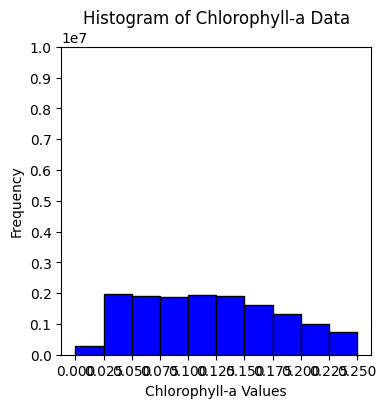

<Figure size 400x400 with 0 Axes>

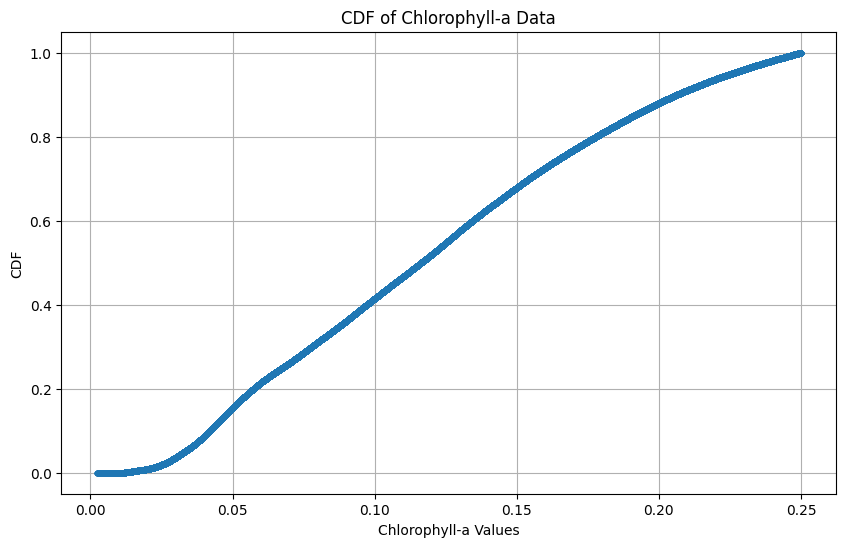


Value Range: (0, 0.1)
Fraction_Valid:  0.1616934585048011
Mean: 0.06052862107753754
Standard Deviation: 0.02245018072426319
50th Percentile: 0.058654697611927986
80th Percentile: 0.08421332389116287
90th Percentile: 0.09220549091696739
max_frequency::  
993175.0


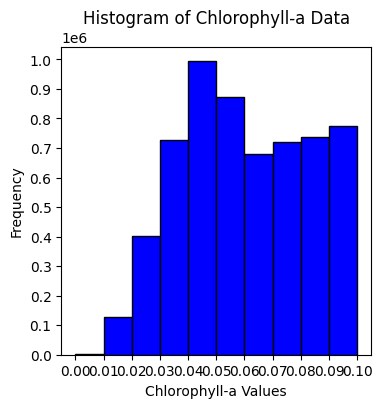

<Figure size 400x400 with 0 Axes>

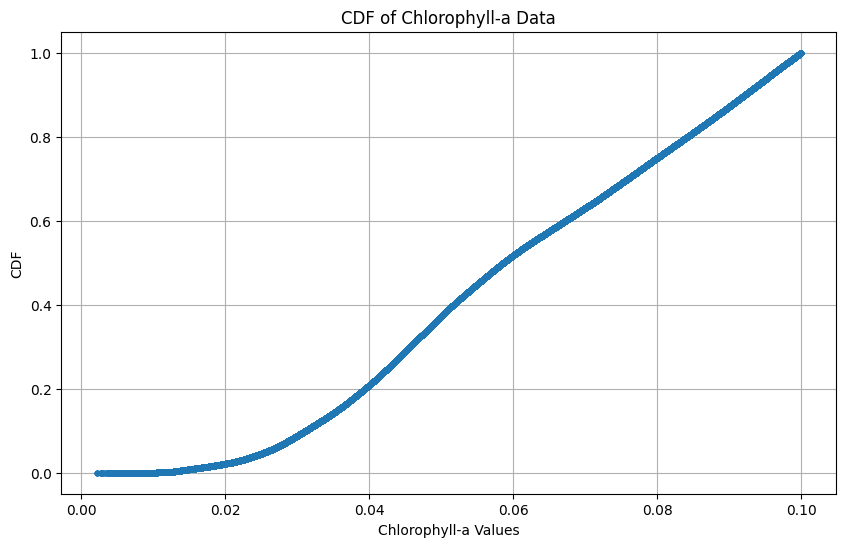


Value Range: (0.01, 1)
Fraction_Valid:  0.5303479188100138
Mean: 0.21134351193904877
Standard Deviation: 0.18744713068008423
50th Percentile: 0.1502830758690834
80th Percentile: 0.3123019337654114
90th Percentile: 0.4803784072399142
max_frequency::  
6718249.0


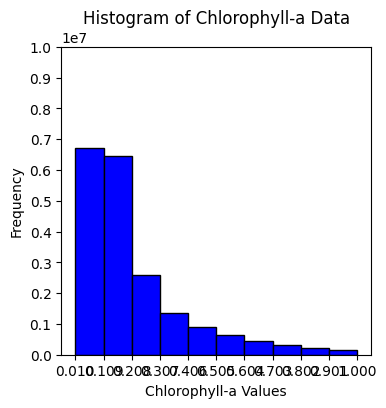

<Figure size 400x400 with 0 Axes>

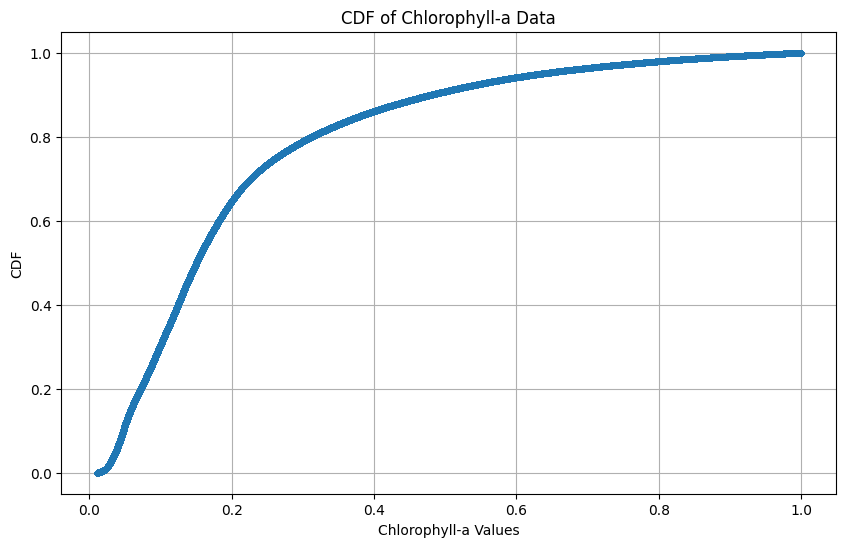


Value Range: (0.01, 0.5)
Fraction_Valid:  0.48158090599279835
Mean: 0.16371291875839233
Standard Deviation: 0.11018075793981552
50th Percentile: 0.1378258764743805
80th Percentile: 0.24371343851089478
90th Percentile: 0.33357709646224976
max_frequency::  
3721150.0


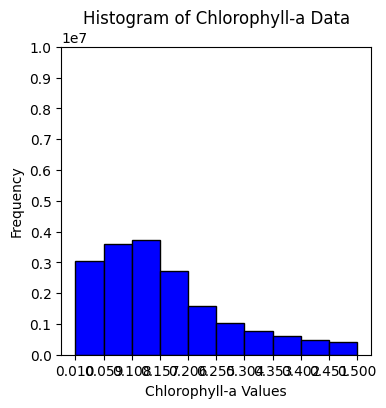

<Figure size 400x400 with 0 Axes>

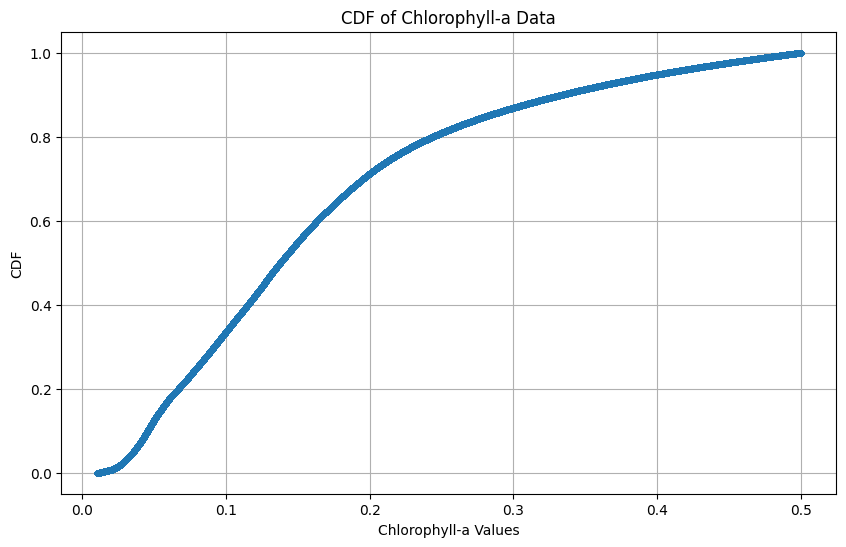


Value Range: (0.01, 0.25)
Fraction_Valid:  0.38978306648662553
Mean: 0.11966082453727722
Standard Deviation: 0.06026912480592728
50th Percentile: 0.11638427525758743
80th Percentile: 0.17783652544021608
90th Percentile: 0.2063274085521698
max_frequency::  
2177723.0


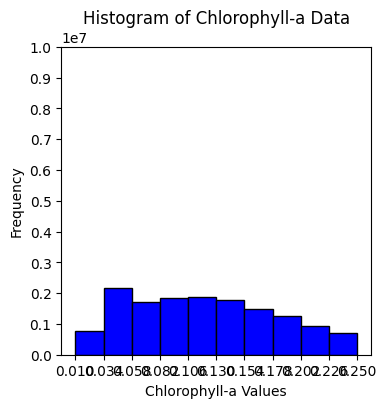

<Figure size 400x400 with 0 Axes>

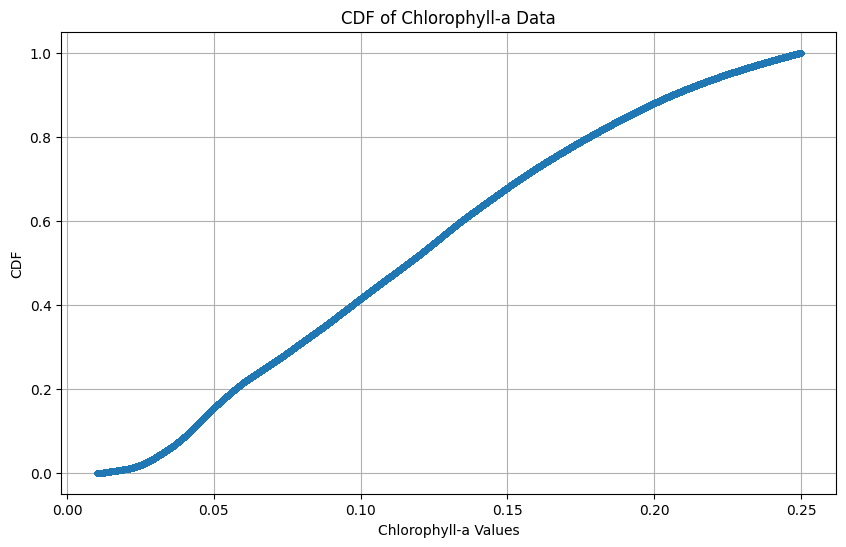


Value Range: (0.01, 0.1)
Fraction_Valid:  0.16161921832133058
Mean: 0.060552969574928284
Standard Deviation: 0.022426526993513107
50th Percentile: 0.058672551065683365
80th Percentile: 0.08422106653451919
90th Percentile: 0.09220880270004278
max_frequency::  
866765.0


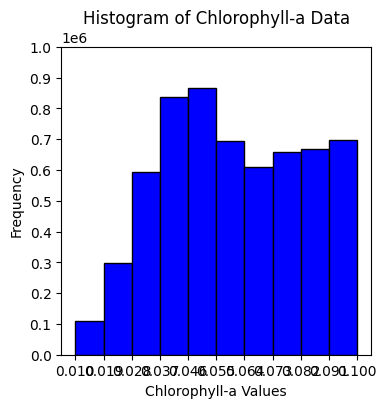

<Figure size 400x400 with 0 Axes>

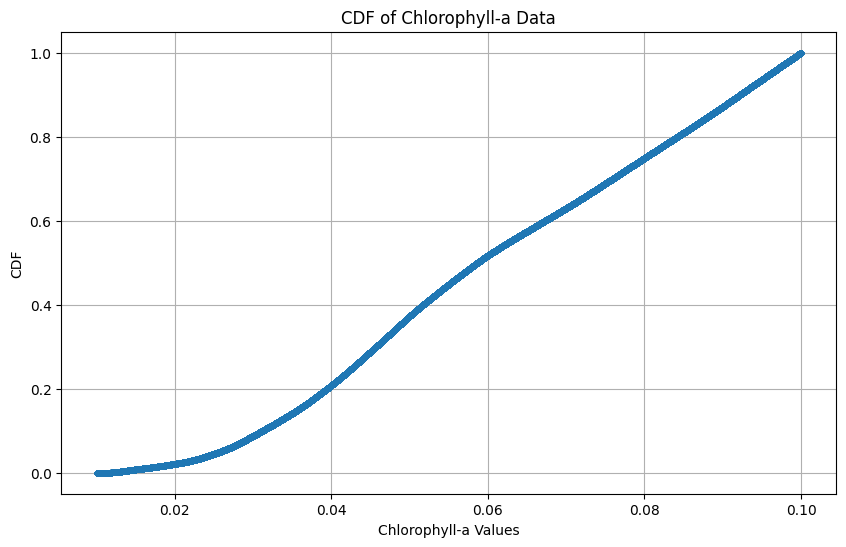


Latitude Band: (30-60)N-(30-60)S

Value Range: (0, 1)
Fraction_Valid:  0.5304221589934842
Mean: 0.21131481230258942
Standard Deviation: 0.1874496191740036
50th Percentile: 0.15026403963565826
80th Percentile: 0.312269389629364
90th Percentile: 0.4803459048271179
max_frequency::  
6772706.0


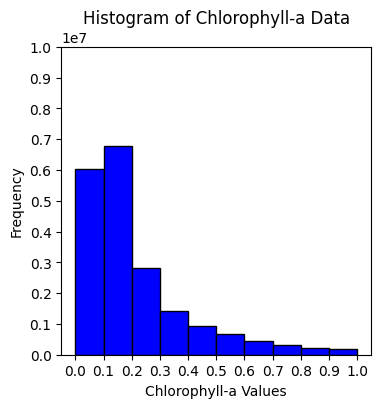

<Figure size 400x400 with 0 Axes>

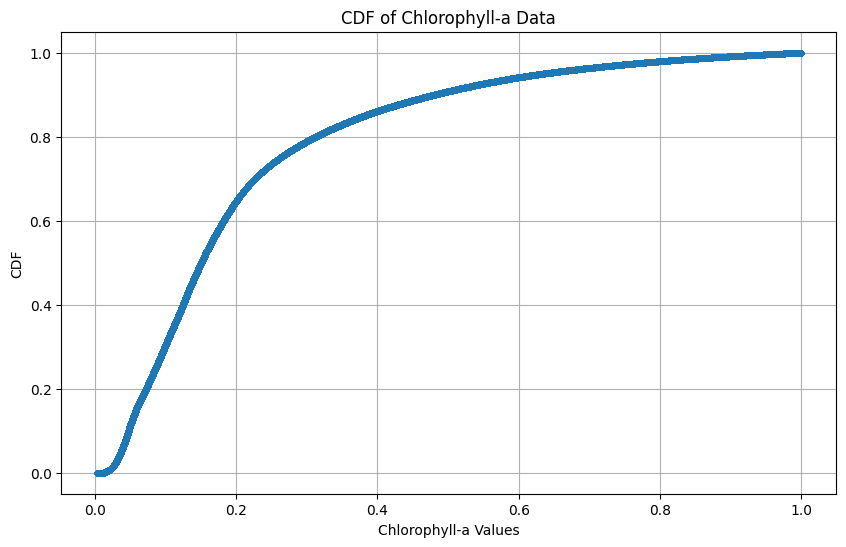


Value Range: (0, 0.5)
Fraction_Valid:  0.48165514617626887
Mean: 0.16368892788887024
Standard Deviation: 0.11018934845924377
50th Percentile: 0.13780661672353745
80th Percentile: 0.2436931371688843
90th Percentile: 0.3335564553737641
max_frequency::  
3845005.0


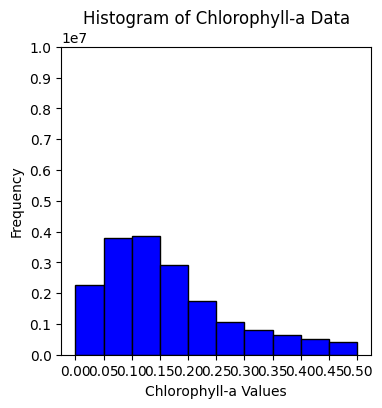

<Figure size 400x400 with 0 Axes>

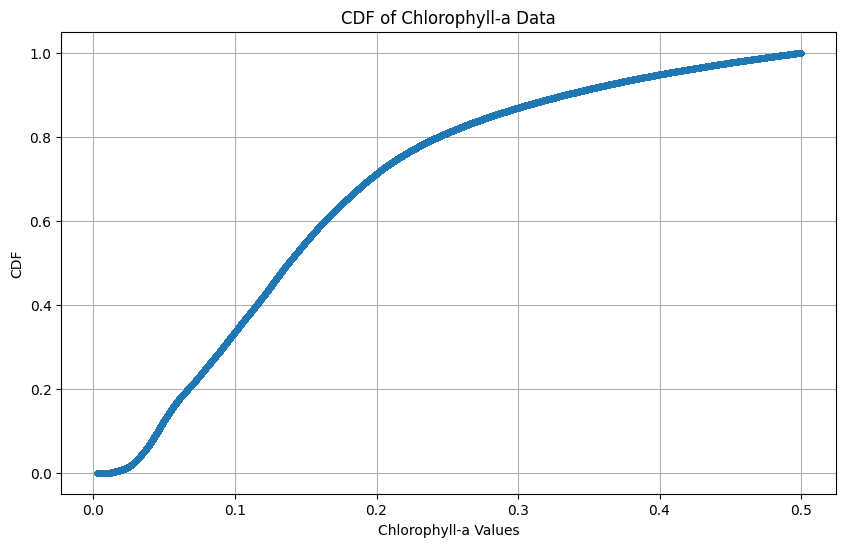


Value Range: (0, 0.25)
Fraction_Valid:  0.38985730667009605
Mean: 0.11963964253664017
Standard Deviation: 0.06028330698609352
50th Percentile: 0.11636598780751228
80th Percentile: 0.1778269112110138
90th Percentile: 0.20632074028253555
max_frequency::  
1977067.0


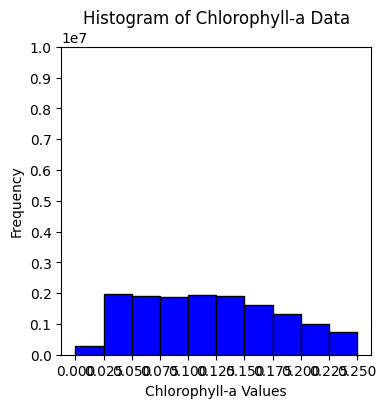

<Figure size 400x400 with 0 Axes>

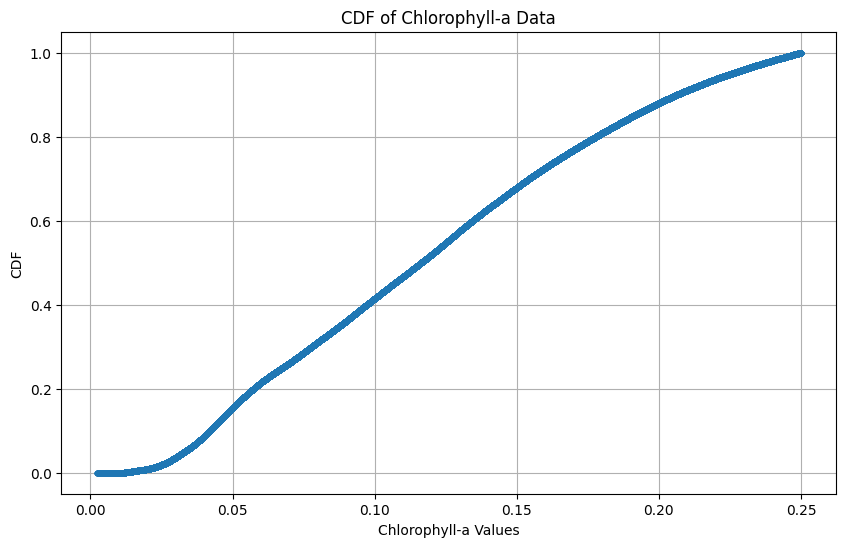


Value Range: (0, 0.1)
Fraction_Valid:  0.1616934585048011
Mean: 0.06052862107753754
Standard Deviation: 0.02245018072426319
50th Percentile: 0.058654697611927986
80th Percentile: 0.08421332389116287
90th Percentile: 0.09220549091696739
max_frequency::  
993175.0


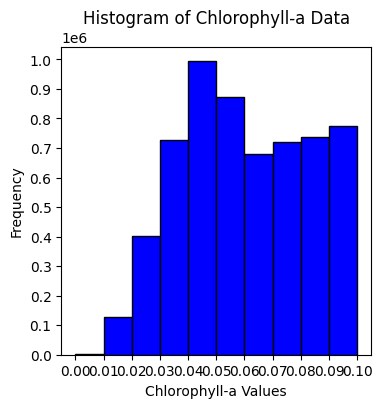

<Figure size 400x400 with 0 Axes>

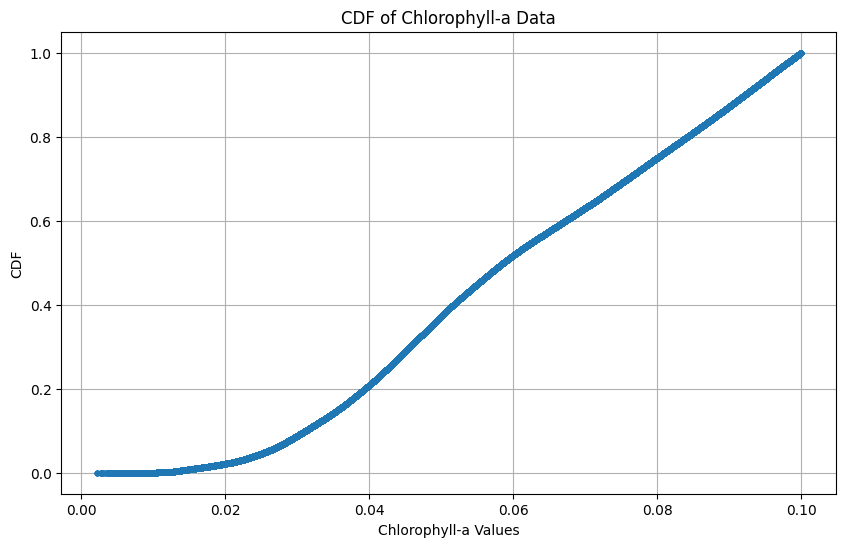


Value Range: (0.01, 1)
Fraction_Valid:  0.5303479188100138
Mean: 0.21134351193904877
Standard Deviation: 0.18744713068008423
50th Percentile: 0.1502830758690834
80th Percentile: 0.3123019337654114
90th Percentile: 0.4803784072399142
max_frequency::  
6718249.0


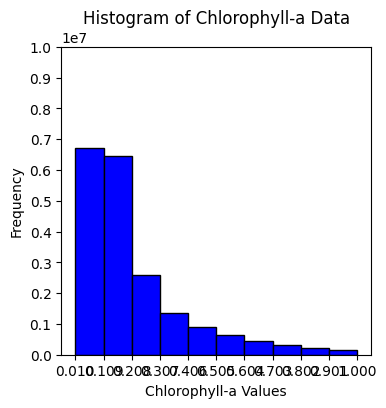

<Figure size 400x400 with 0 Axes>

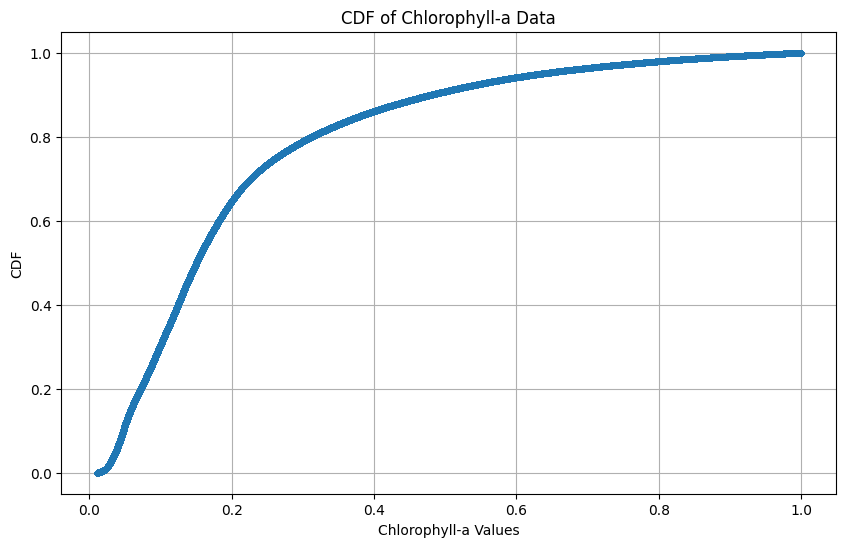


Value Range: (0.01, 0.5)
Fraction_Valid:  0.48158090599279835
Mean: 0.16371291875839233
Standard Deviation: 0.11018075793981552
50th Percentile: 0.1378258764743805
80th Percentile: 0.24371343851089478
90th Percentile: 0.33357709646224976
max_frequency::  
3721150.0


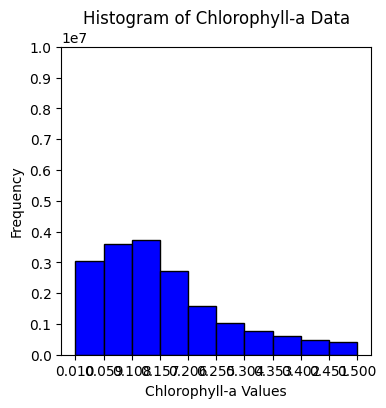

<Figure size 400x400 with 0 Axes>

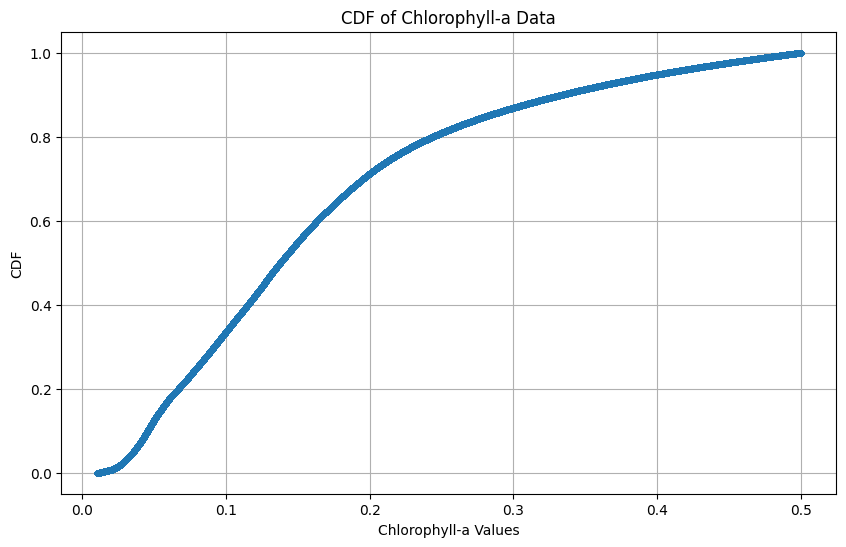


Value Range: (0.01, 0.25)
Fraction_Valid:  0.38978306648662553
Mean: 0.11966082453727722
Standard Deviation: 0.06026912480592728
50th Percentile: 0.11638427525758743
80th Percentile: 0.17783652544021608
90th Percentile: 0.2063274085521698
max_frequency::  
2177723.0


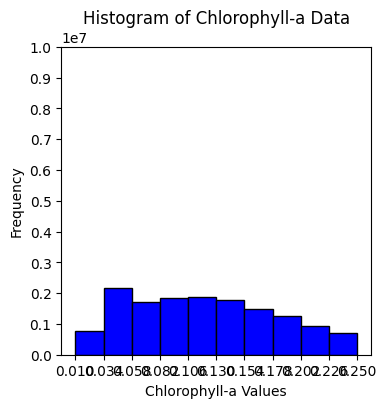

<Figure size 400x400 with 0 Axes>

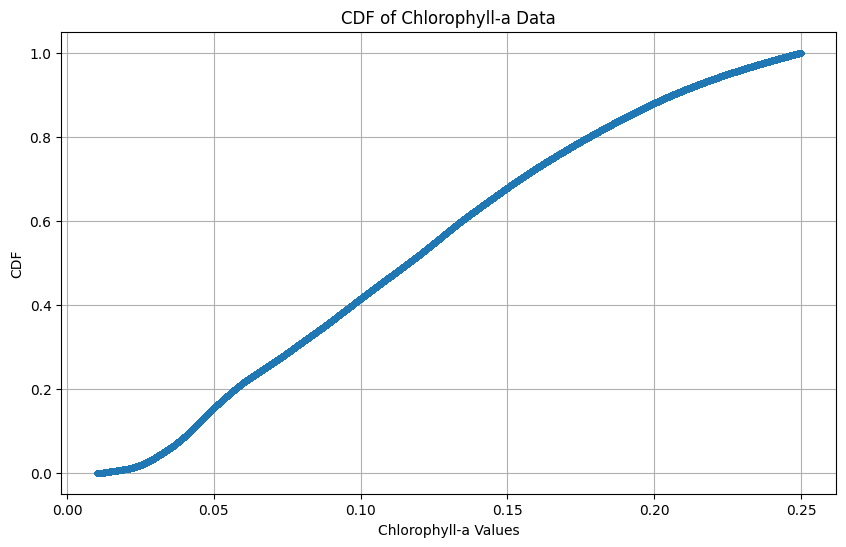


Value Range: (0.01, 0.1)
Fraction_Valid:  0.16161921832133058
Mean: 0.060552969574928284
Standard Deviation: 0.022426526993513107
50th Percentile: 0.058672551065683365
80th Percentile: 0.08422106653451919
90th Percentile: 0.09220880270004278
max_frequency::  
866765.0


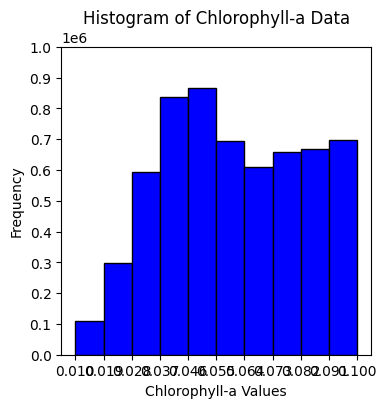

<Figure size 400x400 with 0 Axes>

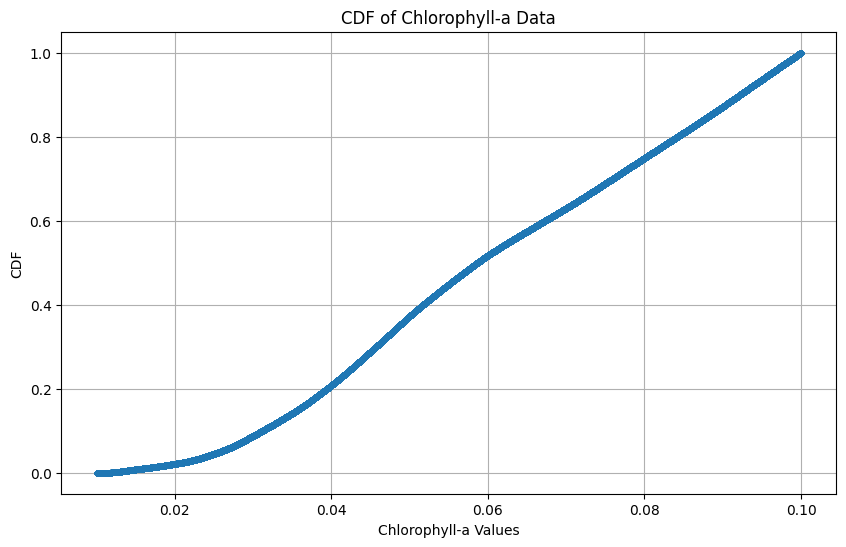

In [21]:
import numpy as np
import netCDF4 as nc

nc_file = nc.Dataset('AQUA_MODIS.20020101_20021231.L3m.YR.CHL.chlor_a.4km.nc', 'r')  # Open file in read mode

chlorA_data = nc_file.variables['chlor_a'][:]
fill_value = -32767.0
chlorA_data = chlorA_data.flatten()
chlorA_data=chlorA_data[:]
regional_pixels=chlorA_data.shape[0]
chlorA_data= np.where(~np.isnan(chlorA_data), chlorA_data, np.nan)
chlorA_data= chlorA_data.flatten()
chlorA_data= chlorA_data[chlorA_data != fill_value]


latitudes = nc_file.variables['lat'][:]
fill_value = -999.0
nc_file.close()
latitudes = np.where(~np.isnan(latitudes), latitudes, np.nan)
latitudes = latitudes.flatten()
latitudes = latitudes[latitudes != fill_value]


latitude_bands = {
    "30N-30S": (latitudes >= -30) & (latitudes <= 30),
    "60N-60S": (latitudes >= -60) & (latitudes <= 60),
    "90N-90S": np.full_like(latitudes, True, dtype=bool),
    "(30-60)N-(30-60)S": ( (latitudes>=-60) & (latitudes<=-30) & (latitudes>=30) & (latitudes<=60) )
}

value_ranges = [
    (0, 1), (0, 0.5), (0, 0.25), (0, 0.1),
    (0.01, 1), (0.01, 0.5), (0.01, 0.25), (0.01, 0.1)
]

def calculate_metrics(chlorA_data):
    mean_value = np.mean(chlorA_data)
    std_dev = np.std(chlorA_data)
    percentiles = np.percentile(chlorA_data, [50, 80, 90])
    return mean_value, std_dev, percentiles

for band_name, band_filter in latitude_bands.items():
    filtered_latitudes = latitudes[band_filter]
    filtered_values=chlorA_data[:];
    
    print(f"\nLatitude Band: {band_name}")
    for value_range in value_ranges:
        range_filter = (filtered_values >= value_range[0]) & (filtered_values <= value_range[1])
        filtered_data = filtered_values[range_filter]
        valid_pixels=filtered_data.shape[0]
        Fraction_Valid=valid_pixels/regional_pixels
        
        if len(filtered_data) > 0:
            mean_value, std_dev, percentiles = calculate_metrics(filtered_data)
            print(f"\nValue Range: {value_range}")
            print(f"Fraction_Valid: ",Fraction_Valid)
            print(f"Mean: {mean_value}")
            print(f"Standard Deviation: {std_dev}")
            print(f"50th Percentile: {percentiles[0]}")
            print(f"80th Percentile: {percentiles[1]}")
            print(f"90th Percentile: {percentiles[2]}")
            print("max_frequency::  ")
            p=plot_histogram(chlorA_data, value_range)
            plot_cdf(value_range, chlorA_data)
        else:
            print(f"\nValue Range: {value_range}")
            print("No data in this range.")



Latitude Band: 30N-30S

Value Range: (0, 1)
Fraction_Valid:  0.5304221589934842
Mean: 0.21131481230258942
Standard Deviation: 0.1874496191740036
50th Percentile: 0.15026403963565826
80th Percentile: 0.312269389629364
90th Percentile: 0.4803459048271179
max_frequency::  
6772706.0


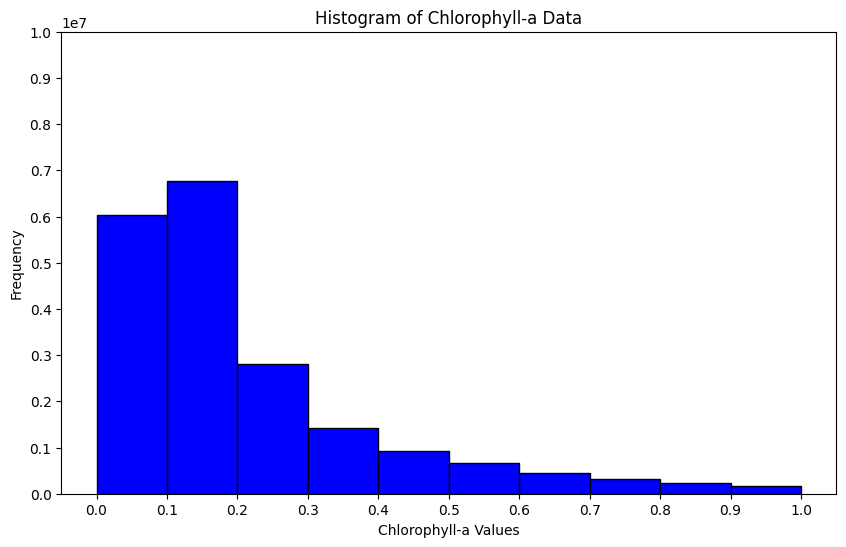

<Figure size 1000x600 with 0 Axes>

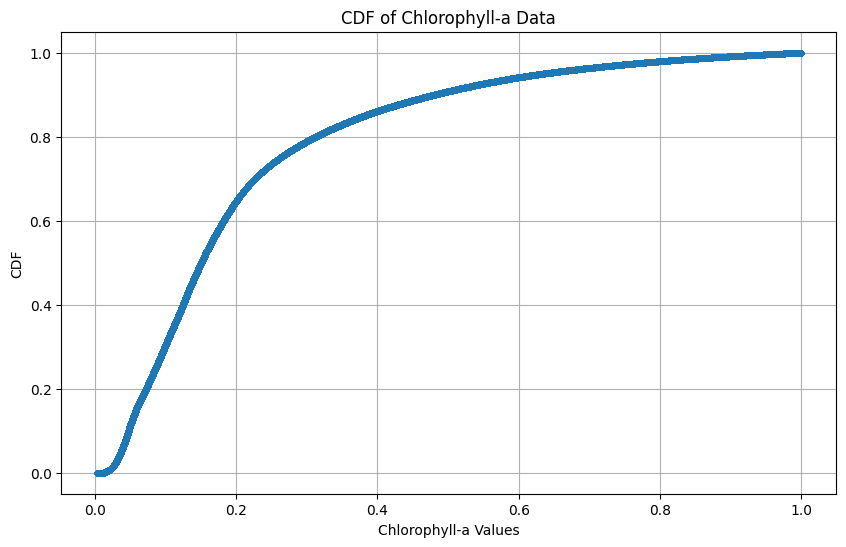


Value Range: (0, 0.5)
Fraction_Valid:  0.48165514617626887
Mean: 0.16368892788887024
Standard Deviation: 0.11018934845924377
50th Percentile: 0.13780661672353745
80th Percentile: 0.2436931371688843
90th Percentile: 0.3335564553737641
max_frequency::  
3845005.0


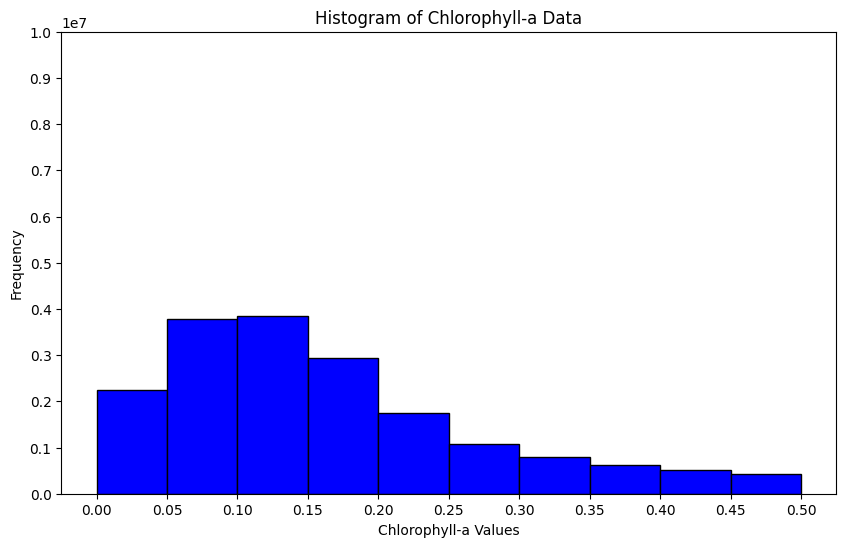

<Figure size 1000x600 with 0 Axes>

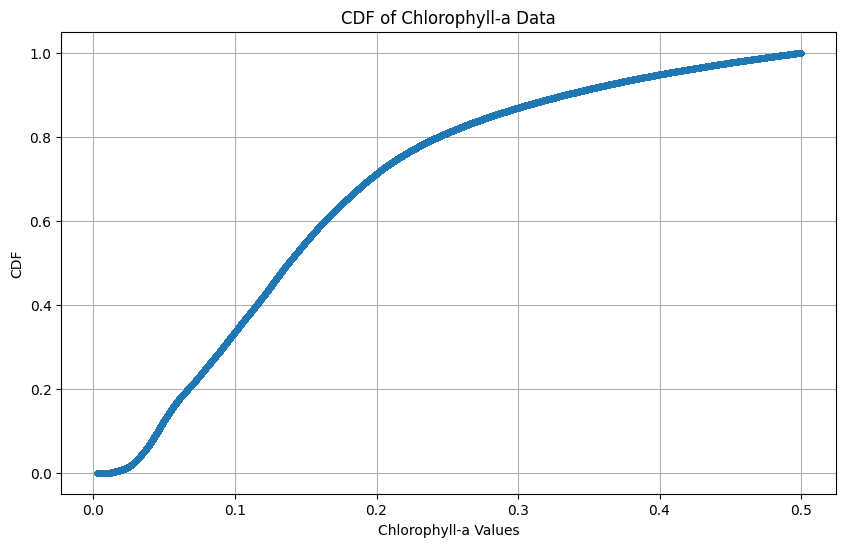


Value Range: (0, 0.25)
Fraction_Valid:  0.38985730667009605
Mean: 0.11963964253664017
Standard Deviation: 0.06028330698609352
50th Percentile: 0.11636598780751228
80th Percentile: 0.1778269112110138
90th Percentile: 0.20632074028253555
max_frequency::  
1977067.0


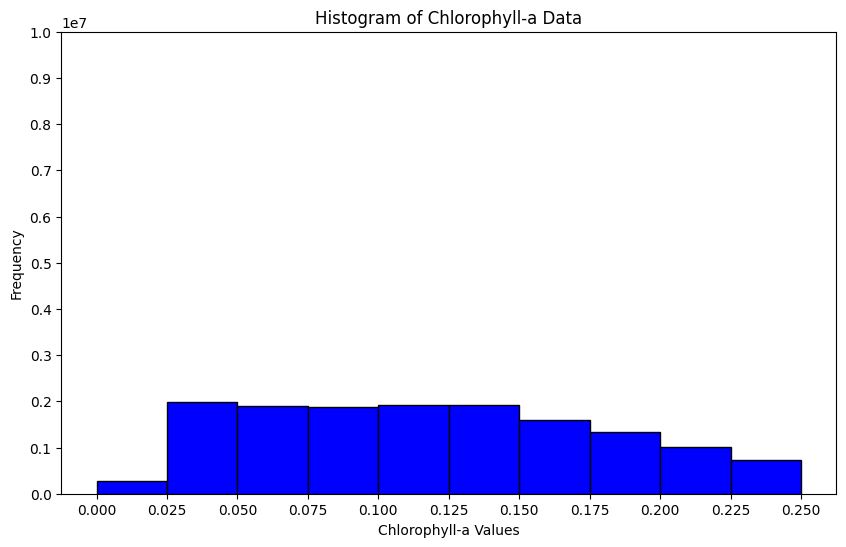

<Figure size 1000x600 with 0 Axes>

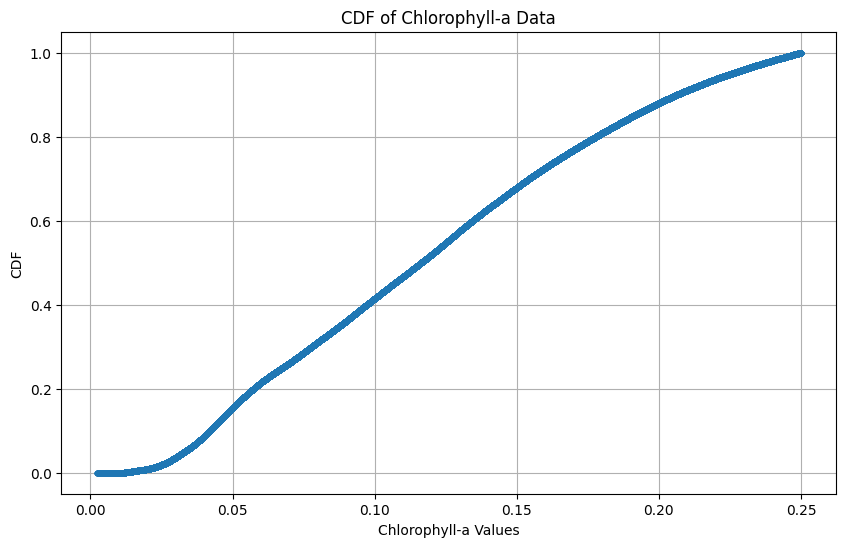


Value Range: (0, 0.1)
Fraction_Valid:  0.1616934585048011
Mean: 0.06052862107753754
Standard Deviation: 0.02245018072426319
50th Percentile: 0.058654697611927986
80th Percentile: 0.08421332389116287
90th Percentile: 0.09220549091696739
max_frequency::  
993175.0


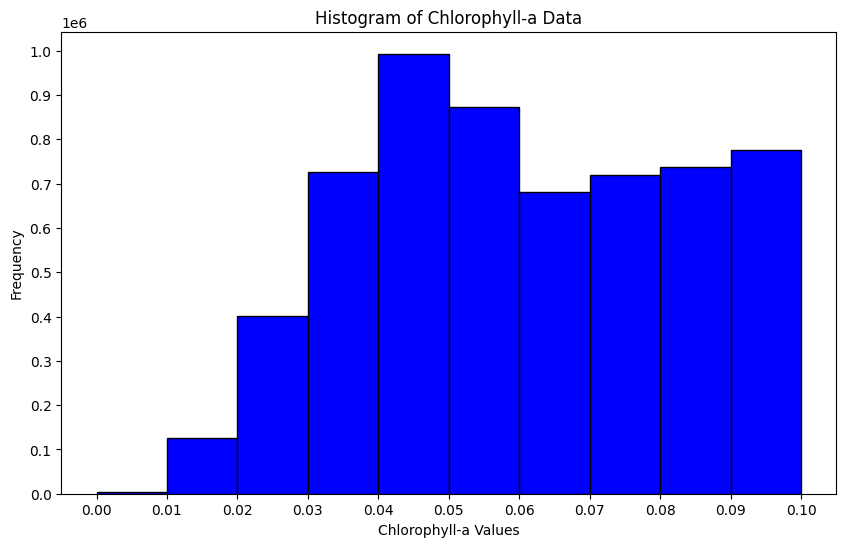

<Figure size 1000x600 with 0 Axes>

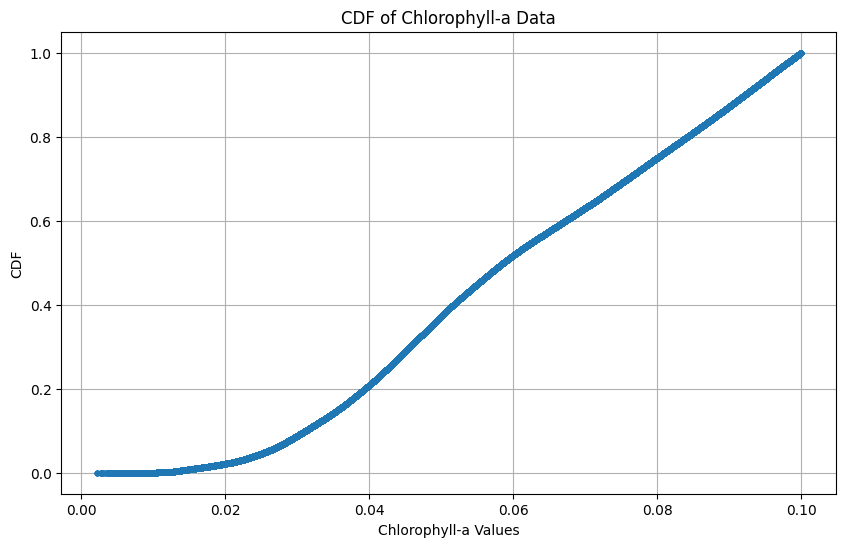


Value Range: (0.01, 1)
Fraction_Valid:  0.5303479188100138
Mean: 0.21134351193904877
Standard Deviation: 0.18744713068008423
50th Percentile: 0.1502830758690834
80th Percentile: 0.3123019337654114
90th Percentile: 0.4803784072399142
max_frequency::  
6718249.0


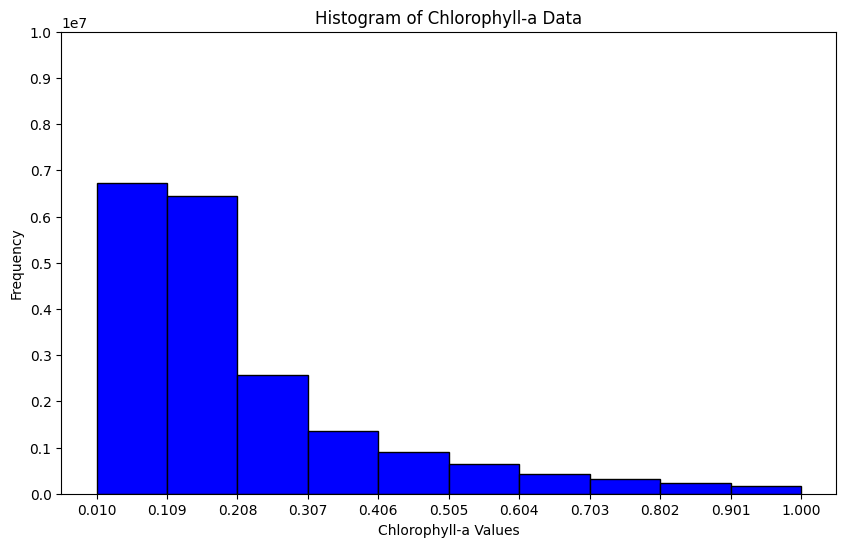

<Figure size 1000x600 with 0 Axes>

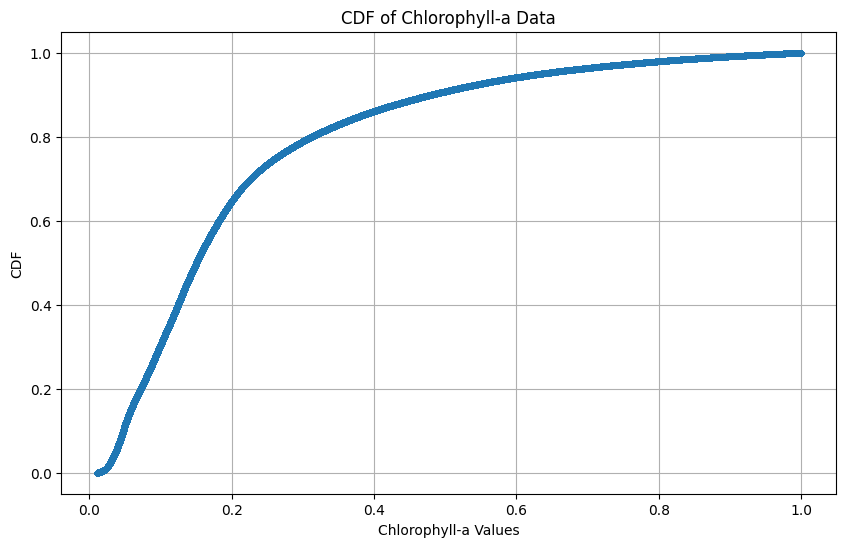


Value Range: (0.01, 0.5)
Fraction_Valid:  0.48158090599279835
Mean: 0.16371291875839233
Standard Deviation: 0.11018075793981552
50th Percentile: 0.1378258764743805
80th Percentile: 0.24371343851089478
90th Percentile: 0.33357709646224976
max_frequency::  
3721150.0


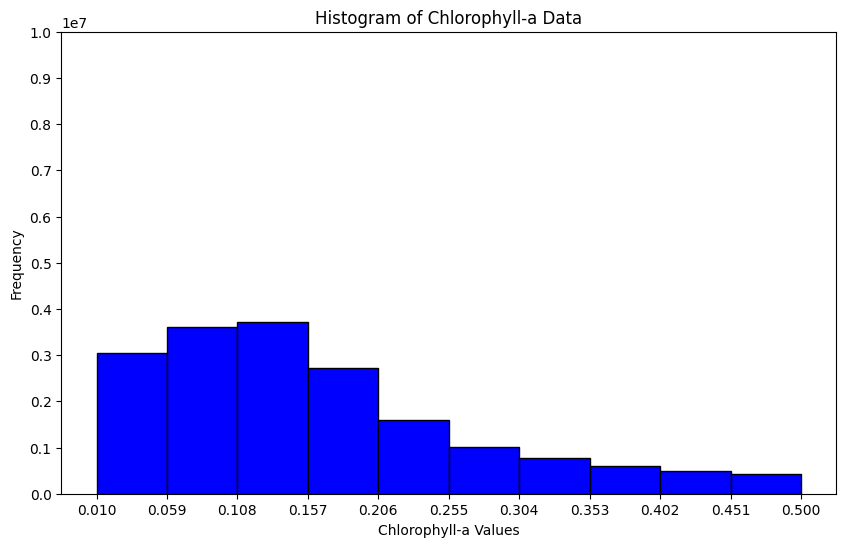

<Figure size 1000x600 with 0 Axes>

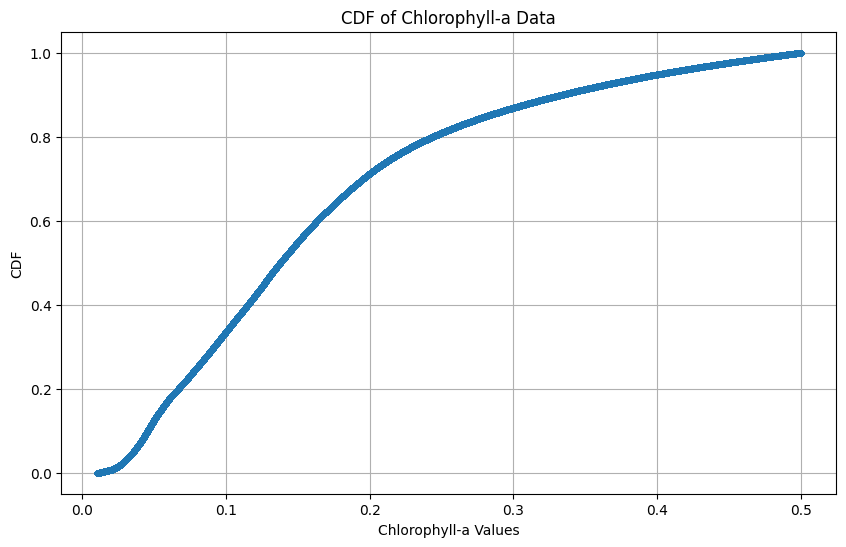


Value Range: (0.01, 0.25)
Fraction_Valid:  0.38978306648662553
Mean: 0.11966082453727722
Standard Deviation: 0.06026912480592728
50th Percentile: 0.11638427525758743
80th Percentile: 0.17783652544021608
90th Percentile: 0.2063274085521698
max_frequency::  
2177723.0


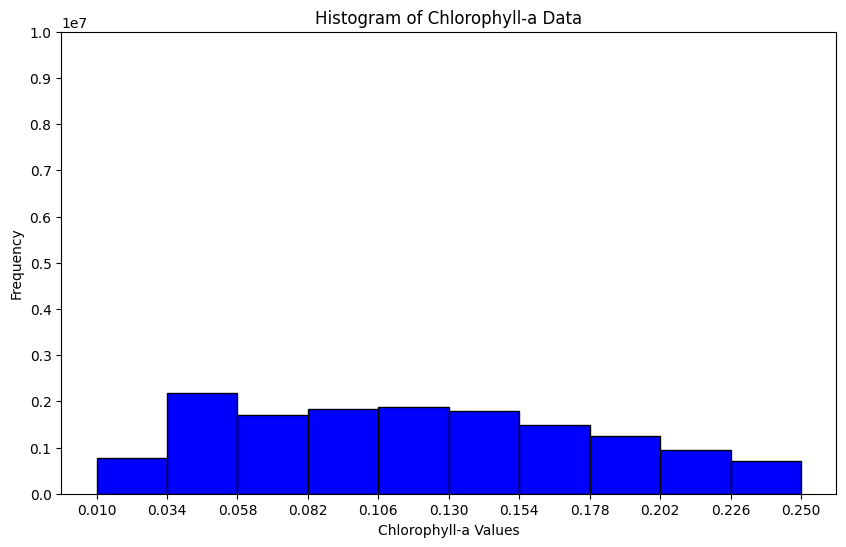

<Figure size 1000x600 with 0 Axes>

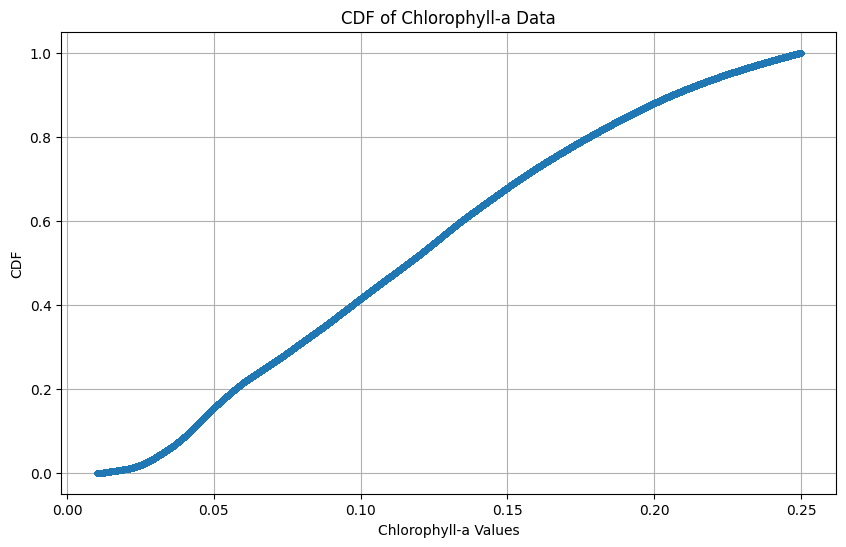


Value Range: (0.01, 0.1)
Fraction_Valid:  0.16161921832133058
Mean: 0.060552969574928284
Standard Deviation: 0.022426526993513107
50th Percentile: 0.058672551065683365
80th Percentile: 0.08422106653451919
90th Percentile: 0.09220880270004278
max_frequency::  
866765.0


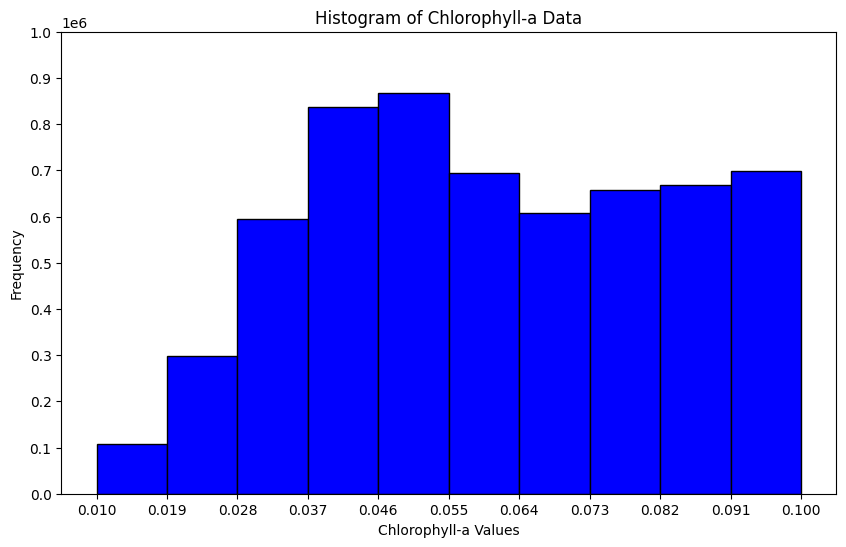

<Figure size 1000x600 with 0 Axes>

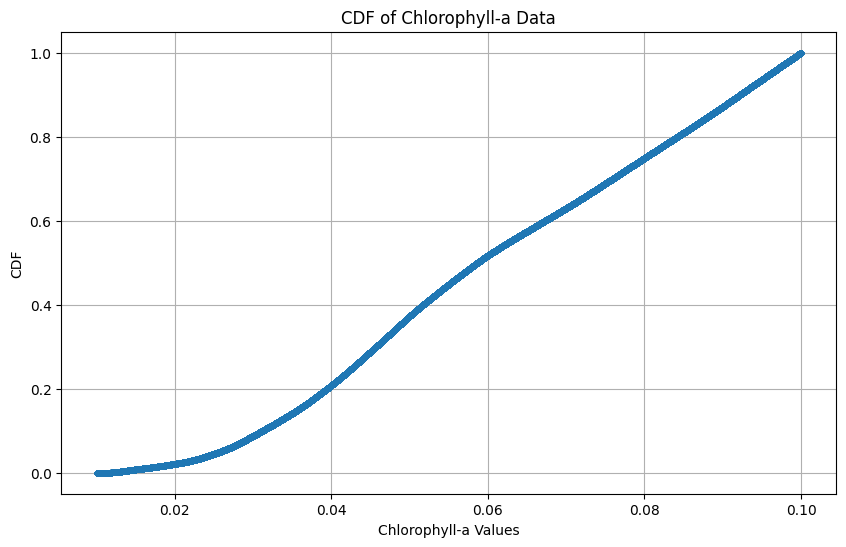


Latitude Band: 60N-60S

Value Range: (0, 1)
Fraction_Valid:  0.5304221589934842
Mean: 0.21131481230258942
Standard Deviation: 0.1874496191740036
50th Percentile: 0.15026403963565826
80th Percentile: 0.312269389629364
90th Percentile: 0.4803459048271179
max_frequency::  
6772706.0


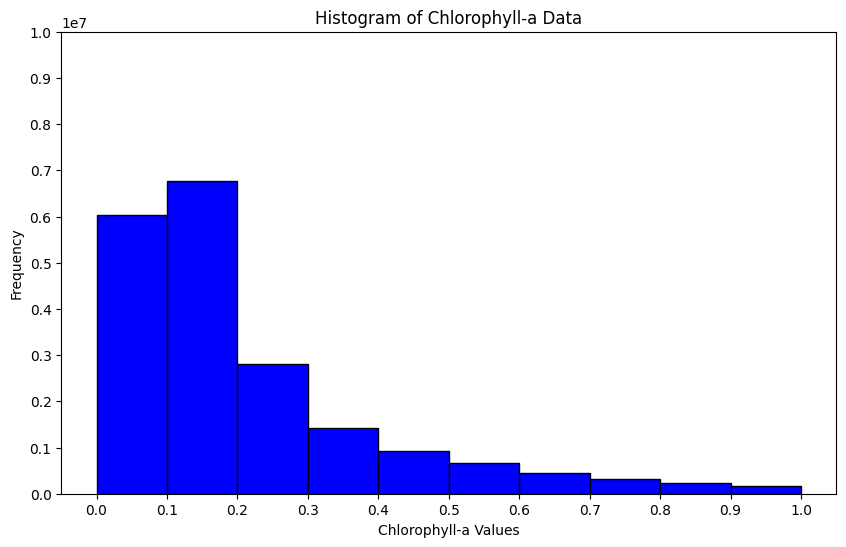

<Figure size 1000x600 with 0 Axes>

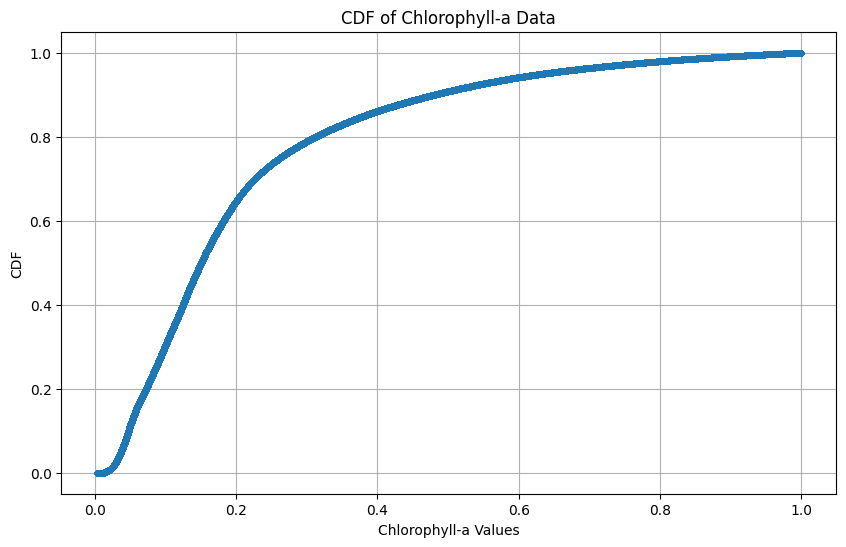


Value Range: (0, 0.5)
Fraction_Valid:  0.48165514617626887
Mean: 0.16368892788887024
Standard Deviation: 0.11018934845924377
50th Percentile: 0.13780661672353745
80th Percentile: 0.2436931371688843
90th Percentile: 0.3335564553737641
max_frequency::  
3845005.0


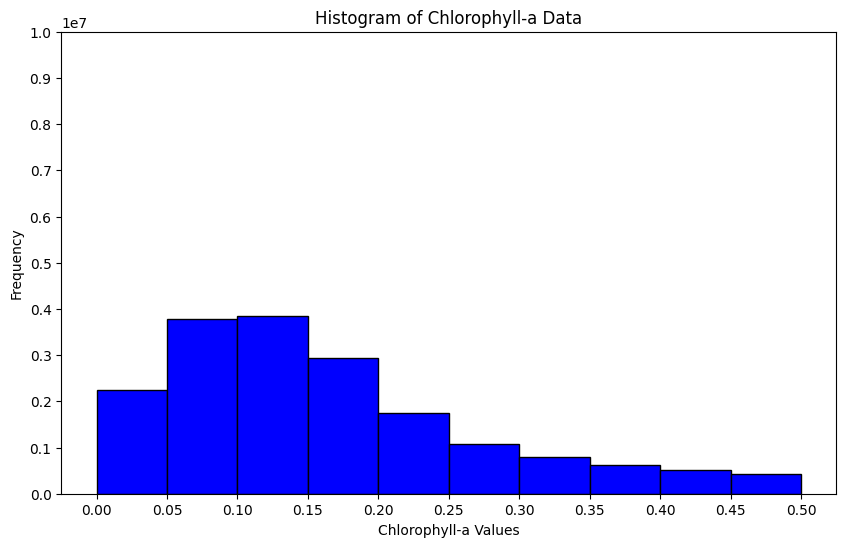

<Figure size 1000x600 with 0 Axes>

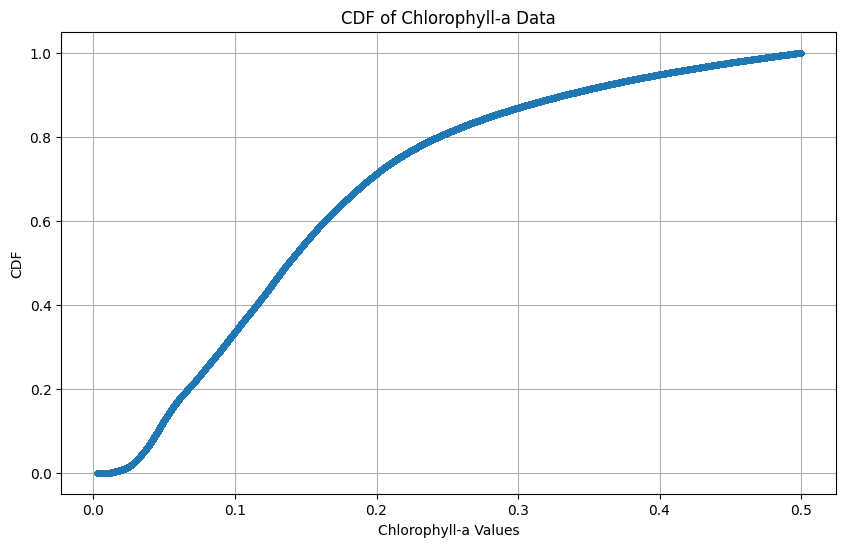


Value Range: (0, 0.25)
Fraction_Valid:  0.38985730667009605
Mean: 0.11963964253664017
Standard Deviation: 0.06028330698609352
50th Percentile: 0.11636598780751228
80th Percentile: 0.1778269112110138
90th Percentile: 0.20632074028253555
max_frequency::  
1977067.0


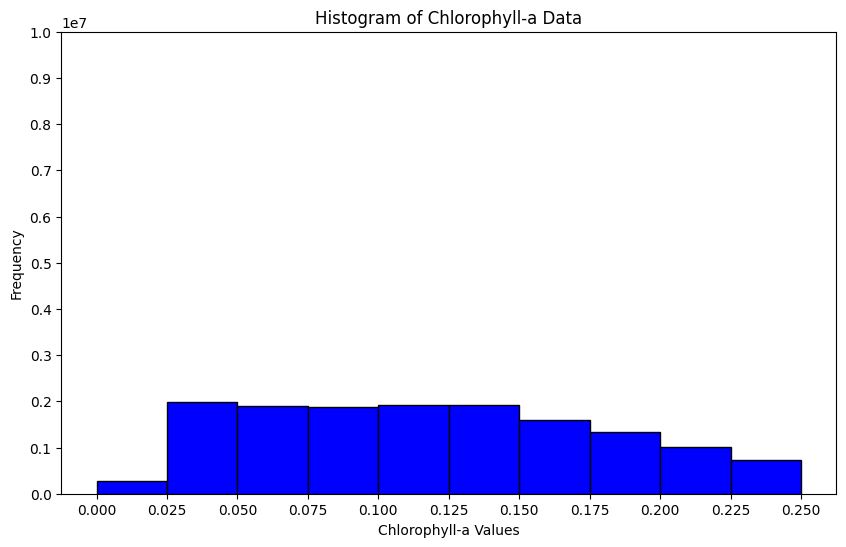

<Figure size 1000x600 with 0 Axes>

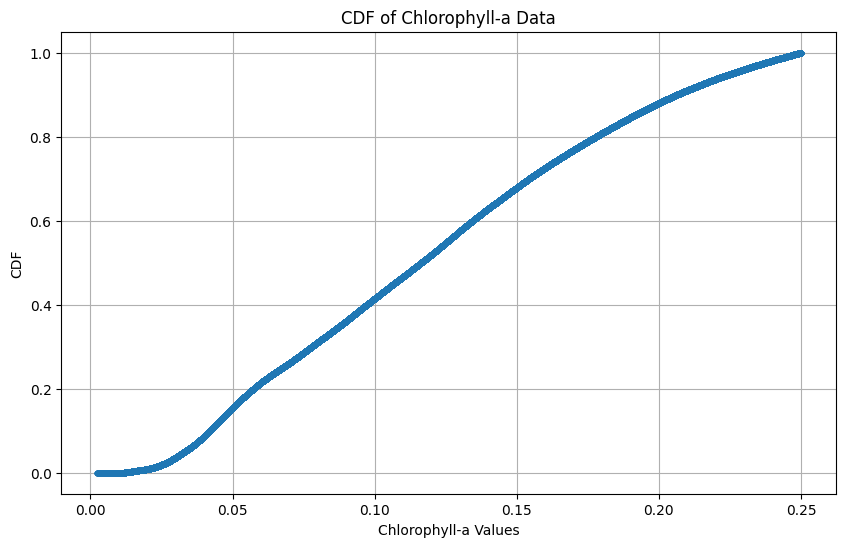


Value Range: (0, 0.1)
Fraction_Valid:  0.1616934585048011
Mean: 0.06052862107753754
Standard Deviation: 0.02245018072426319
50th Percentile: 0.058654697611927986
80th Percentile: 0.08421332389116287
90th Percentile: 0.09220549091696739
max_frequency::  
993175.0


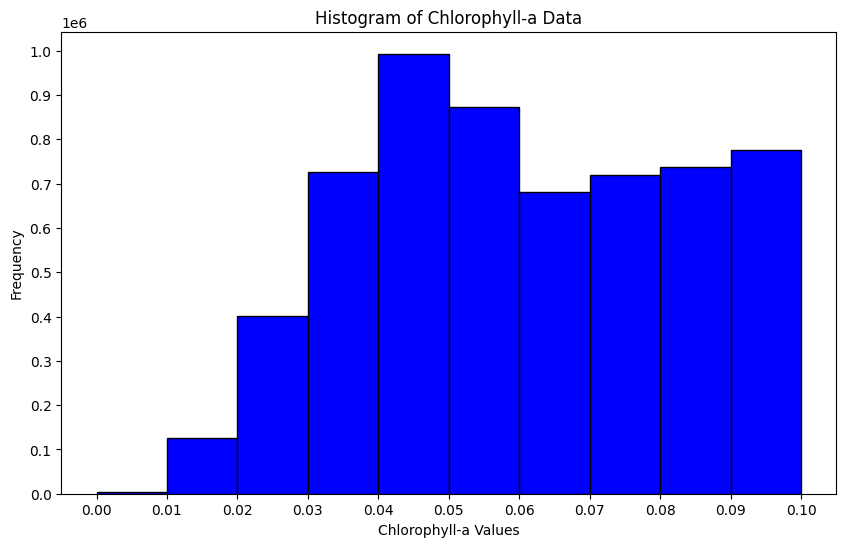

<Figure size 1000x600 with 0 Axes>

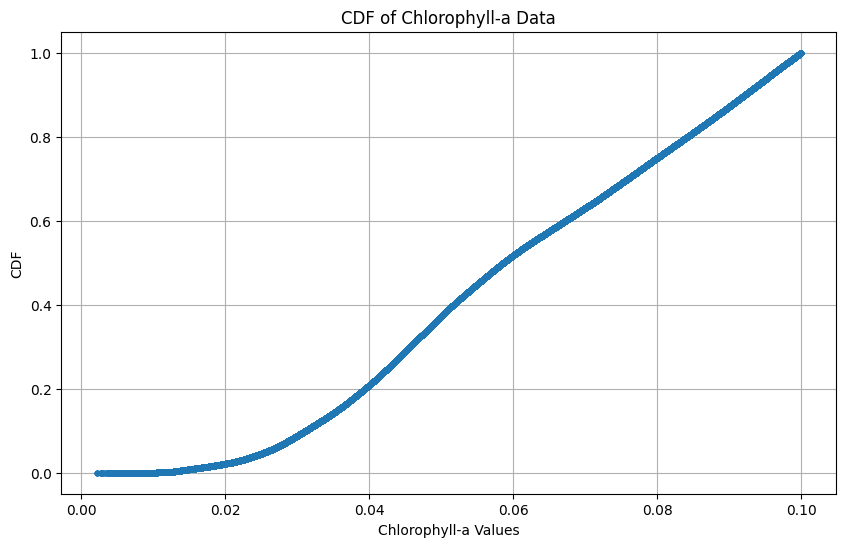


Value Range: (0.01, 1)
Fraction_Valid:  0.5303479188100138
Mean: 0.21134351193904877
Standard Deviation: 0.18744713068008423
50th Percentile: 0.1502830758690834
80th Percentile: 0.3123019337654114
90th Percentile: 0.4803784072399142
max_frequency::  
6718249.0


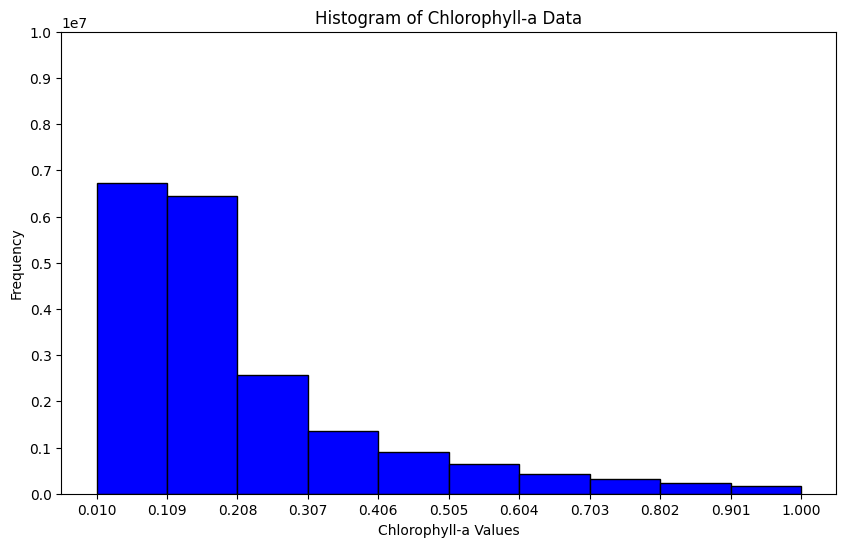

<Figure size 1000x600 with 0 Axes>

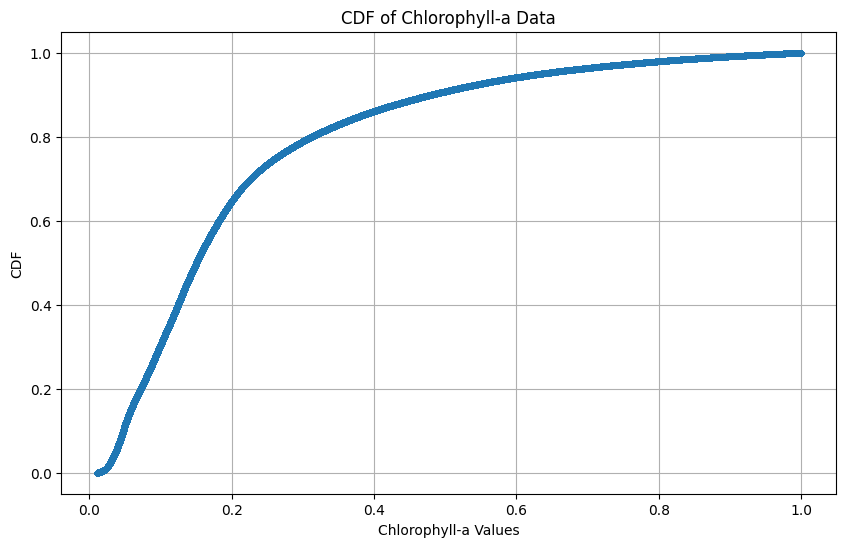


Value Range: (0.01, 0.5)
Fraction_Valid:  0.48158090599279835
Mean: 0.16371291875839233
Standard Deviation: 0.11018075793981552
50th Percentile: 0.1378258764743805
80th Percentile: 0.24371343851089478
90th Percentile: 0.33357709646224976
max_frequency::  
3721150.0


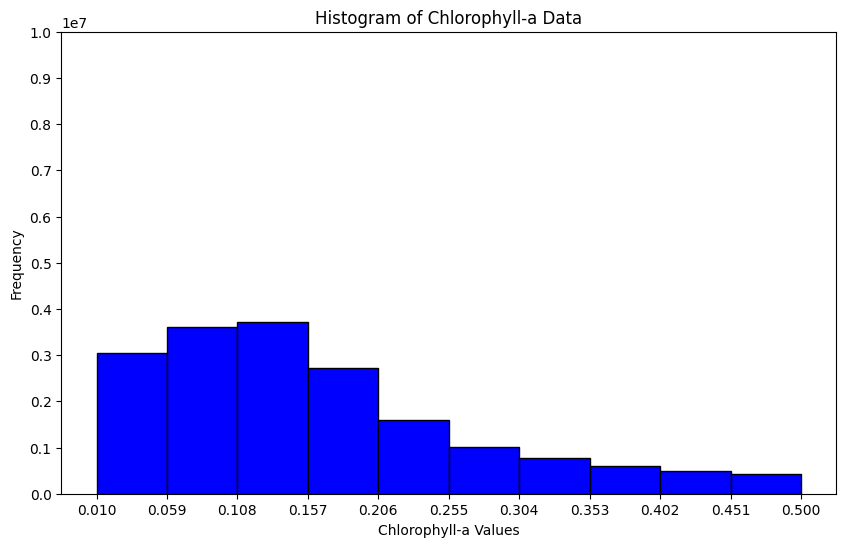

<Figure size 1000x600 with 0 Axes>

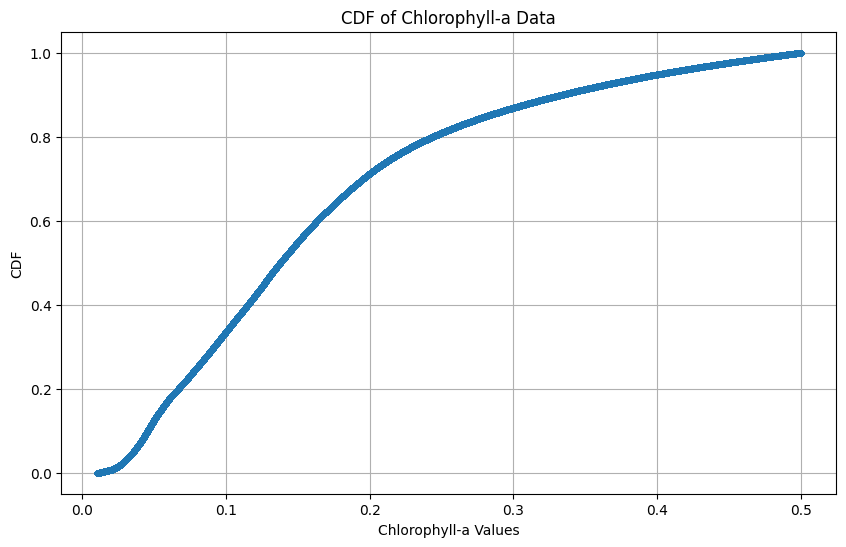


Value Range: (0.01, 0.25)
Fraction_Valid:  0.38978306648662553
Mean: 0.11966082453727722
Standard Deviation: 0.06026912480592728
50th Percentile: 0.11638427525758743
80th Percentile: 0.17783652544021608
90th Percentile: 0.2063274085521698
max_frequency::  
2177723.0


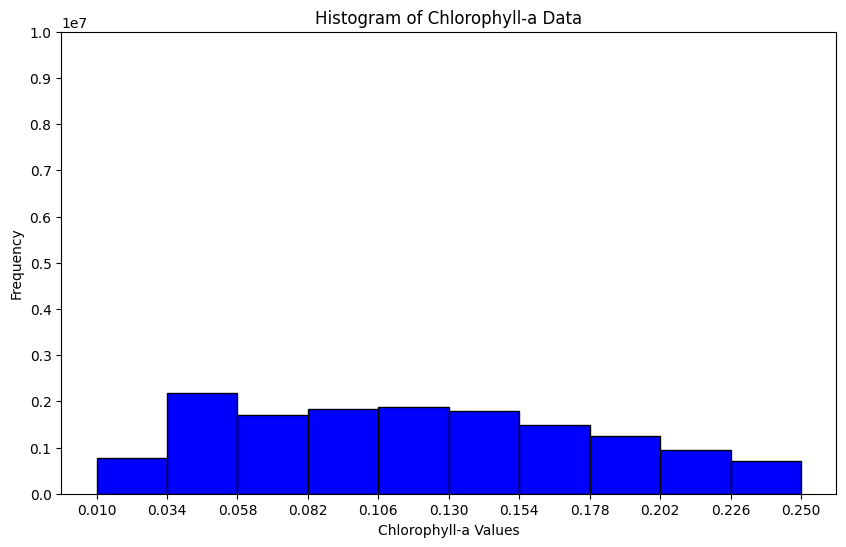

<Figure size 1000x600 with 0 Axes>

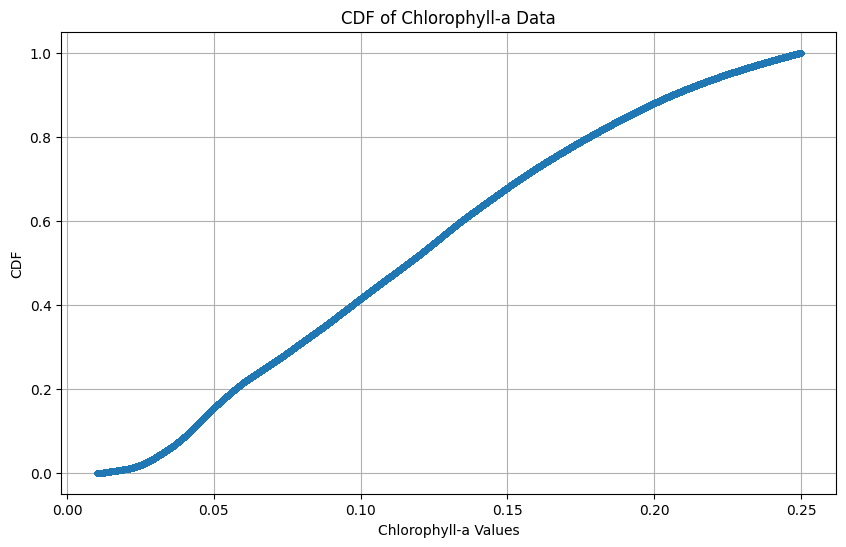


Value Range: (0.01, 0.1)
Fraction_Valid:  0.16161921832133058
Mean: 0.060552969574928284
Standard Deviation: 0.022426526993513107
50th Percentile: 0.058672551065683365
80th Percentile: 0.08422106653451919
90th Percentile: 0.09220880270004278
max_frequency::  
866765.0


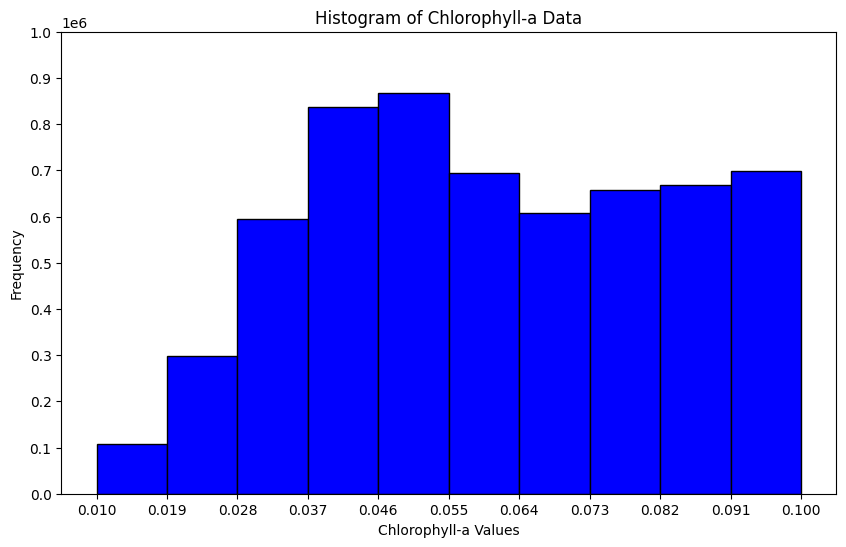

<Figure size 1000x600 with 0 Axes>

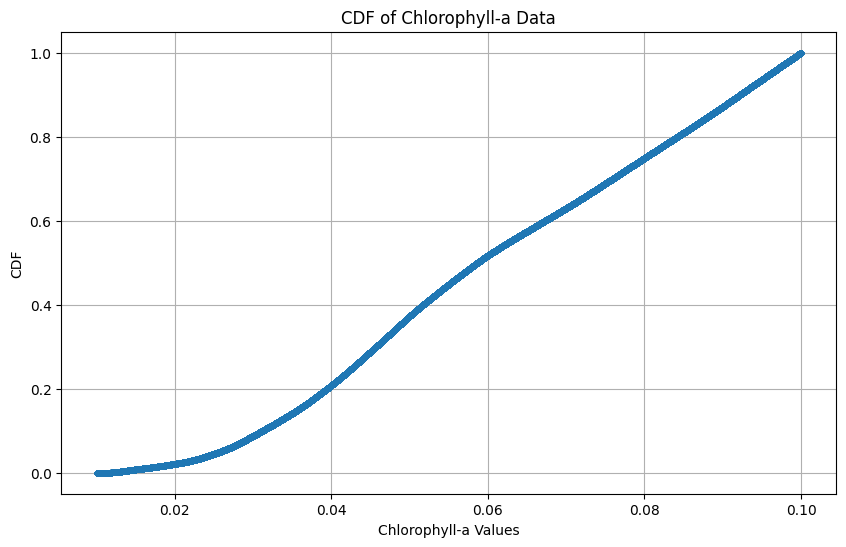


Latitude Band: 90N-90S

Value Range: (0, 1)
Fraction_Valid:  0.5304221589934842
Mean: 0.21131481230258942
Standard Deviation: 0.1874496191740036
50th Percentile: 0.15026403963565826
80th Percentile: 0.312269389629364
90th Percentile: 0.4803459048271179
max_frequency::  
6772706.0


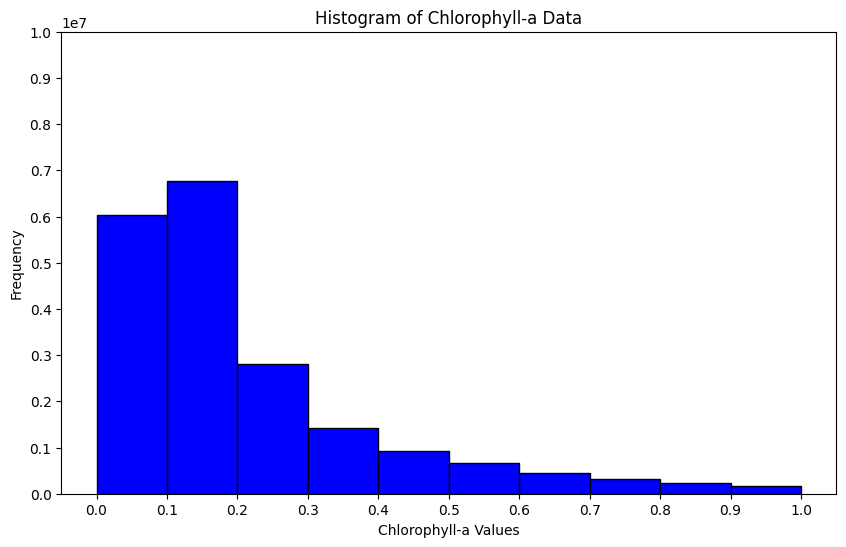

<Figure size 1000x600 with 0 Axes>

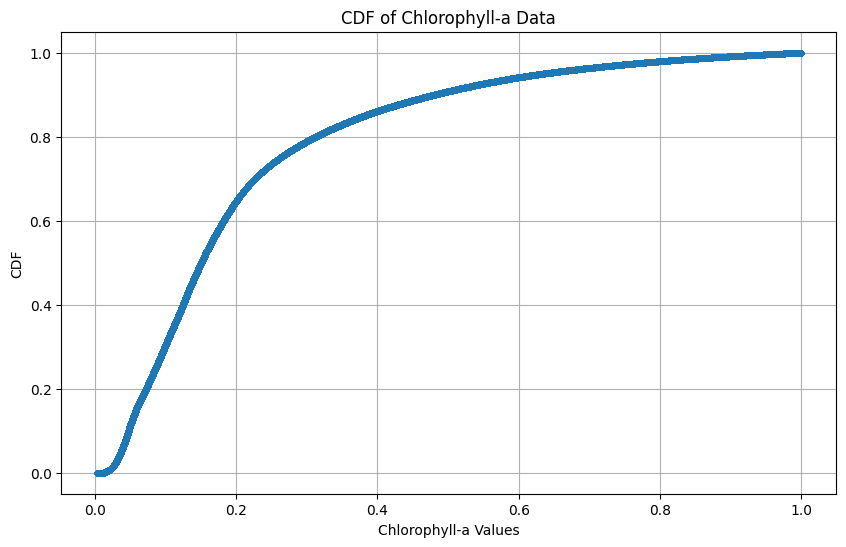


Value Range: (0, 0.5)
Fraction_Valid:  0.48165514617626887
Mean: 0.16368892788887024
Standard Deviation: 0.11018934845924377
50th Percentile: 0.13780661672353745
80th Percentile: 0.2436931371688843
90th Percentile: 0.3335564553737641
max_frequency::  
3845005.0


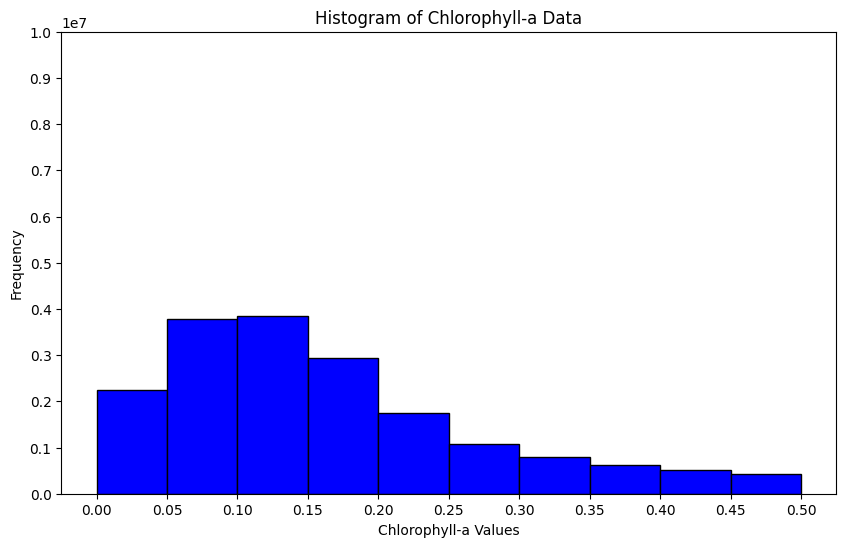

<Figure size 1000x600 with 0 Axes>

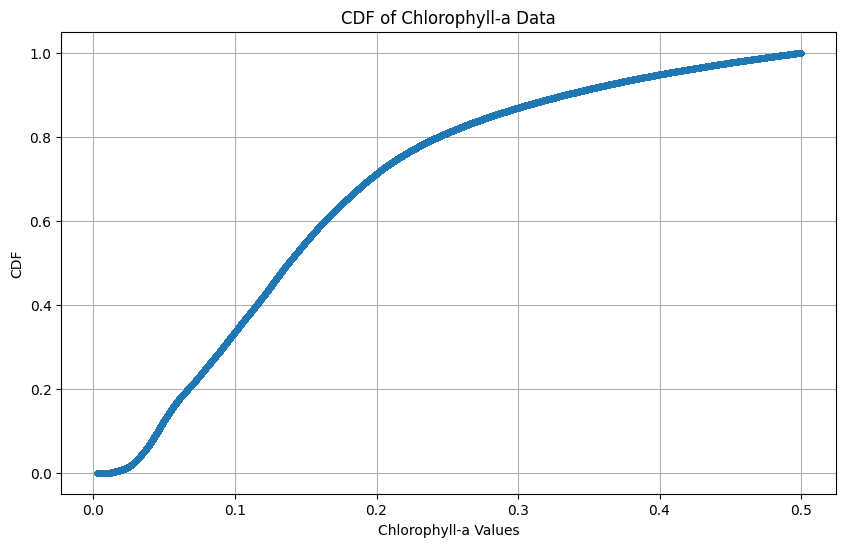


Value Range: (0, 0.25)
Fraction_Valid:  0.38985730667009605
Mean: 0.11963964253664017
Standard Deviation: 0.06028330698609352
50th Percentile: 0.11636598780751228
80th Percentile: 0.1778269112110138
90th Percentile: 0.20632074028253555
max_frequency::  
1977067.0


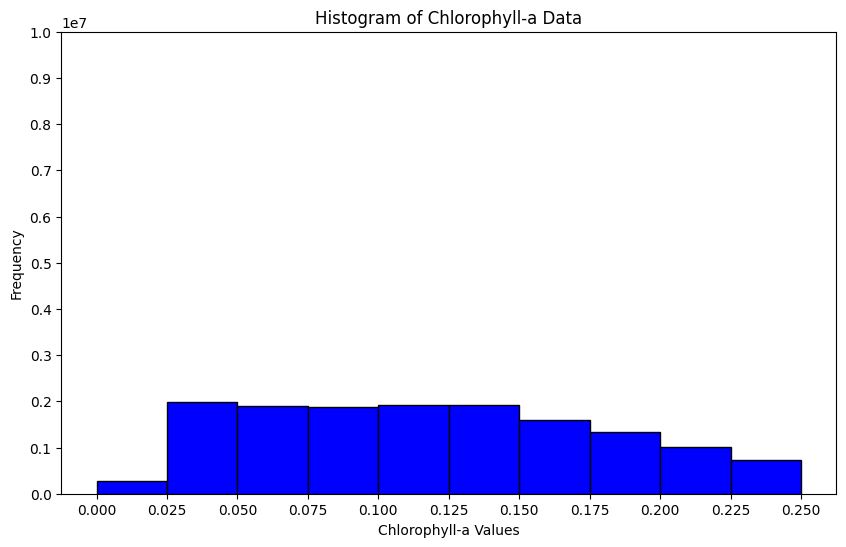

<Figure size 1000x600 with 0 Axes>

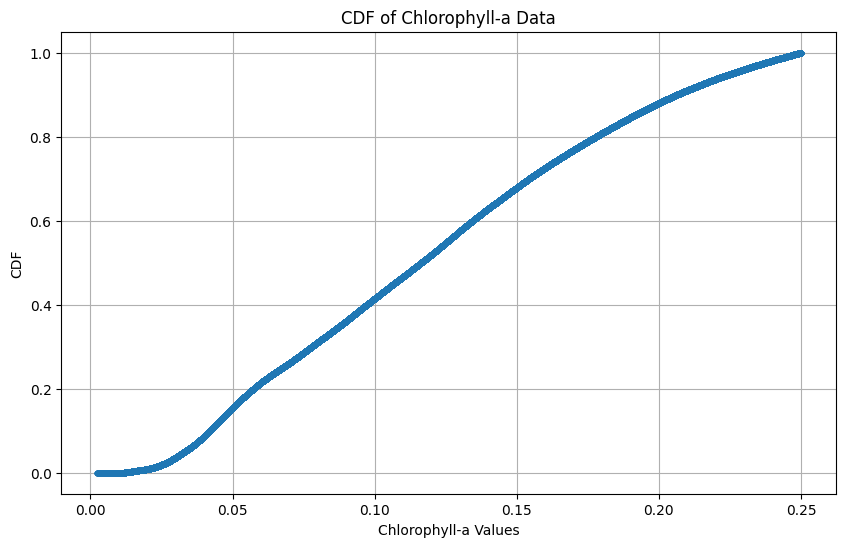


Value Range: (0, 0.1)
Fraction_Valid:  0.1616934585048011
Mean: 0.06052862107753754
Standard Deviation: 0.02245018072426319
50th Percentile: 0.058654697611927986
80th Percentile: 0.08421332389116287
90th Percentile: 0.09220549091696739
max_frequency::  
993175.0


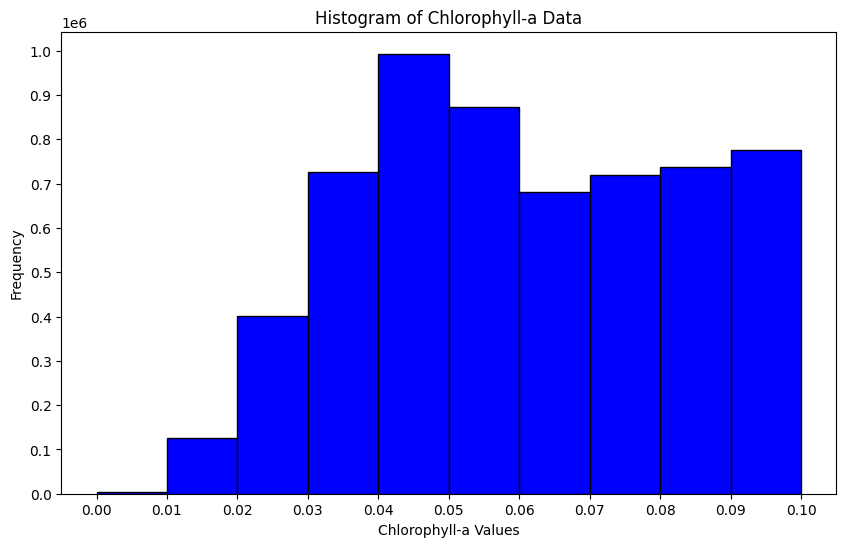

<Figure size 1000x600 with 0 Axes>

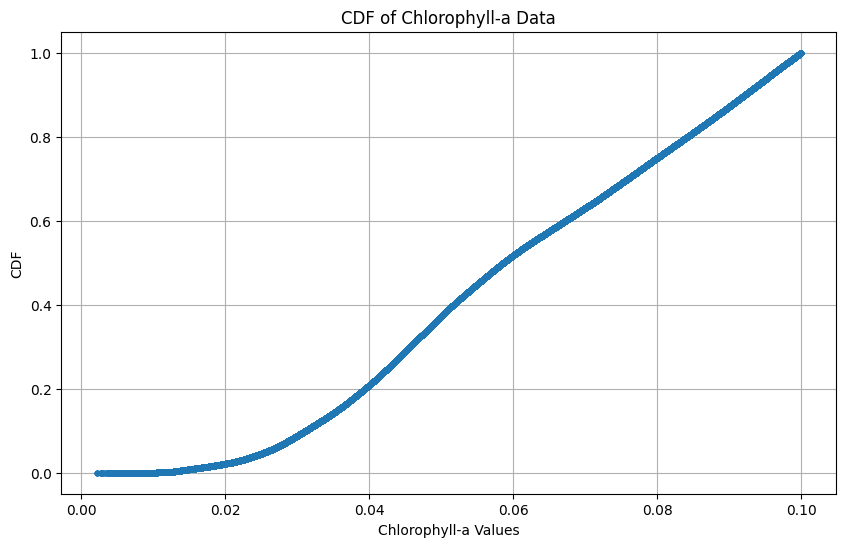


Value Range: (0.01, 1)
Fraction_Valid:  0.5303479188100138
Mean: 0.21134351193904877
Standard Deviation: 0.18744713068008423
50th Percentile: 0.1502830758690834
80th Percentile: 0.3123019337654114
90th Percentile: 0.4803784072399142
max_frequency::  
6718249.0


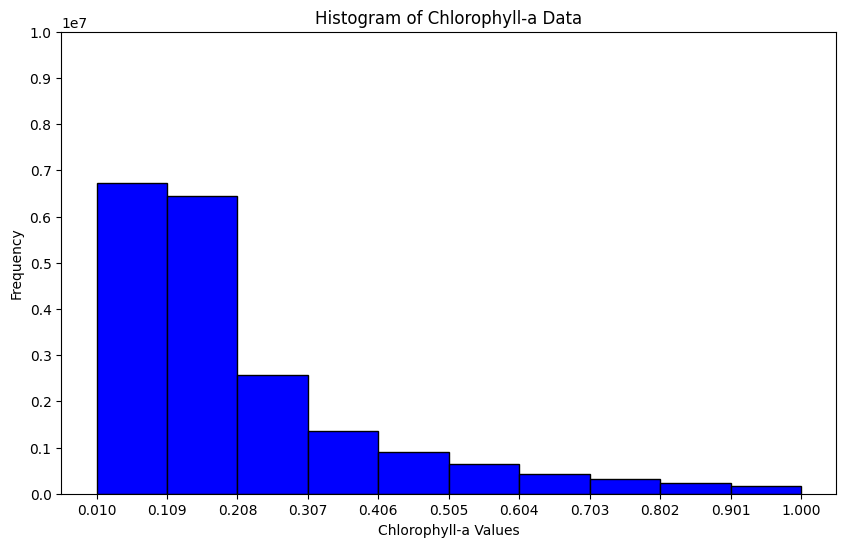

<Figure size 1000x600 with 0 Axes>

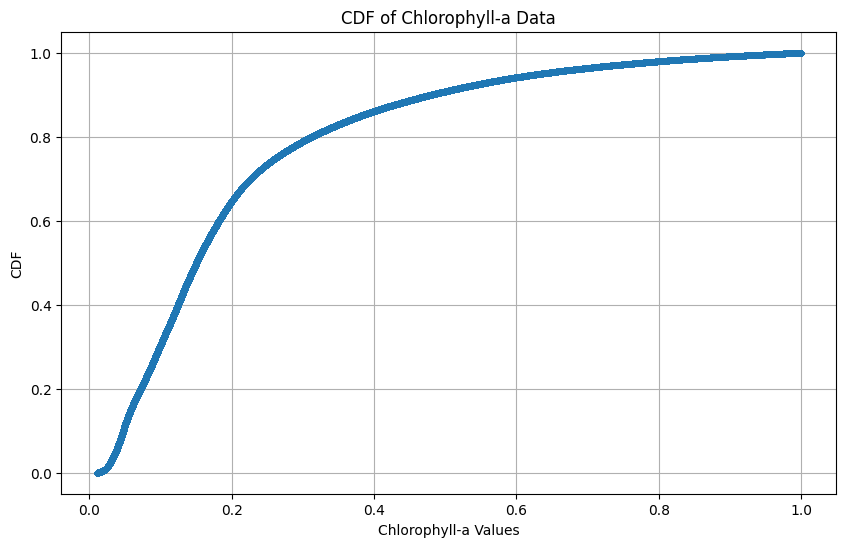


Value Range: (0.01, 0.5)
Fraction_Valid:  0.48158090599279835
Mean: 0.16371291875839233
Standard Deviation: 0.11018075793981552
50th Percentile: 0.1378258764743805
80th Percentile: 0.24371343851089478
90th Percentile: 0.33357709646224976
max_frequency::  
3721150.0


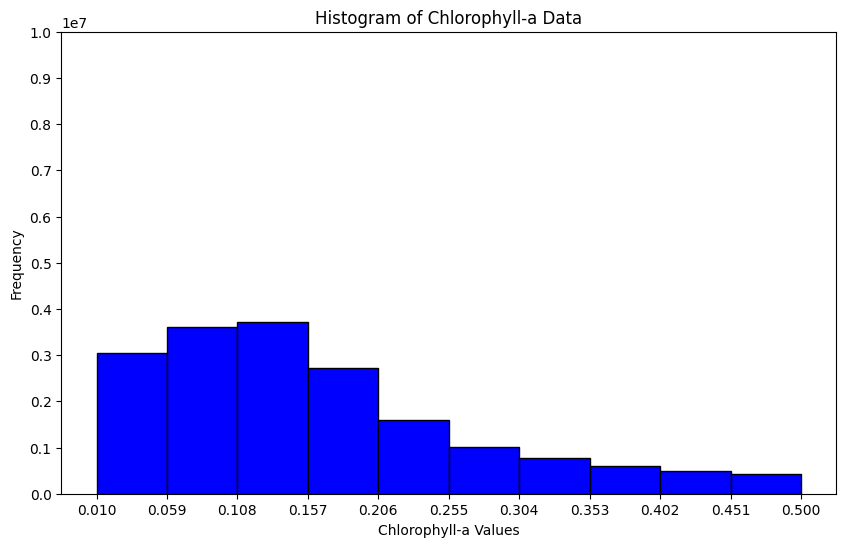

<Figure size 1000x600 with 0 Axes>

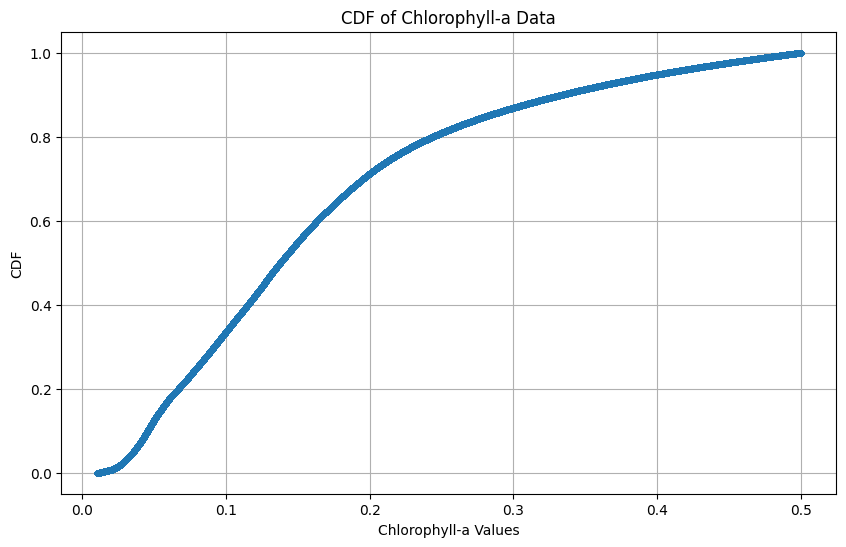


Value Range: (0.01, 0.25)
Fraction_Valid:  0.38978306648662553
Mean: 0.11966082453727722
Standard Deviation: 0.06026912480592728
50th Percentile: 0.11638427525758743
80th Percentile: 0.17783652544021608
90th Percentile: 0.2063274085521698
max_frequency::  
2177723.0


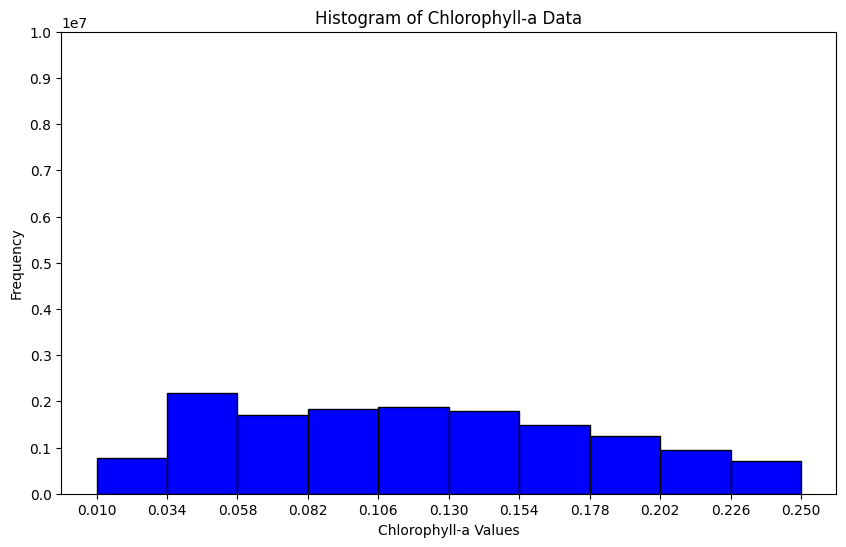

<Figure size 1000x600 with 0 Axes>

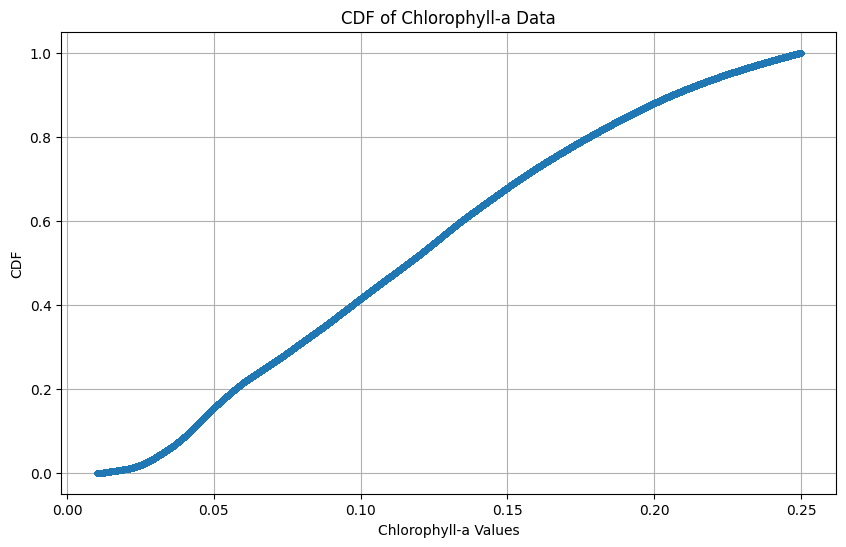


Value Range: (0.01, 0.1)
Fraction_Valid:  0.16161921832133058
Mean: 0.060552969574928284
Standard Deviation: 0.022426526993513107
50th Percentile: 0.058672551065683365
80th Percentile: 0.08422106653451919
90th Percentile: 0.09220880270004278
max_frequency::  
866765.0


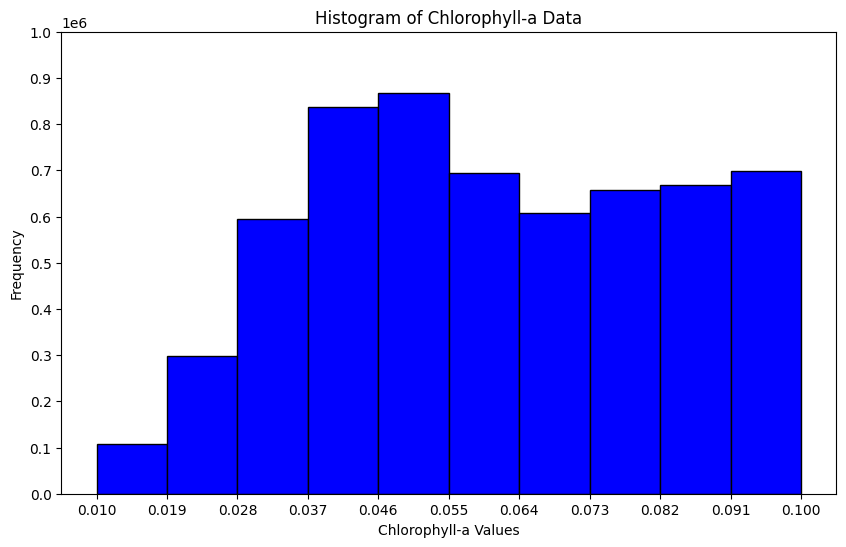

<Figure size 1000x600 with 0 Axes>

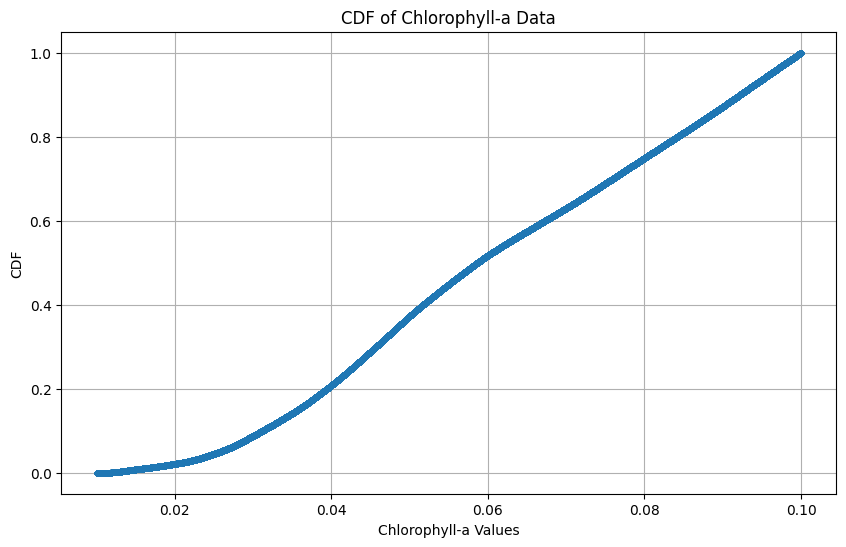


Latitude Band: (30-60)N-(30-60)S

Value Range: (0, 1)
Fraction_Valid:  0.5304221589934842
Mean: 0.21131481230258942
Standard Deviation: 0.1874496191740036
50th Percentile: 0.15026403963565826
80th Percentile: 0.312269389629364
90th Percentile: 0.4803459048271179
max_frequency::  
6772706.0


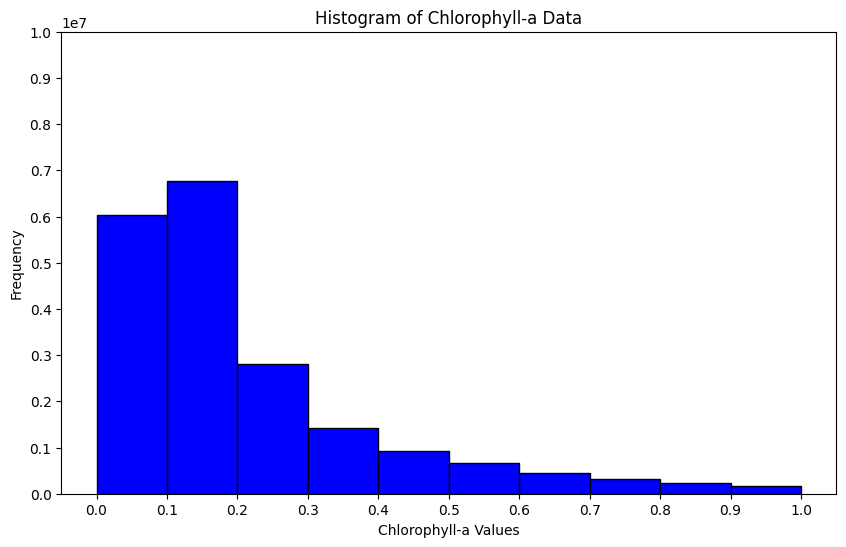

<Figure size 1000x600 with 0 Axes>

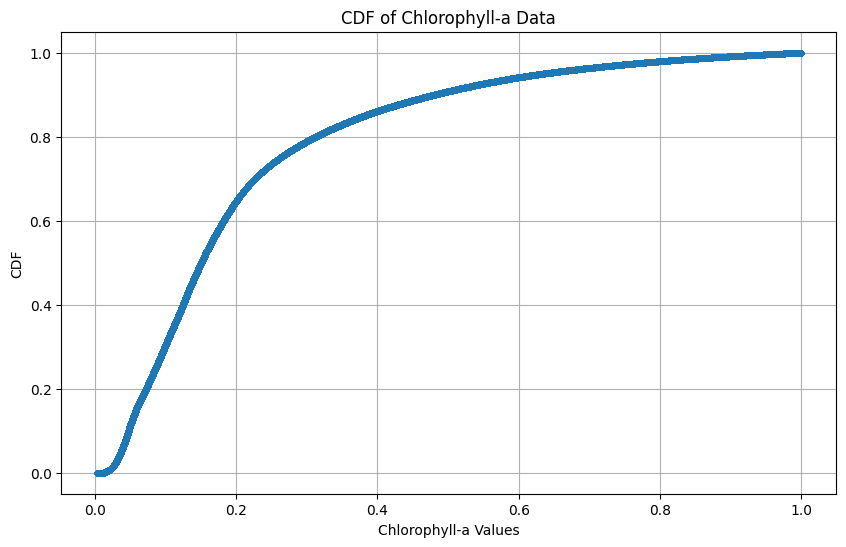


Value Range: (0, 0.5)
Fraction_Valid:  0.48165514617626887
Mean: 0.16368892788887024
Standard Deviation: 0.11018934845924377
50th Percentile: 0.13780661672353745
80th Percentile: 0.2436931371688843
90th Percentile: 0.3335564553737641
max_frequency::  
3845005.0


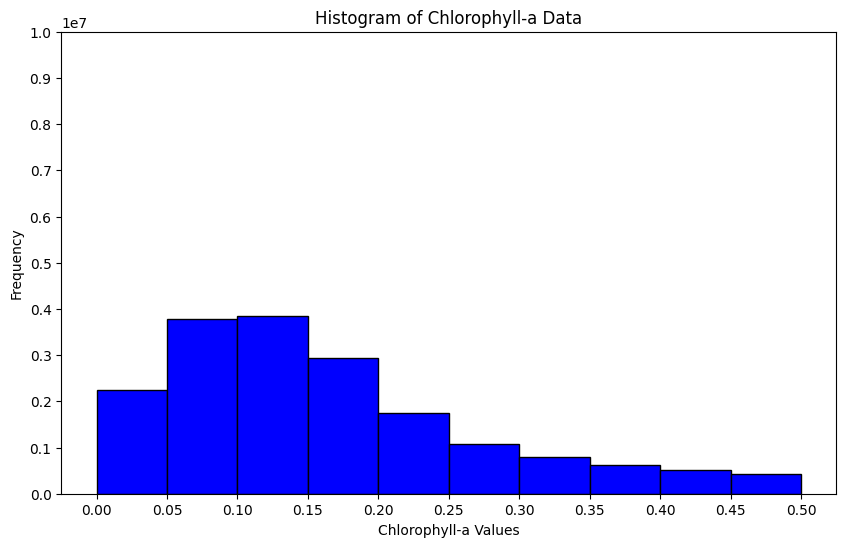

<Figure size 1000x600 with 0 Axes>

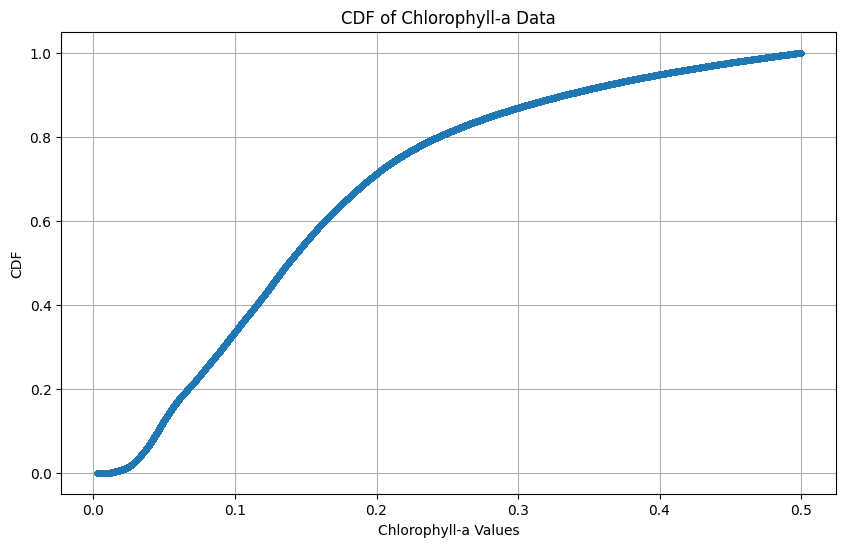


Value Range: (0, 0.25)
Fraction_Valid:  0.38985730667009605
Mean: 0.11963964253664017
Standard Deviation: 0.06028330698609352
50th Percentile: 0.11636598780751228
80th Percentile: 0.1778269112110138
90th Percentile: 0.20632074028253555
max_frequency::  
1977067.0


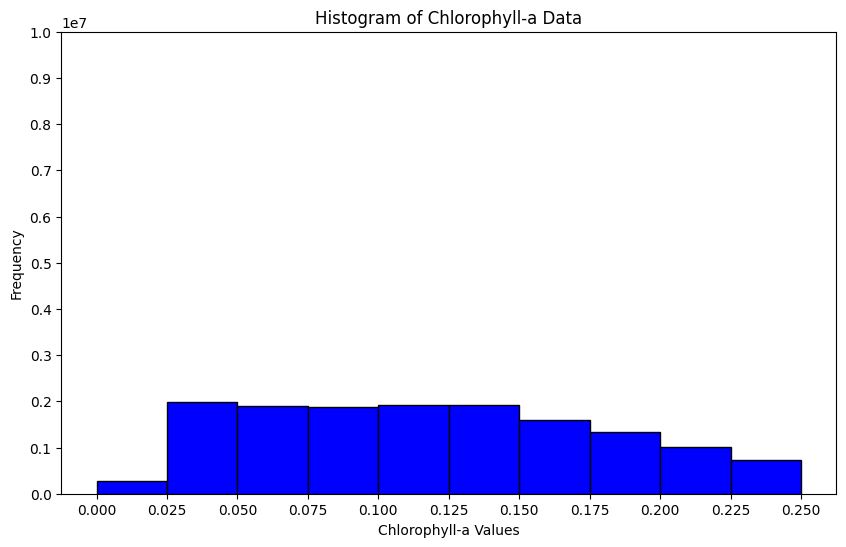

<Figure size 1000x600 with 0 Axes>

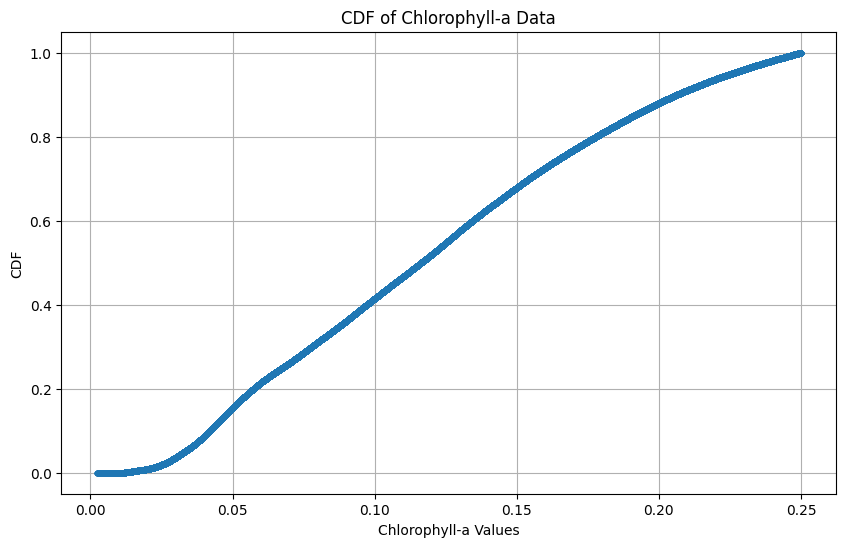


Value Range: (0, 0.1)
Fraction_Valid:  0.1616934585048011
Mean: 0.06052862107753754
Standard Deviation: 0.02245018072426319
50th Percentile: 0.058654697611927986
80th Percentile: 0.08421332389116287
90th Percentile: 0.09220549091696739
max_frequency::  
993175.0


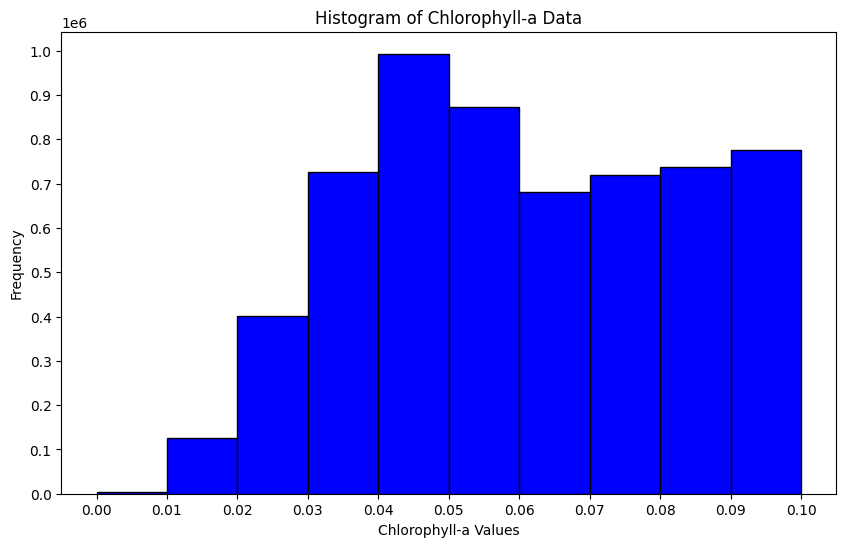

<Figure size 1000x600 with 0 Axes>

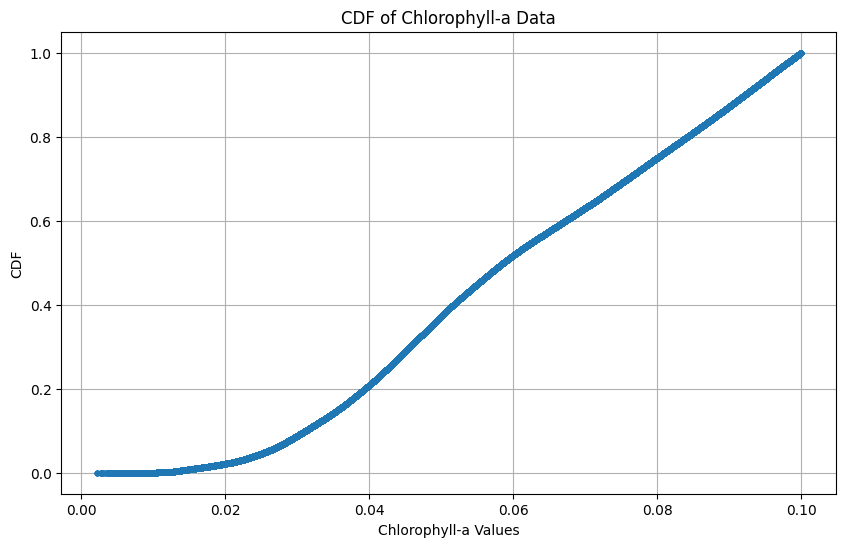


Value Range: (0.01, 1)
Fraction_Valid:  0.5303479188100138
Mean: 0.21134351193904877
Standard Deviation: 0.18744713068008423
50th Percentile: 0.1502830758690834
80th Percentile: 0.3123019337654114
90th Percentile: 0.4803784072399142
max_frequency::  
6718249.0


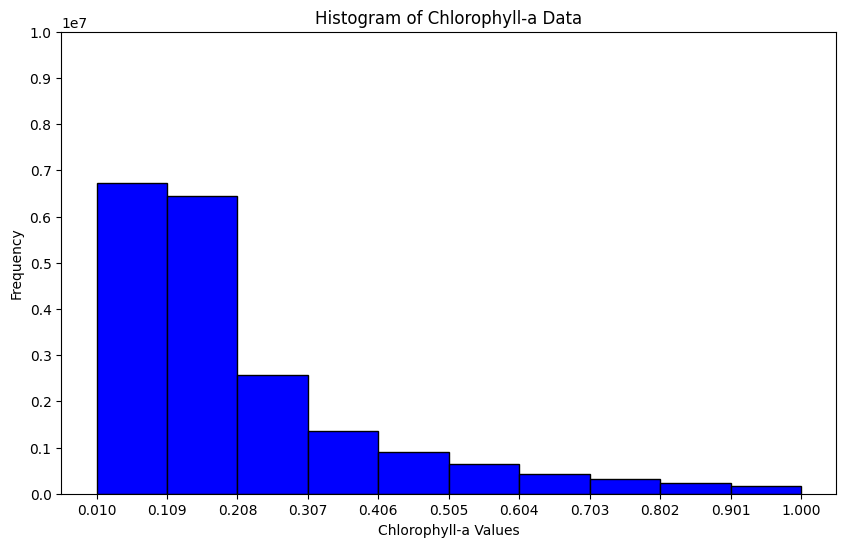

<Figure size 1000x600 with 0 Axes>

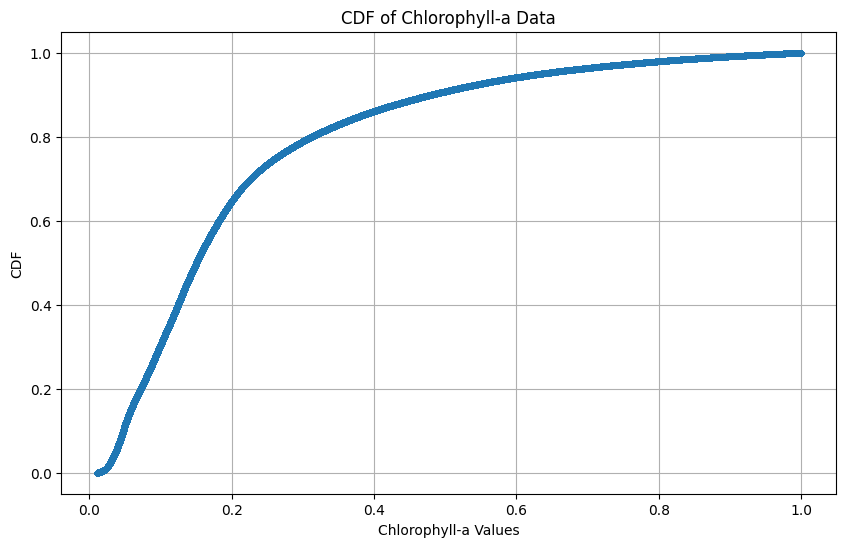


Value Range: (0.01, 0.5)
Fraction_Valid:  0.48158090599279835
Mean: 0.16371291875839233
Standard Deviation: 0.11018075793981552
50th Percentile: 0.1378258764743805
80th Percentile: 0.24371343851089478
90th Percentile: 0.33357709646224976
max_frequency::  
3721150.0


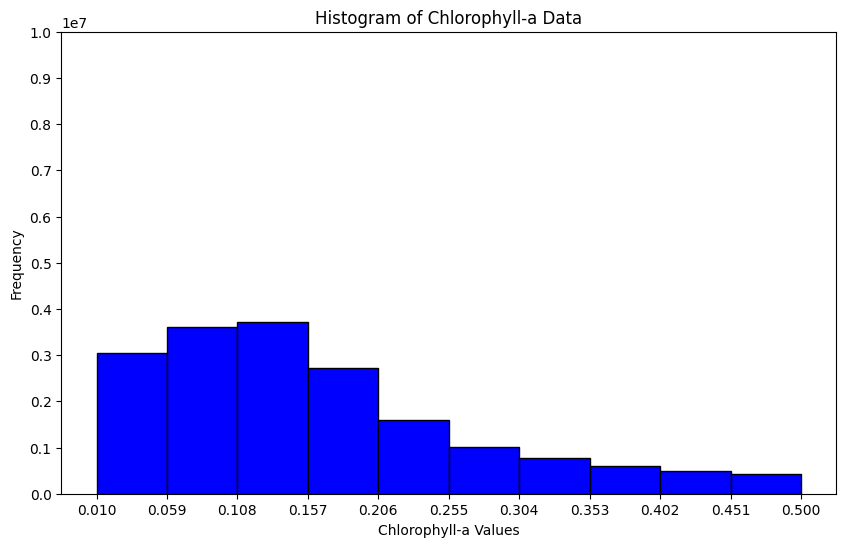

<Figure size 1000x600 with 0 Axes>

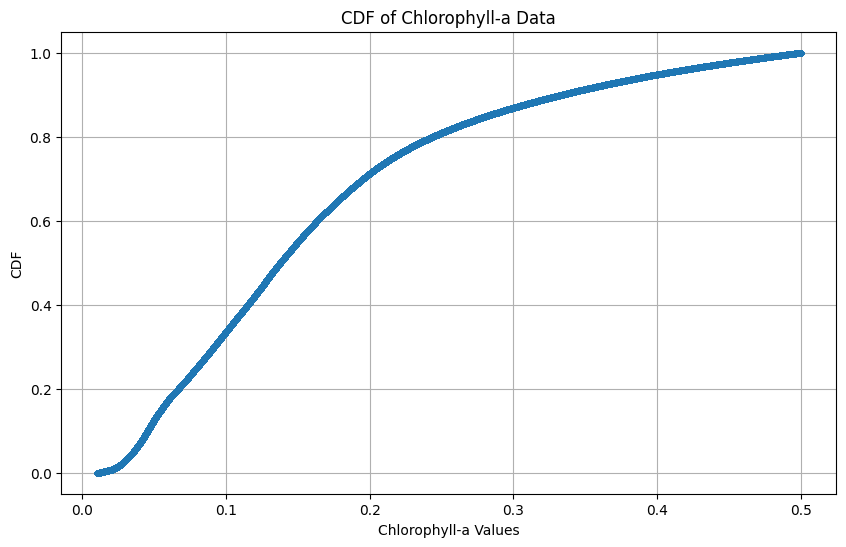


Value Range: (0.01, 0.25)
Fraction_Valid:  0.38978306648662553
Mean: 0.11966082453727722
Standard Deviation: 0.06026912480592728
50th Percentile: 0.11638427525758743
80th Percentile: 0.17783652544021608
90th Percentile: 0.2063274085521698
max_frequency::  
2177723.0


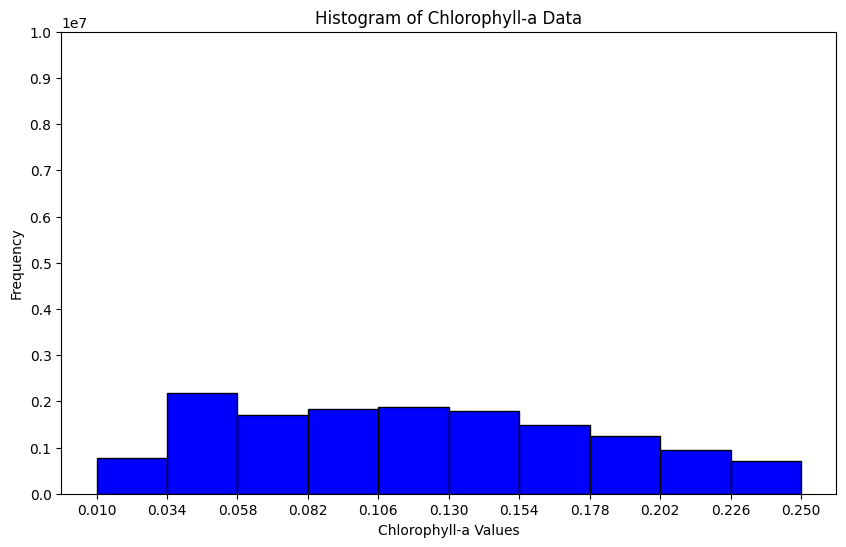

<Figure size 1000x600 with 0 Axes>

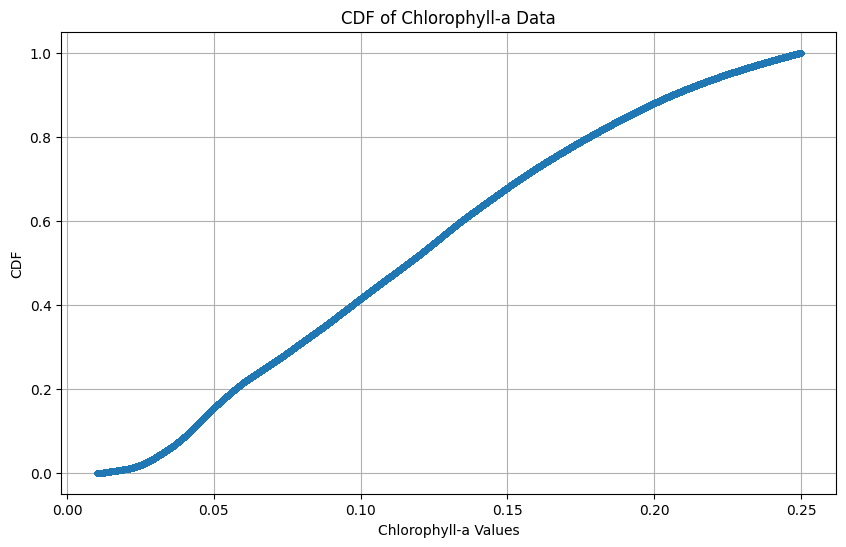


Value Range: (0.01, 0.1)
Fraction_Valid:  0.16161921832133058
Mean: 0.060552969574928284
Standard Deviation: 0.022426526993513107
50th Percentile: 0.058672551065683365
80th Percentile: 0.08422106653451919
90th Percentile: 0.09220880270004278
max_frequency::  
866765.0


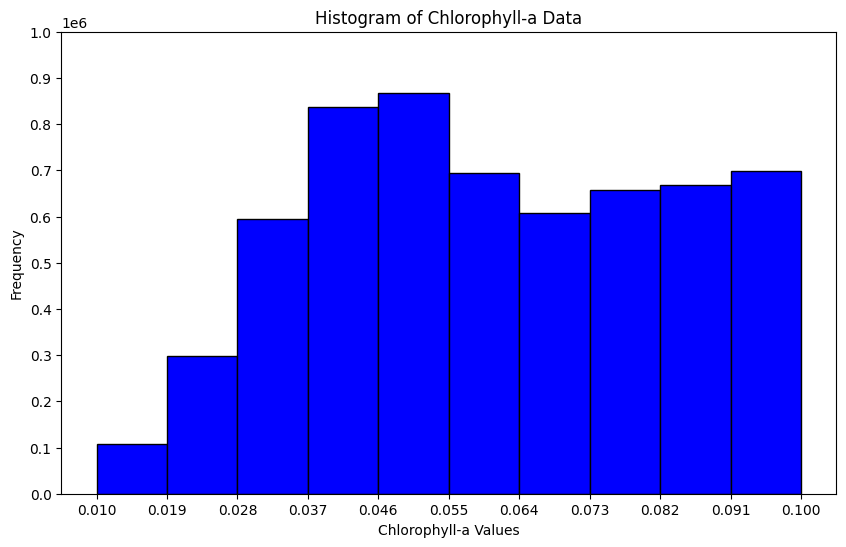

<Figure size 1000x600 with 0 Axes>

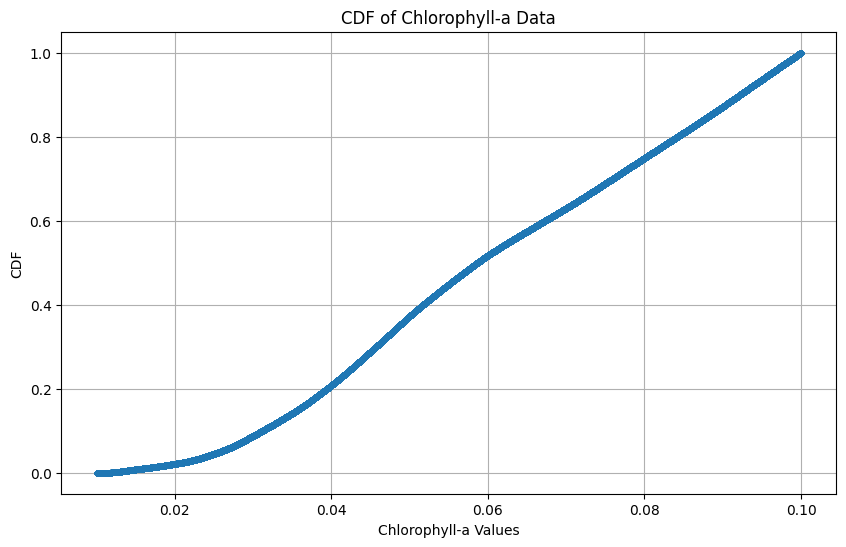

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

def plot_histogram(chlorA_data, value_range):
    chlorA_data = chlorA_data[(chlorA_data >= value_range[0]) & (chlorA_data <= value_range[1])]
    
    plt.figure(figsize=(10,6))
    
    bins = np.linspace(value_range[0], value_range[1], 11)
    hist, bins, patches = plt.hist(chlorA_data, bins=bins, edgecolor='black', color='blue')
    
    plt.xticks(bins)
    
    y_max = max(hist)
    print(y_max)
    a =10**( len(str(int(y_max)))-1  )
    arr=np.array([])
    for i in range(11) :
        arr=np.append(arr,a*i)
    
    plt.yticks(arr)
    
    plt.xlabel('Chlorophyll-a Values')
    plt.ylabel('Frequency')
    plt.title('Histogram of Chlorophyll-a Data')
    
    plt.show()

import numpy as np
import matplotlib.pyplot as plt

def plot_cdf(value_range, chlorA_data):
    filtered_data = chlorA_data[(chlorA_data >= value_range[0]) & (chlorA_data <= value_range[1])]
    
    plt.figure(figsize=(10,6))
    sorted_data = np.sort(filtered_data)
    
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_data, cdf, marker='.', linestyle='none')
    
    plt.xlabel('Chlorophyll-a Values')
    plt.ylabel('CDF')
    plt.title('CDF of Chlorophyll-a Data')
    
    plt.grid(True)
    plt.show()


import numpy as np
import netCDF4 as nc

nc_file = nc.Dataset('AQUA_MODIS.20020101_20021231.L3m.YR.CHL.chlor_a.4km.nc', 'r')  # Open file in read mode

chlorA_data = nc_file.variables['chlor_a'][:]
fill_value = -32767.0
chlorA_data = chlorA_data.flatten()
chlorA_data=chlorA_data[:]
regional_pixels=chlorA_data.shape[0]
chlorA_data= np.where(~np.isnan(chlorA_data), chlorA_data, np.nan)
chlorA_data= chlorA_data.flatten()
chlorA_data= chlorA_data[chlorA_data != fill_value]


latitudes = nc_file.variables['lat'][:]
fill_value = -999.0
nc_file.close()
latitudes = np.where(~np.isnan(latitudes), latitudes, np.nan)
latitudes = latitudes.flatten()
latitudes = latitudes[latitudes != fill_value]


latitude_bands = {
    "30N-30S": (latitudes >= -30) & (latitudes <= 30),
    "60N-60S": (latitudes >= -60) & (latitudes <= 60),
    "90N-90S": np.full_like(latitudes, True, dtype=bool),
    "(30-60)N-(30-60)S": ( (latitudes>=-60) & (latitudes<=-30) & (latitudes>=30) & (latitudes<=60) )
}

value_ranges = [
    (0, 1), (0, 0.5), (0, 0.25), (0, 0.1),
    (0.01, 1), (0.01, 0.5), (0.01, 0.25), (0.01, 0.1)
]



Latitude Band: 30N-30S

Value Range: (0, 1)
Fraction Valid: 0.2402496999314129
Mean: 0.13407954573631287
Standard Deviation: 0.13152682781219482
50th Percentile: 0.09573230892419815
80th Percentile: 0.1794948130846024
90th Percentile: 0.2692581951618197


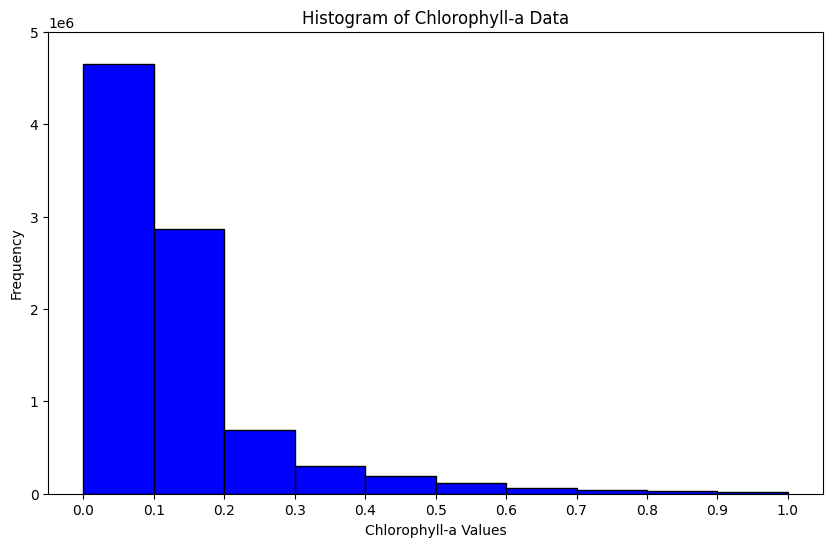

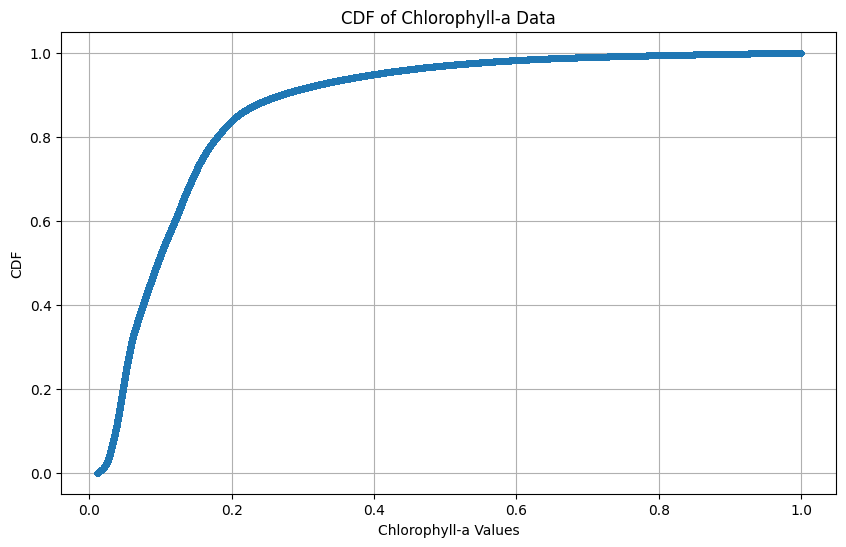


Value Range: (0, 0.5)
Fraction Valid: 0.23300312392832648
Mean: 0.11748214066028595
Standard Deviation: 0.0901465192437172
50th Percentile: 0.09250044077634811
80th Percentile: 0.16875775754451752
90th Percentile: 0.22960747480392468


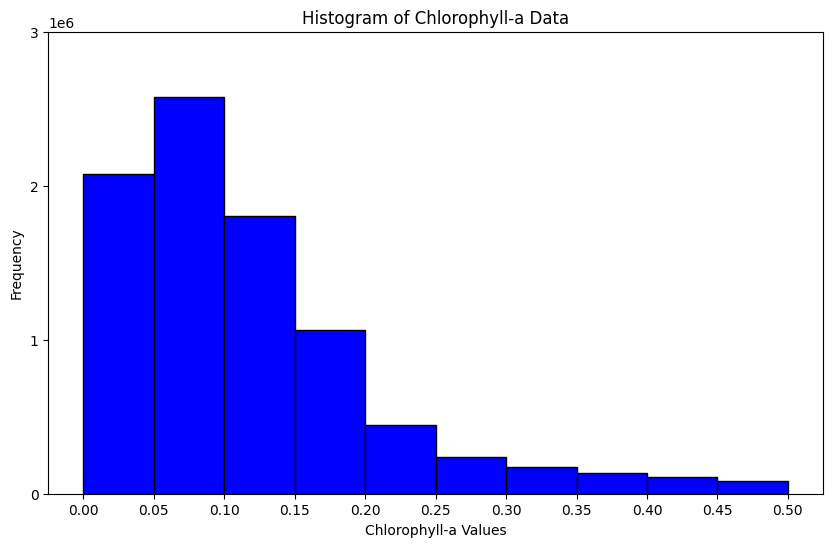

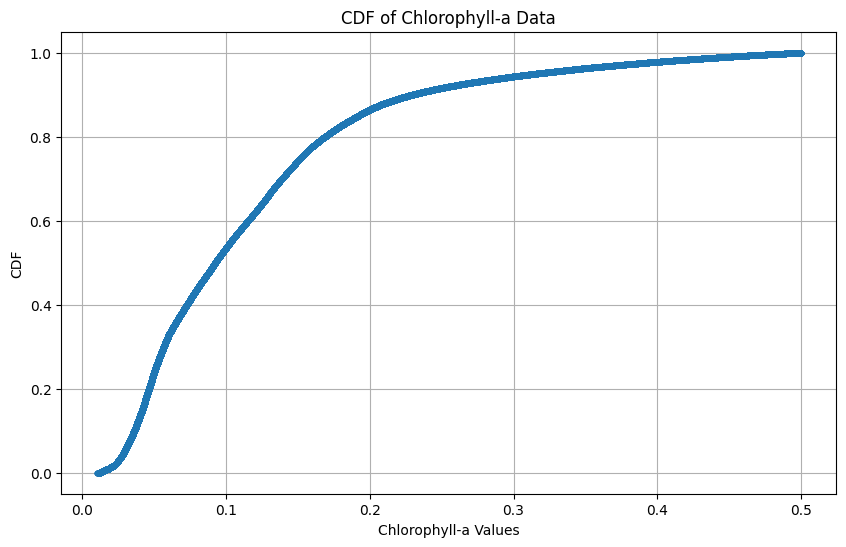


Value Range: (0, 0.25)
Fraction Valid: 0.2134337759344993
Mean: 0.09636162221431732
Standard Deviation: 0.05577041208744049
50th Percentile: 0.08399660885334015
80th Percentile: 0.1473961412906647
90th Percentile: 0.17928016781806944


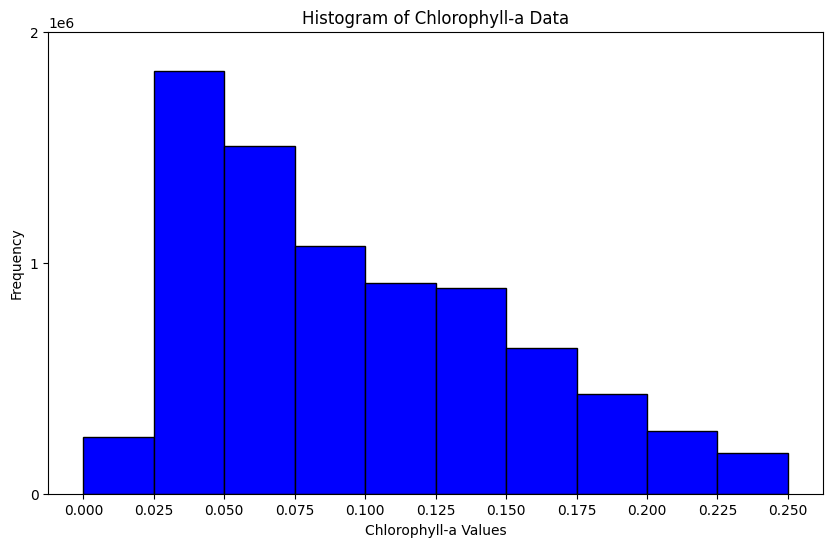

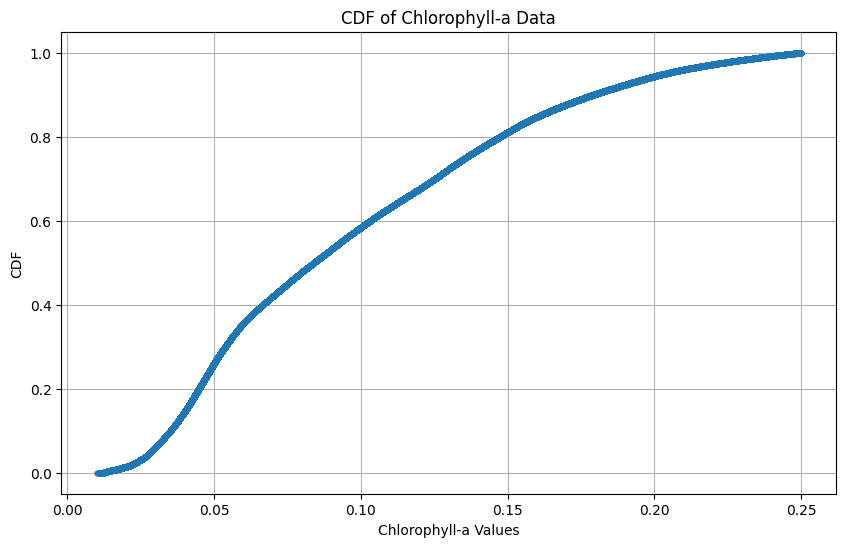


Value Range: (0, 0.1)
Fraction Valid: 0.12470558449074073
Mean: 0.0562460757791996
Standard Deviation: 0.02147880755364895
50th Percentile: 0.05295558273792267
80th Percentile: 0.0780409500002861
90th Percentile: 0.08883072435855865


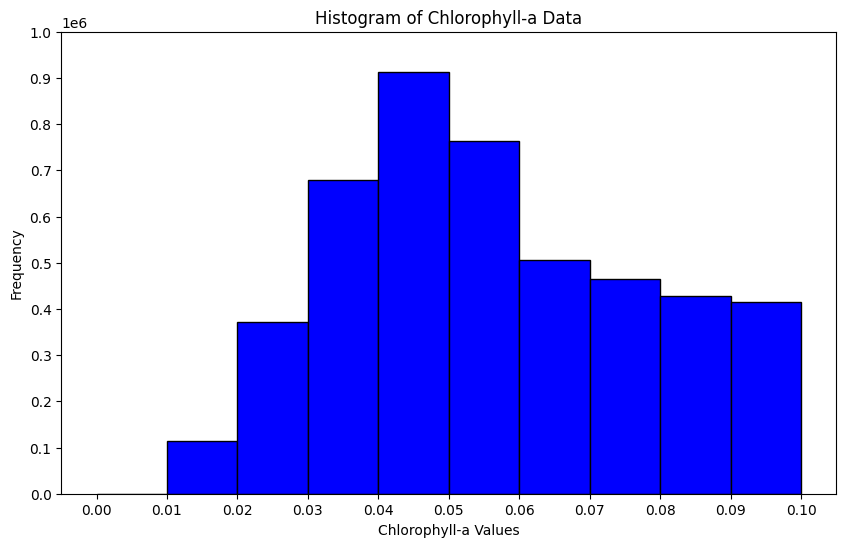

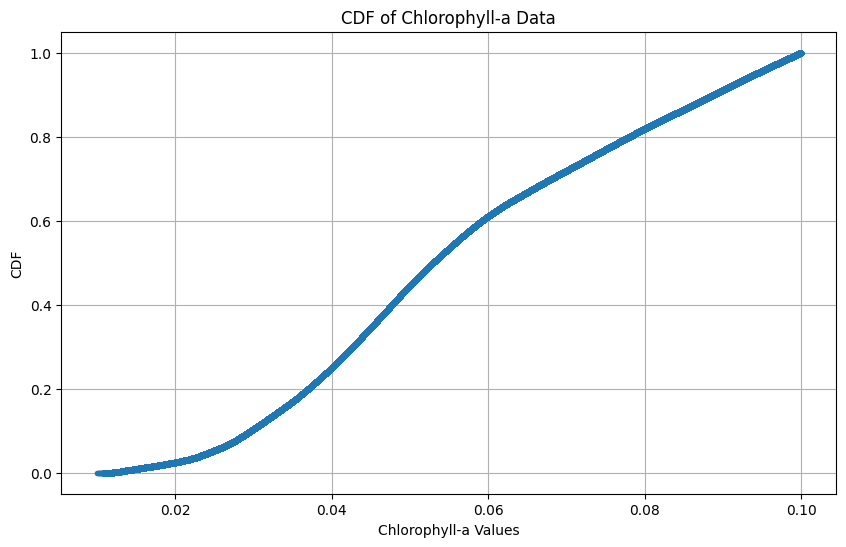


Value Range: (0.02, 1)
Fraction Valid: 0.2371737289951989
Mean: 0.1356094479560852
Standard Deviation: 0.13168436288833618
50th Percentile: 0.09713637456297874
80th Percentile: 0.1807103663682938
90th Percentile: 0.2716416656970978


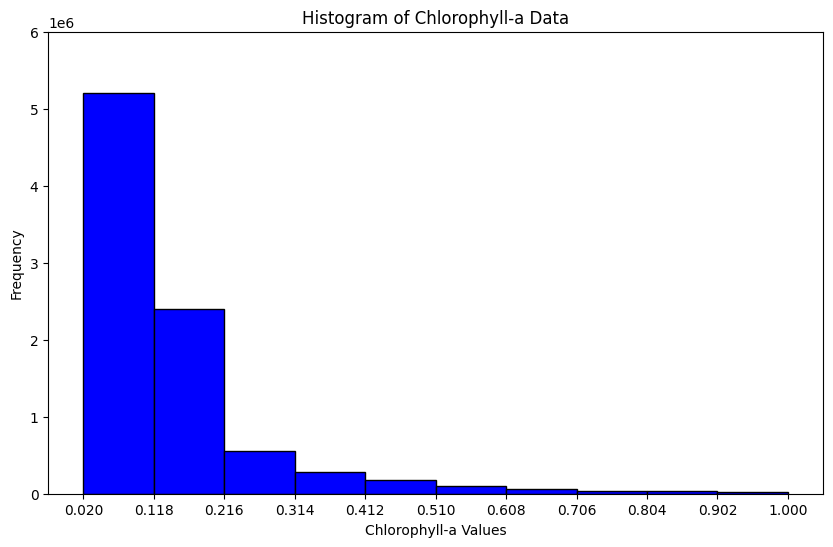

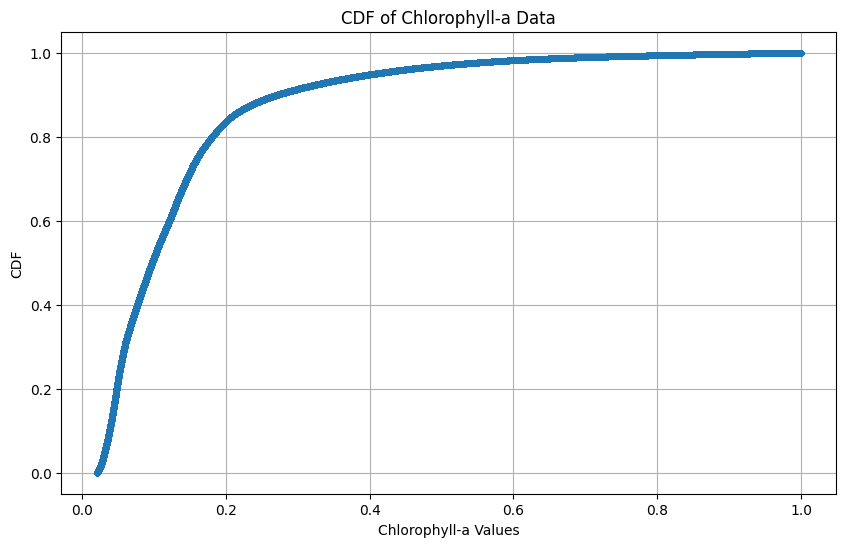


Value Range: (0.02, 0.5)
Fraction Valid: 0.22992715299211247
Mean: 0.11883830279111862
Standard Deviation: 0.0899762213230133
50th Percentile: 0.09385179728269577
80th Percentile: 0.16982576251029968
90th Percentile: 0.2310875385999681


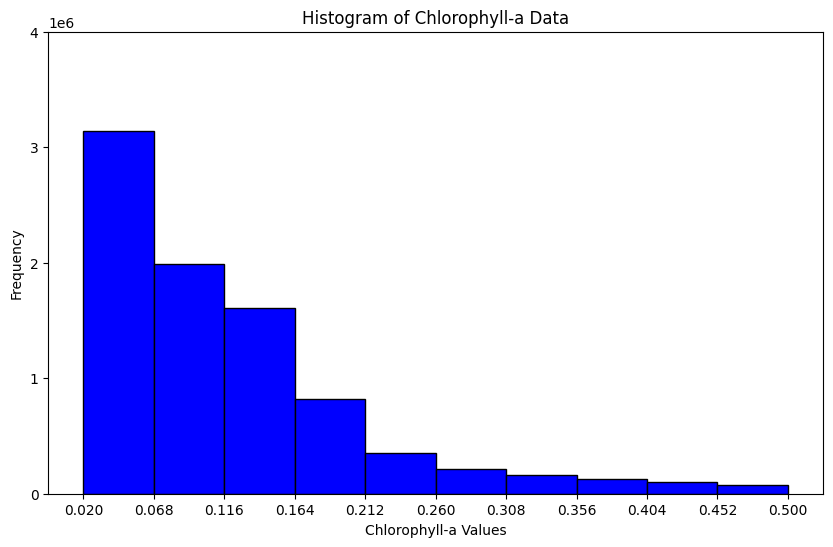

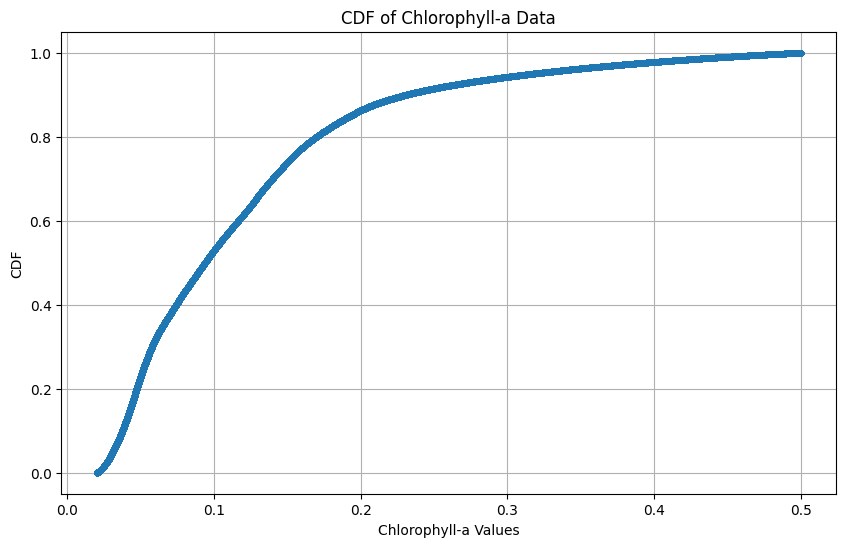


Value Range: (0.02, 0.25)
Fraction Valid: 0.21035780499828532
Mean: 0.09753518551588058
Standard Deviation: 0.05531890317797661
50th Percentile: 0.08534400910139084
80th Percentile: 0.1480972170829773
90th Percentile: 0.17988623380661012


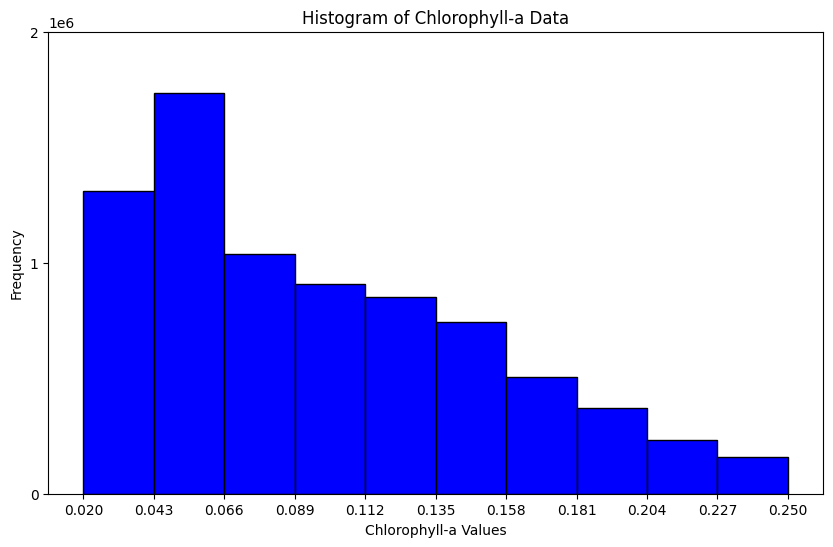

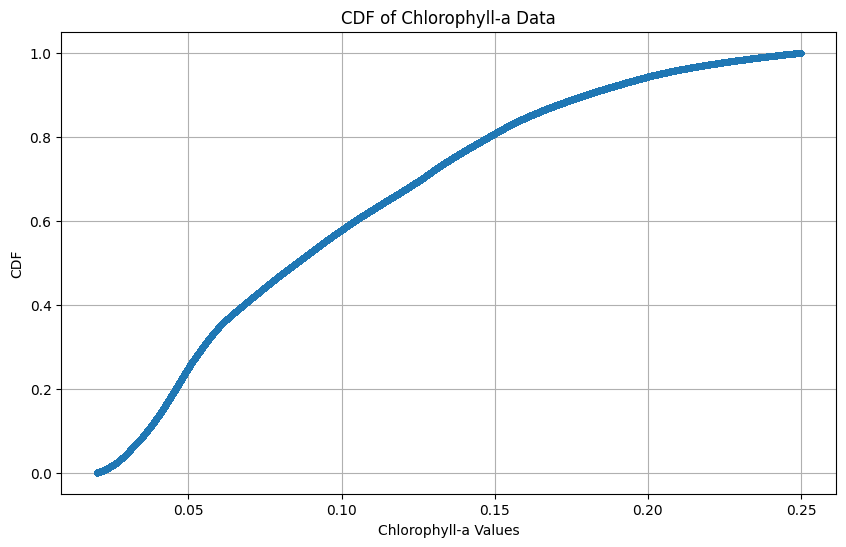


Value Range: (0.02, 0.1)
Fraction Valid: 0.12162961355452676
Mean: 0.05726117640733719
Standard Deviation: 0.020762674510478973
50th Percentile: 0.05367742478847504
80th Percentile: 0.078550323843956
90th Percentile: 0.08910072594881058


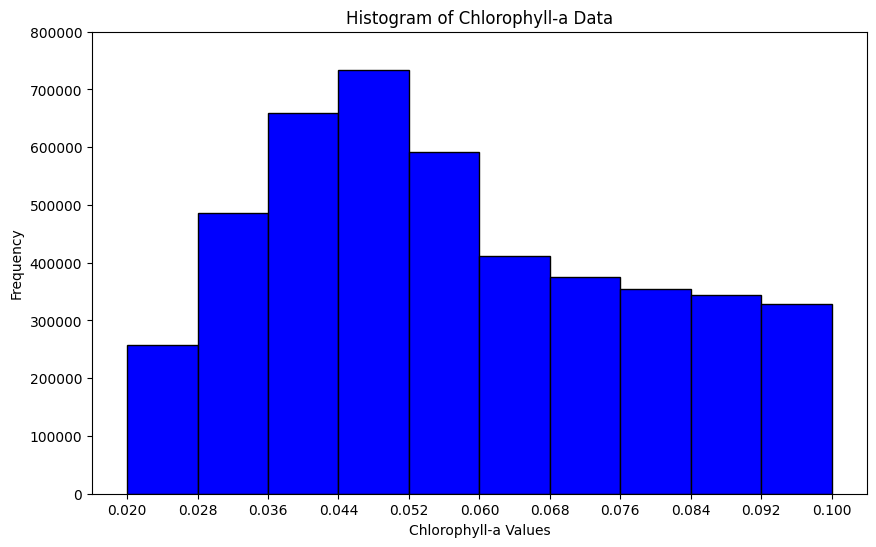

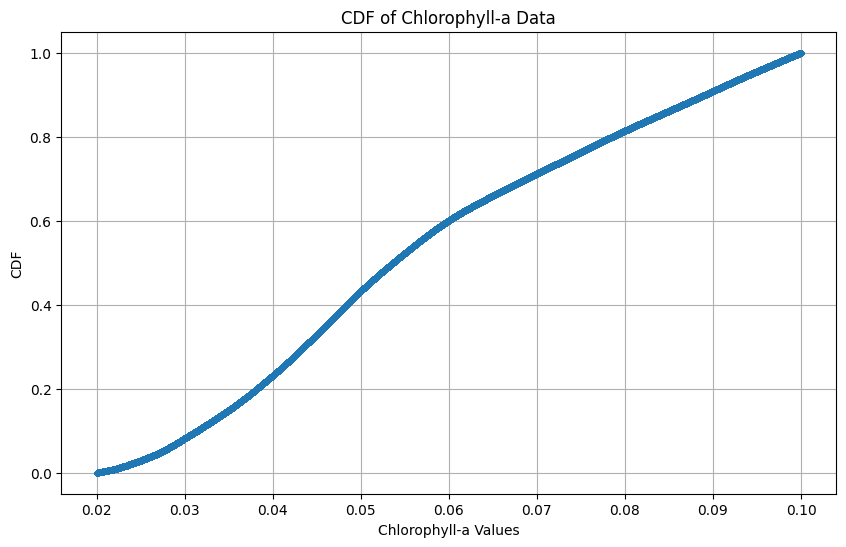


Latitude Band: 60N-60S

Value Range: (0, 1)
Fraction Valid: 0.46498470186042523
Mean: 0.18976163864135742
Standard Deviation: 0.16657204926013947
50th Percentile: 0.1409912109375
80th Percentile: 0.27105334401130676
90th Percentile: 0.4049546718597412


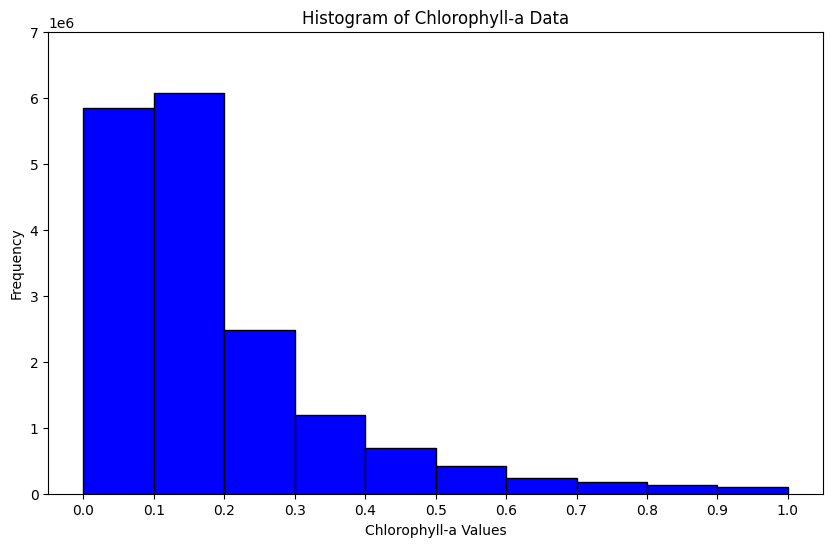

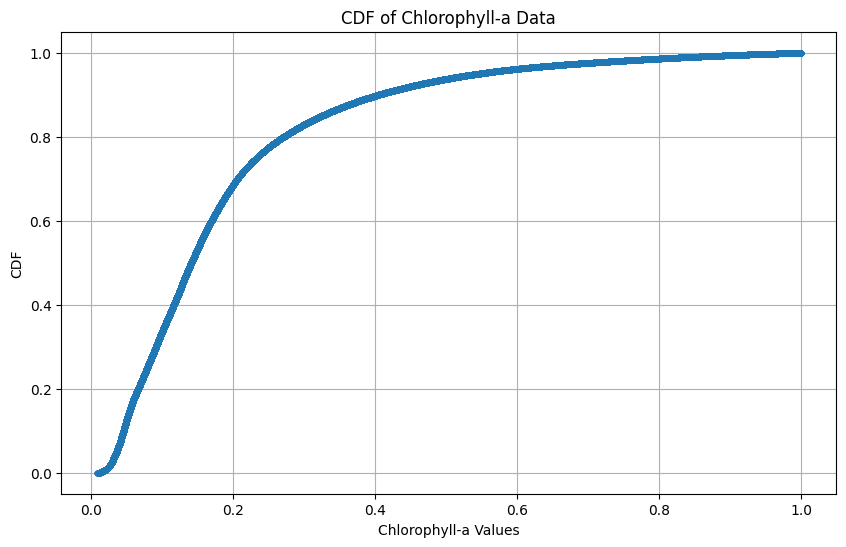


Value Range: (0, 0.5)
Fraction Valid: 0.43593093599965704
Mean: 0.1571969985961914
Standard Deviation: 0.1065053716301918
50th Percentile: 0.13294203579425812
80th Percentile: 0.23280826210975647
90th Percentile: 0.3173430263996124


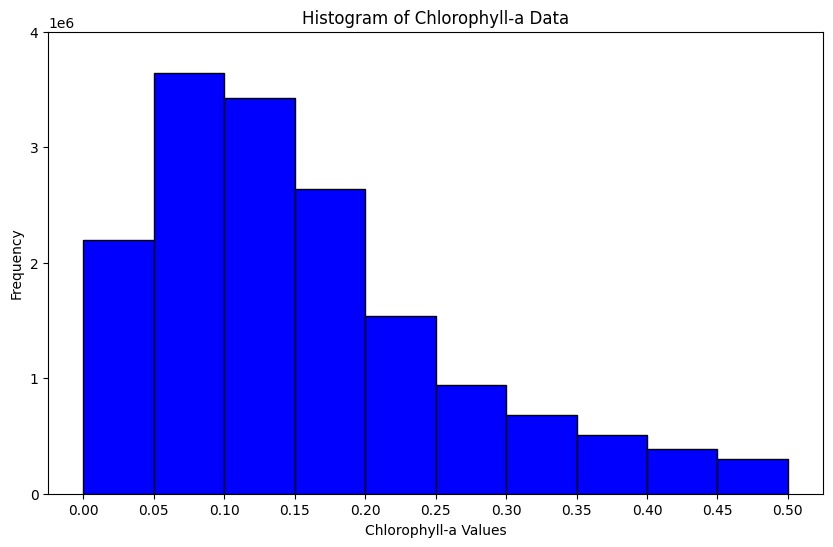

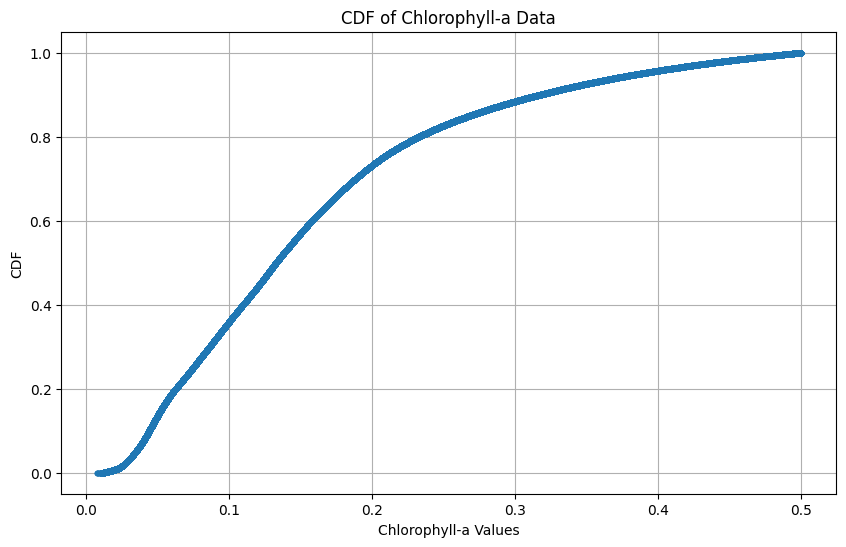


Value Range: (0, 0.25)
Fraction Valid: 0.36022009495027435
Mean: 0.1174992173910141
Standard Deviation: 0.0603393092751503
50th Percentile: 0.11310873925685883
80th Percentile: 0.1758483201265335
90th Percentile: 0.2047896683216095


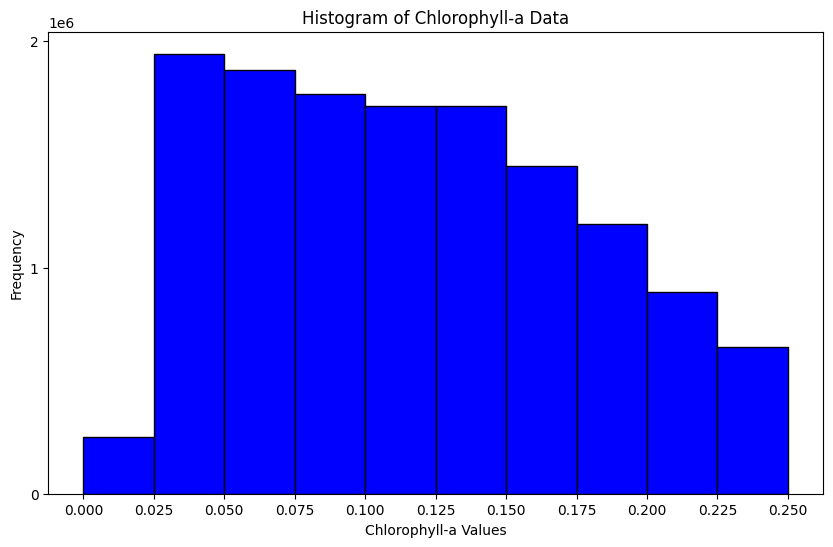

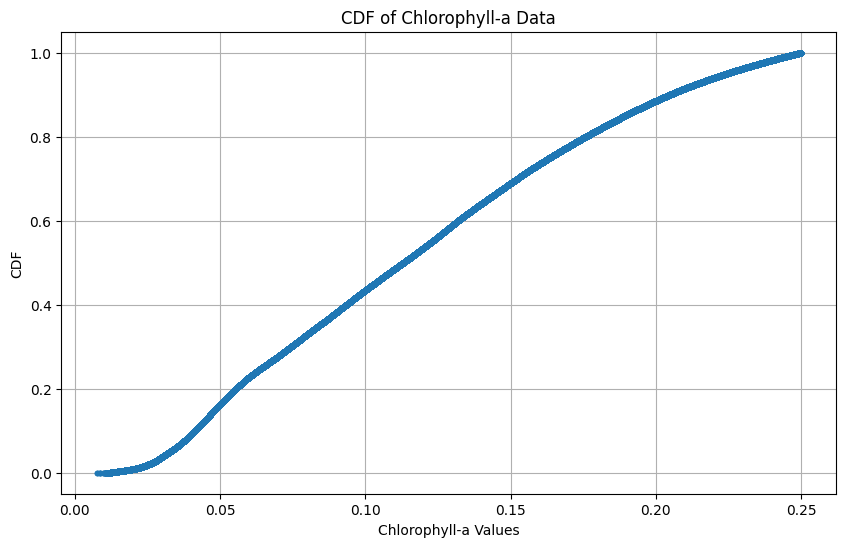


Value Range: (0, 0.1)
Fraction Valid: 0.15637886874142662
Mean: 0.06022517383098602
Standard Deviation: 0.022180302068591118
50th Percentile: 0.05821073055267334
80th Percentile: 0.08347382098436357
90th Percentile: 0.09175278395414353


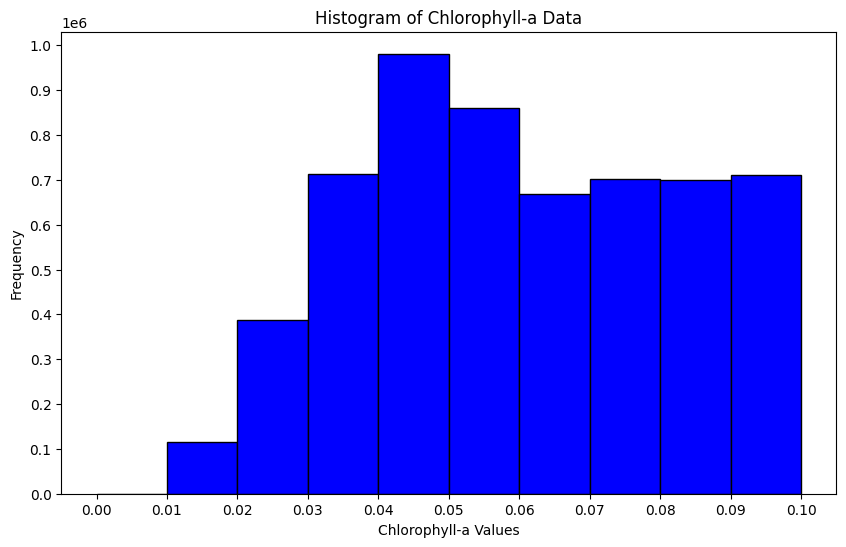

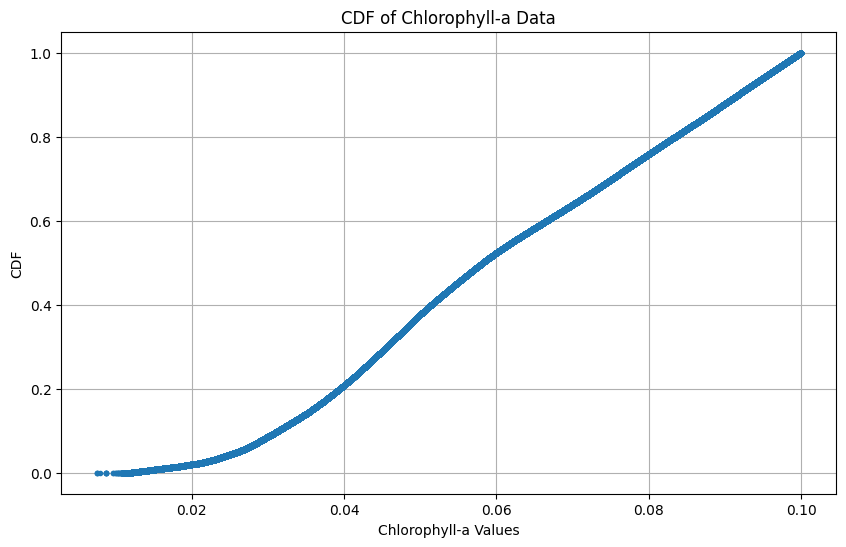


Value Range: (0.02, 1)
Fraction Valid: 0.4619003450788752
Mean: 0.1909210979938507
Standard Deviation: 0.16651956737041473
50th Percentile: 0.1418745219707489
80th Percentile: 0.2722656726837158
90th Percentile: 0.4063145756721498


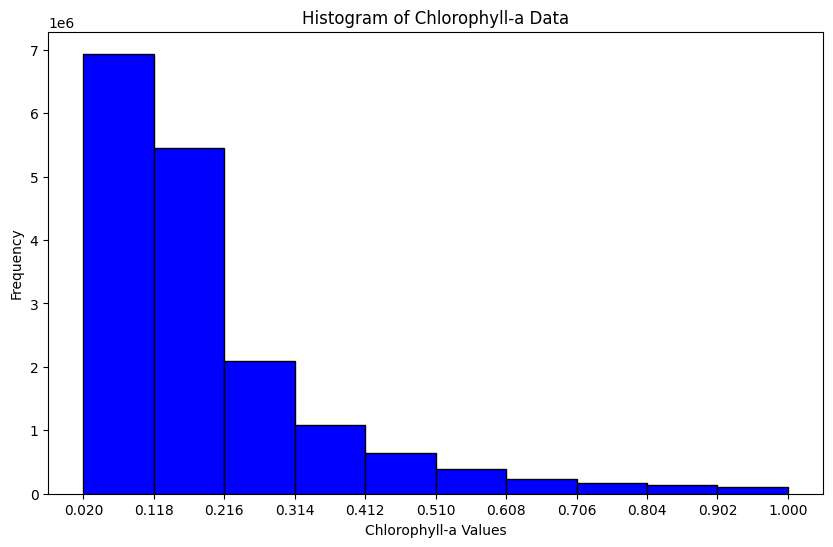

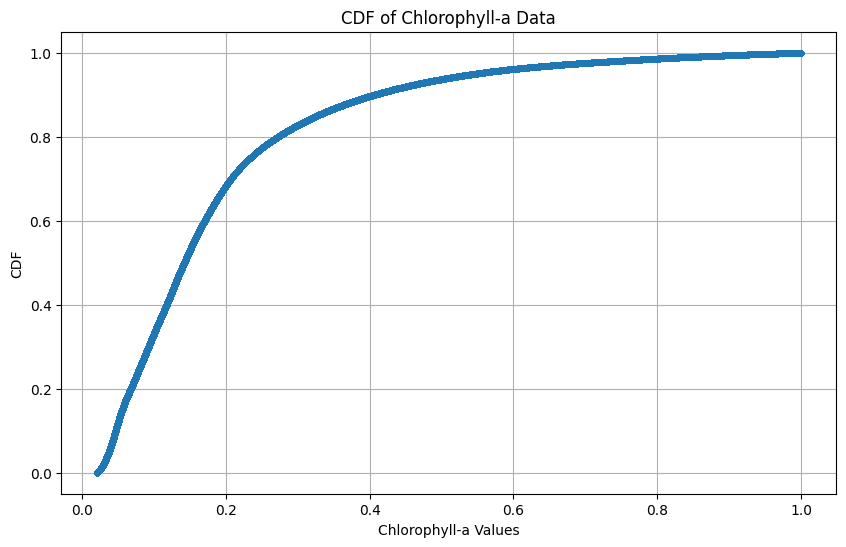


Value Range: (0.02, 0.5)
Fraction Valid: 0.432846579218107
Mean: 0.15820226073265076
Standard Deviation: 0.10621357709169388
50th Percentile: 0.1337631717324257
80th Percentile: 0.23366375863552097
90th Percentile: 0.31815993785858154


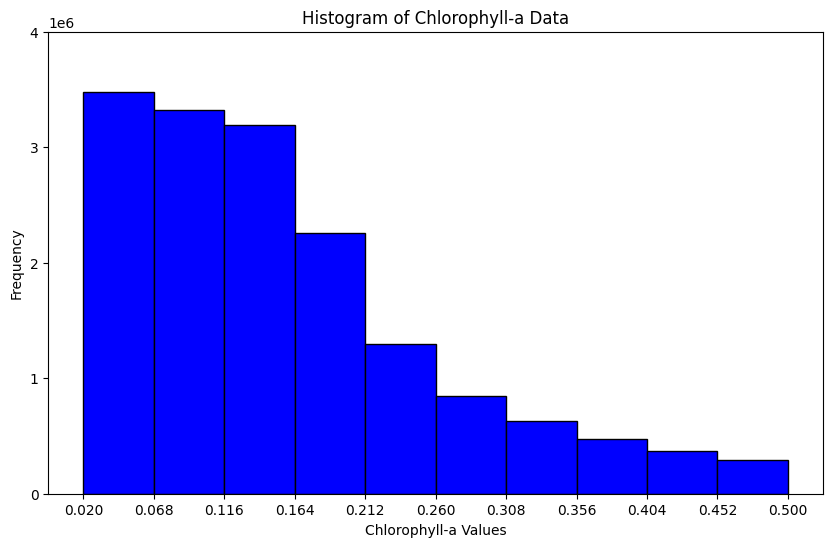

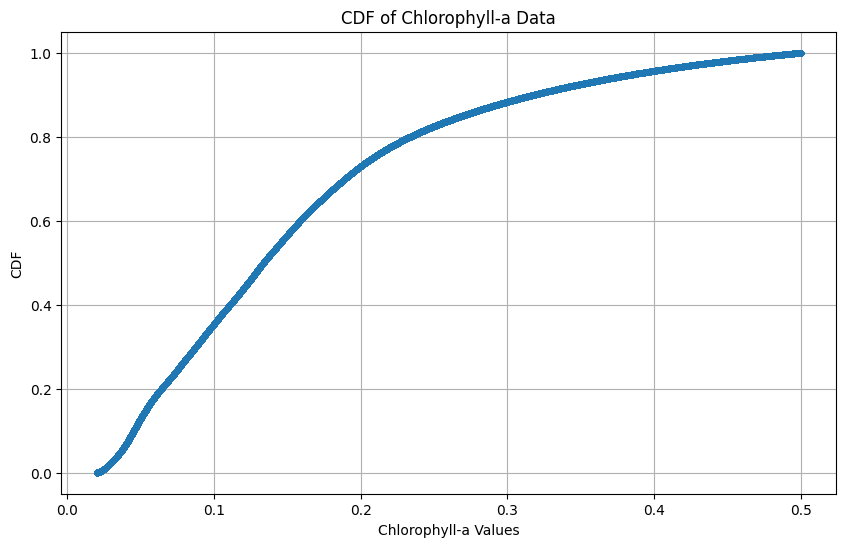


Value Range: (0.02, 0.25)
Fraction Valid: 0.3571357381687243
Mean: 0.11837483942508698
Standard Deviation: 0.05985559523105621
50th Percentile: 0.11396605148911476
80th Percentile: 0.17628948390483856
90th Percentile: 0.20507927387952804


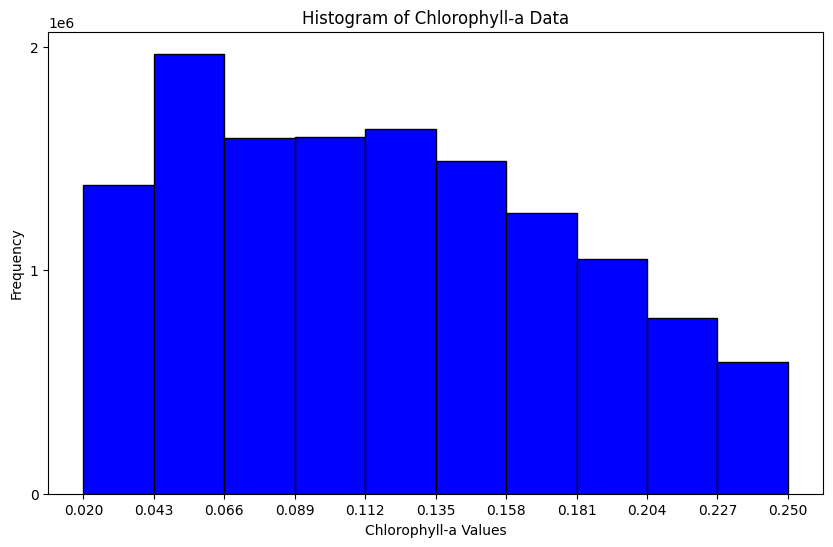

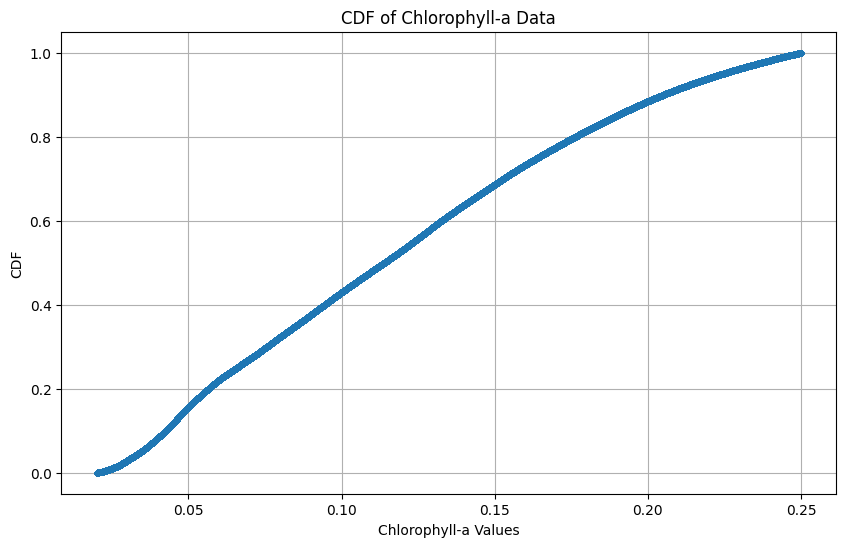


Value Range: (0.02, 0.1)
Fraction Valid: 0.15329451195987653
Mean: 0.06111269071698189
Standard Deviation: 0.021489819511771202
50th Percentile: 0.058932628482580185
80th Percentile: 0.08381101340055466
90th Percentile: 0.09191163033246995


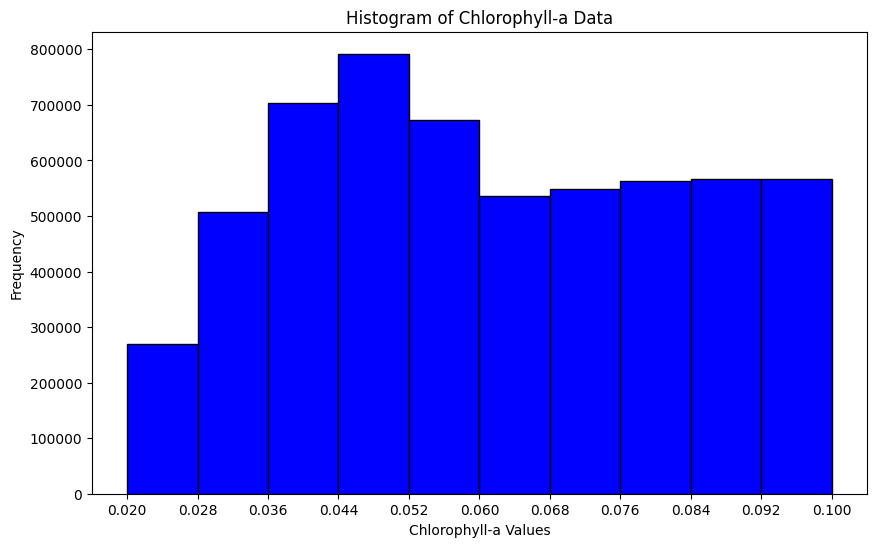

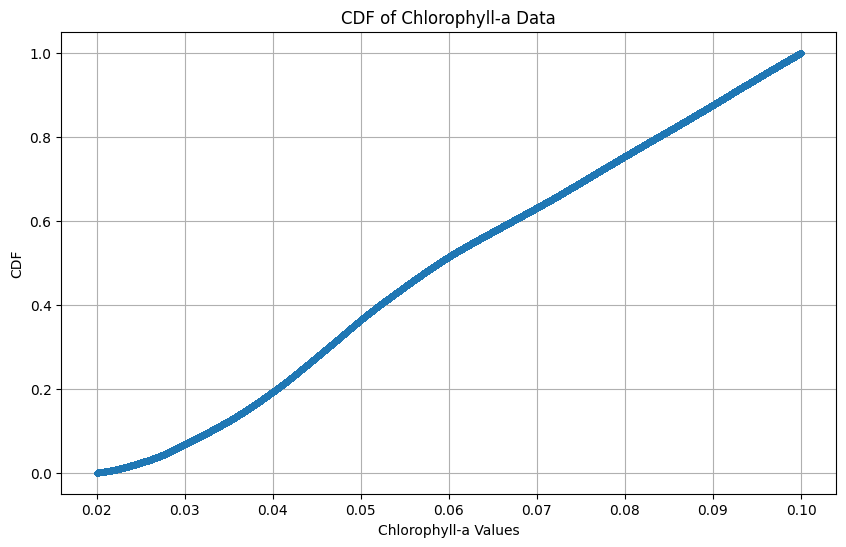


Latitude Band: 90N-90S

Value Range: (0, 1)
Fraction Valid: 0.5304221589934842
Mean: 0.21131481230258942
Standard Deviation: 0.1874496191740036
50th Percentile: 0.15026403963565826
80th Percentile: 0.312269389629364
90th Percentile: 0.4803459048271179


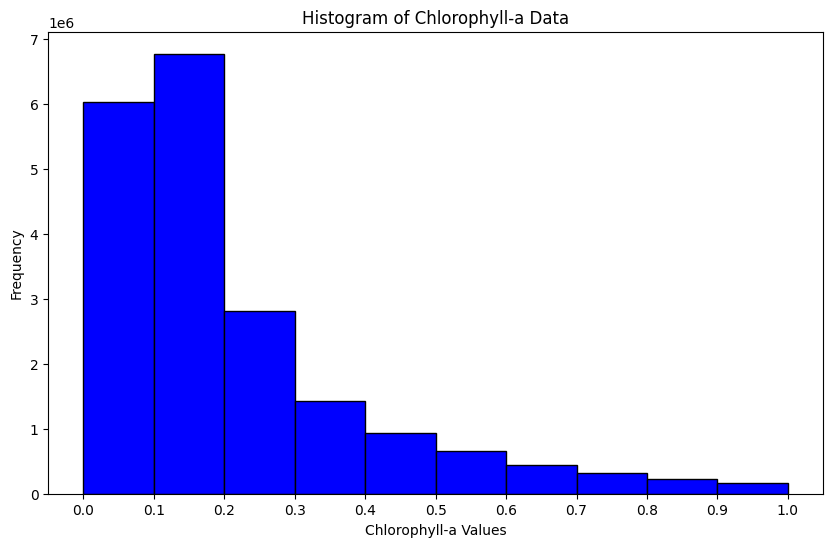

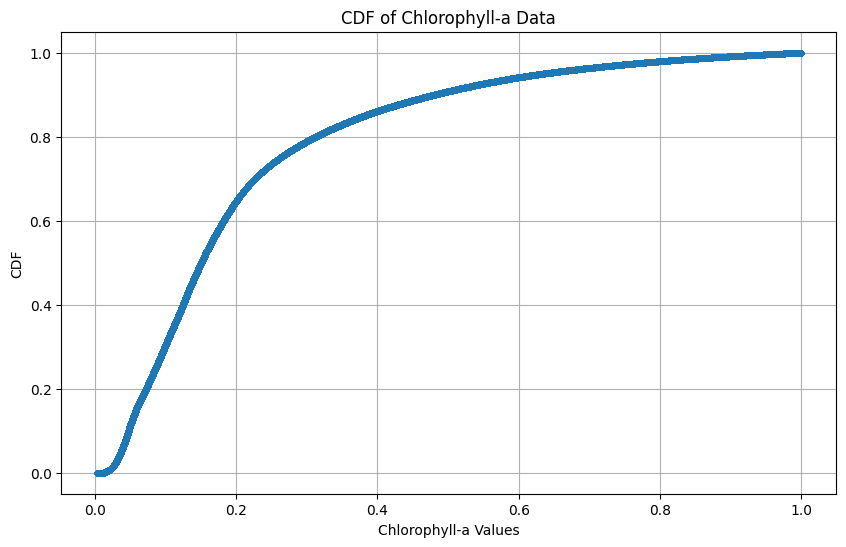


Value Range: (0, 0.5)
Fraction Valid: 0.48165514617626887
Mean: 0.16368892788887024
Standard Deviation: 0.11018934845924377
50th Percentile: 0.13780661672353745
80th Percentile: 0.2436931371688843
90th Percentile: 0.3335564553737641


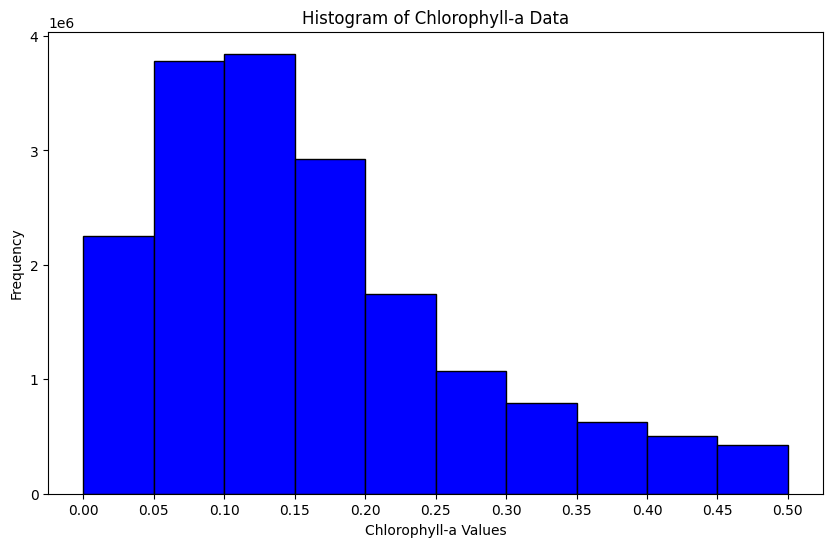

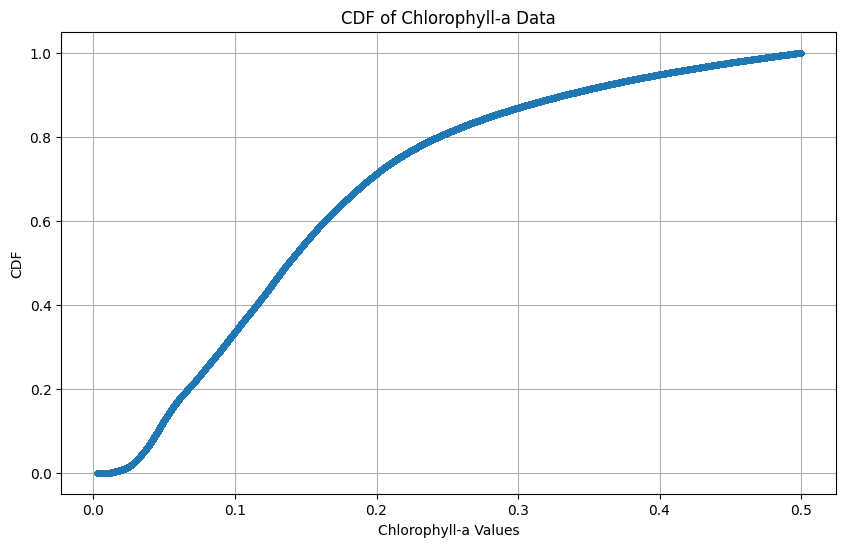


Value Range: (0, 0.25)
Fraction Valid: 0.38985730667009605
Mean: 0.11963964253664017
Standard Deviation: 0.06028330698609352
50th Percentile: 0.11636598780751228
80th Percentile: 0.1778269112110138
90th Percentile: 0.20632074028253555


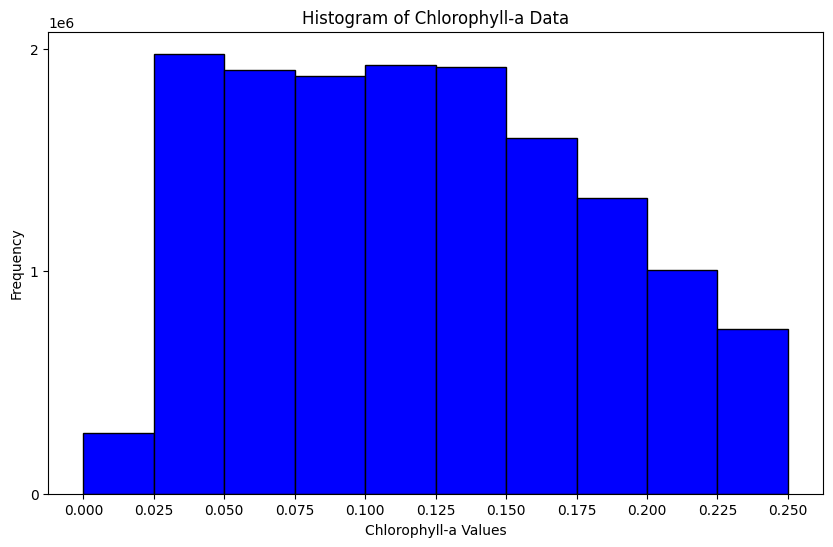

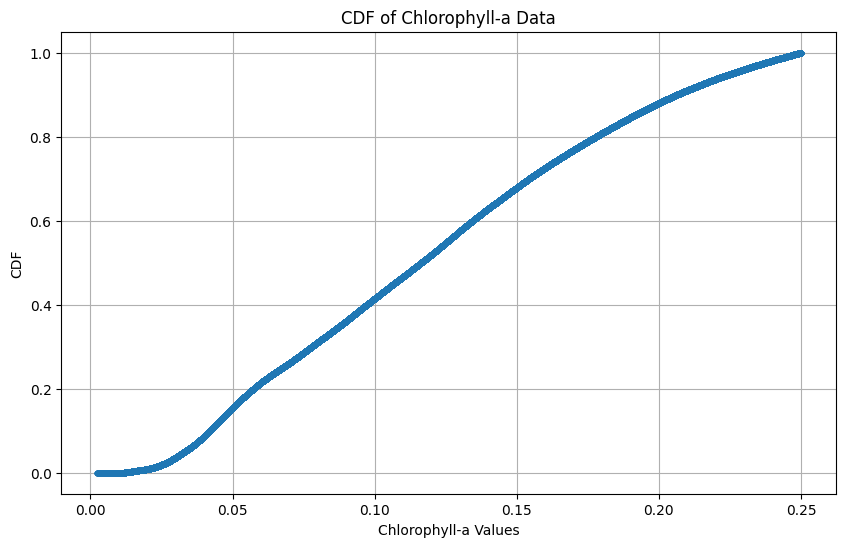


Value Range: (0, 0.1)
Fraction Valid: 0.1616934585048011
Mean: 0.06052862107753754
Standard Deviation: 0.02245018072426319
50th Percentile: 0.058654697611927986
80th Percentile: 0.08421332389116287
90th Percentile: 0.09220549091696739


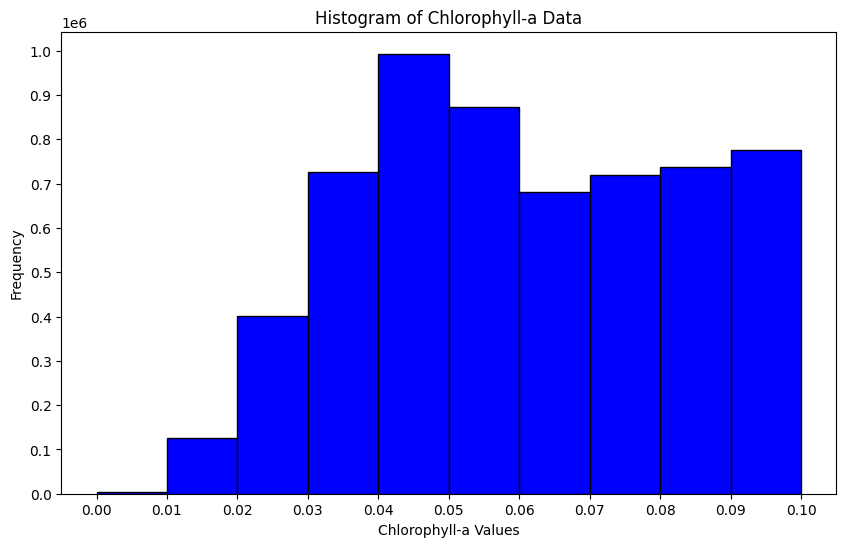

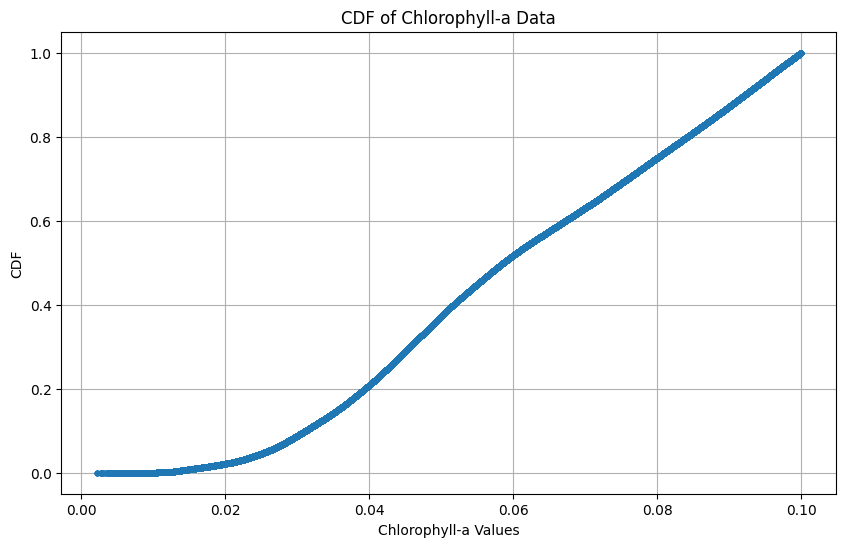


Value Range: (0.02, 1)
Fraction Valid: 0.5269554558899177
Mean: 0.2126004993915558
Standard Deviation: 0.18739129602909088
50th Percentile: 0.15116889774799347
80th Percentile: 0.31380781531333923
90th Percentile: 0.48189353942871127


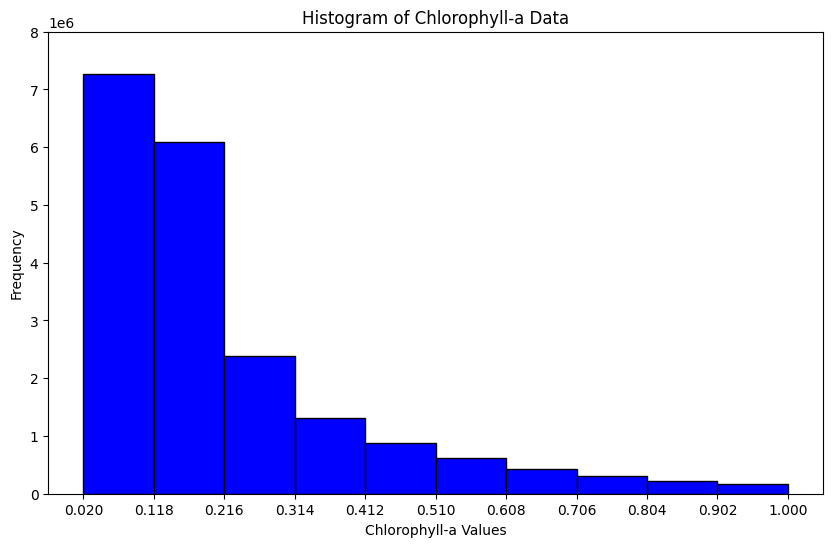

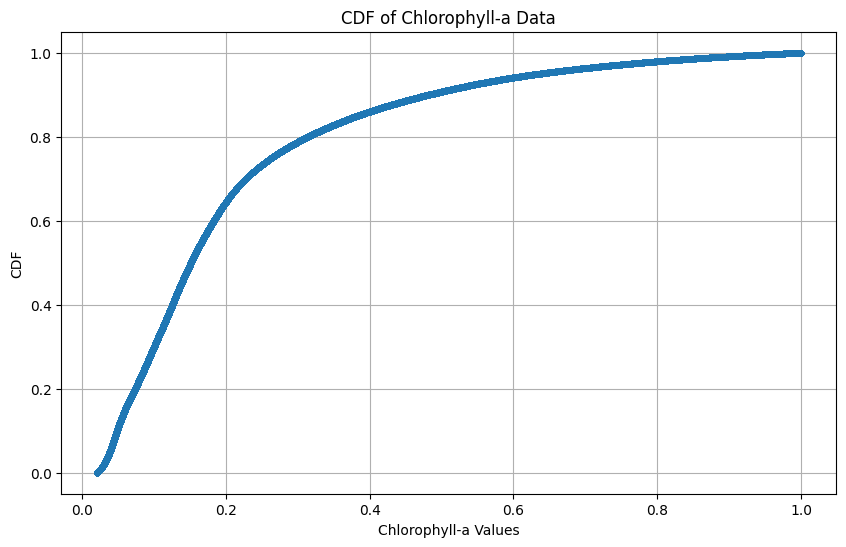


Value Range: (0.02, 0.5)
Fraction Valid: 0.4781884430727023
Mean: 0.1647605150938034
Standard Deviation: 0.10986420512199402
50th Percentile: 0.1386757493019104
80th Percentile: 0.2446332424879074
90th Percentile: 0.33440160751342773


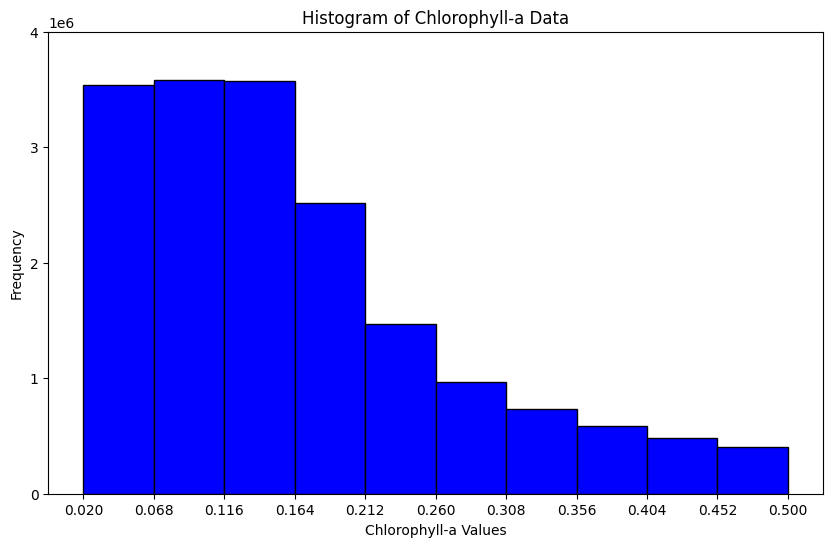

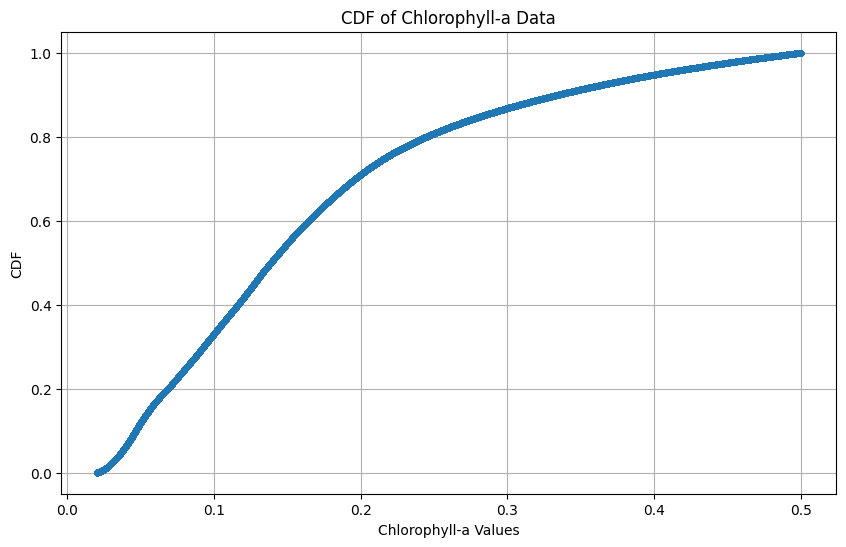


Value Range: (0.02, 0.25)
Fraction Valid: 0.3863906035665295
Mean: 0.12057051807641983
Standard Deviation: 0.059742480516433716
50th Percentile: 0.11720564588904381
80th Percentile: 0.17827838361263276
90th Percentile: 0.20661717206239702


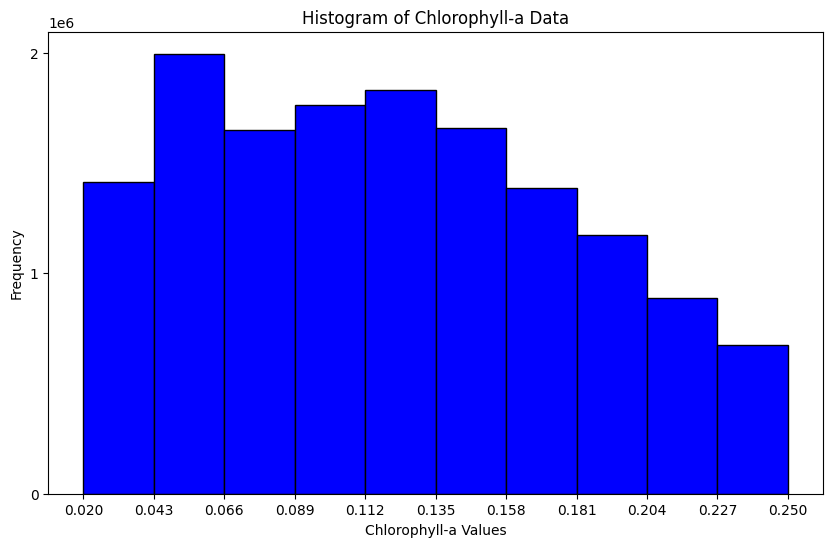

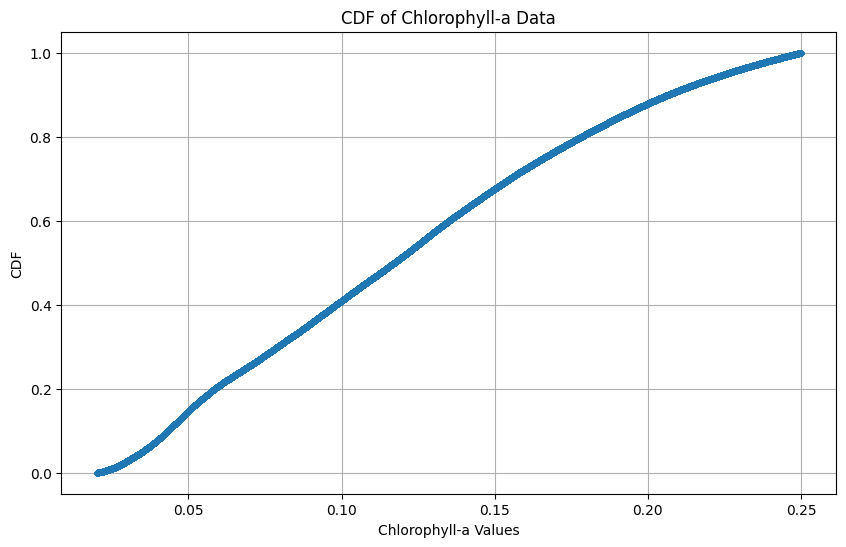


Value Range: (0.02, 0.1)
Fraction Valid: 0.15822675540123457
Mean: 0.06150679290294647
Standard Deviation: 0.0216856487095356
50th Percentile: 0.05946998484432697
80th Percentile: 0.08456915467977524
90th Percentile: 0.09237049371004105


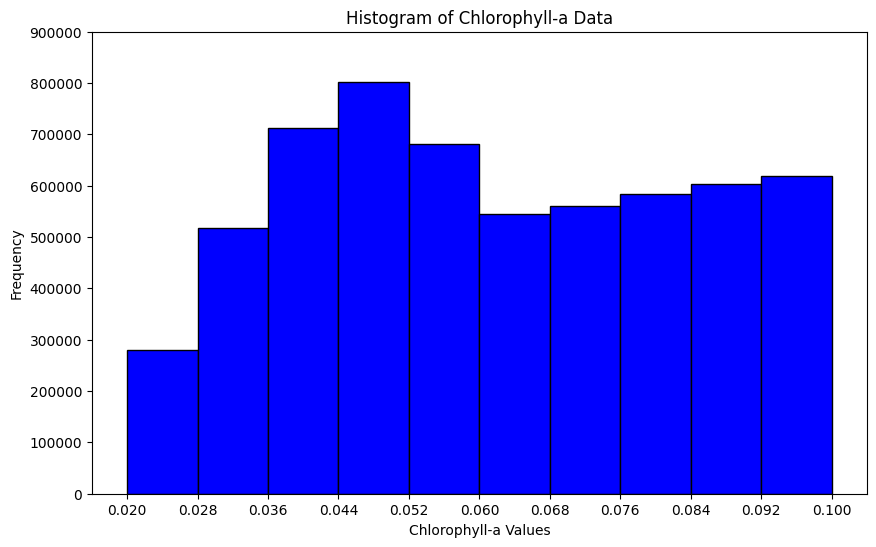

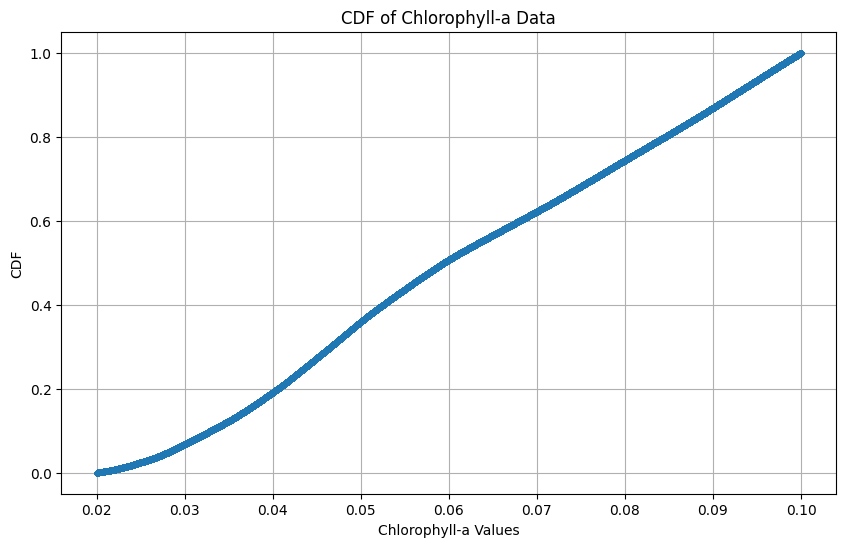


Latitude Band: (30-60)N-(30-60)S

Value Range: (0, 1)
Fraction Valid: 0.22473500192901236
Mean: 0.24928806722164154
Standard Deviation: 0.17904305458068848
50th Percentile: 0.19326023757457733
80th Percentile: 0.3524430990219116
90th Percentile: 0.4937412202358246


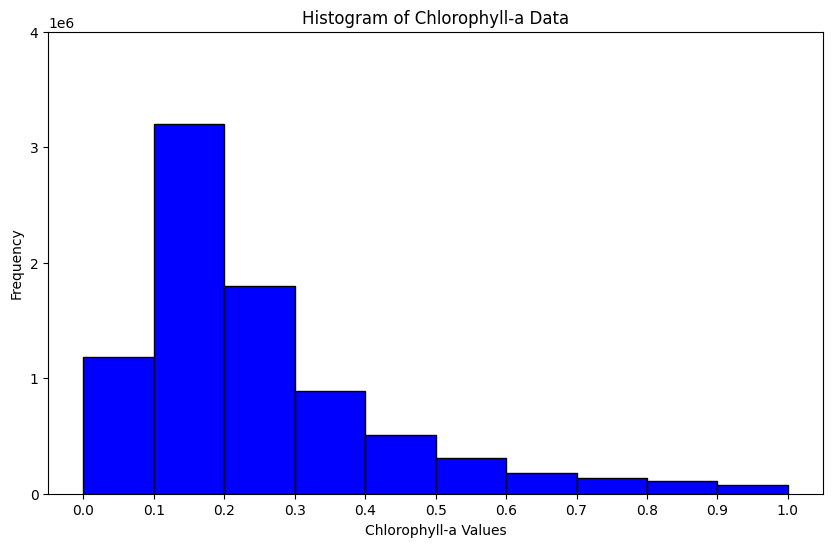

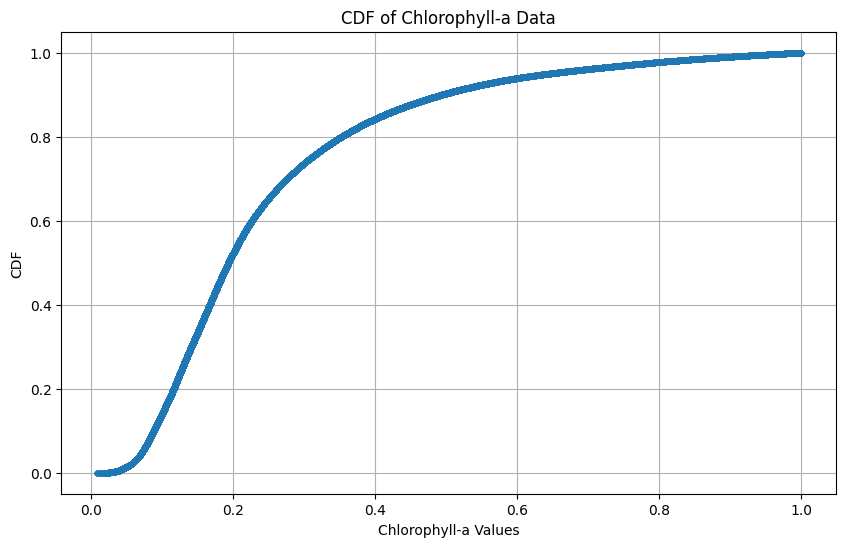


Value Range: (0, 0.5)
Fraction Valid: 0.2029278120713306
Mean: 0.20279771089553833
Standard Deviation: 0.1055779829621315
50th Percentile: 0.1800219491124153
80th Percentile: 0.28995180130004883
90th Percentile: 0.36531549096107496


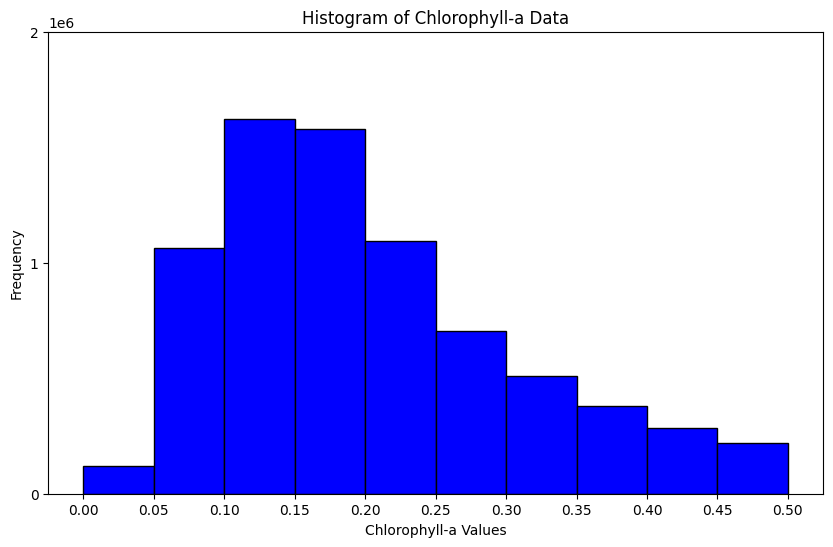

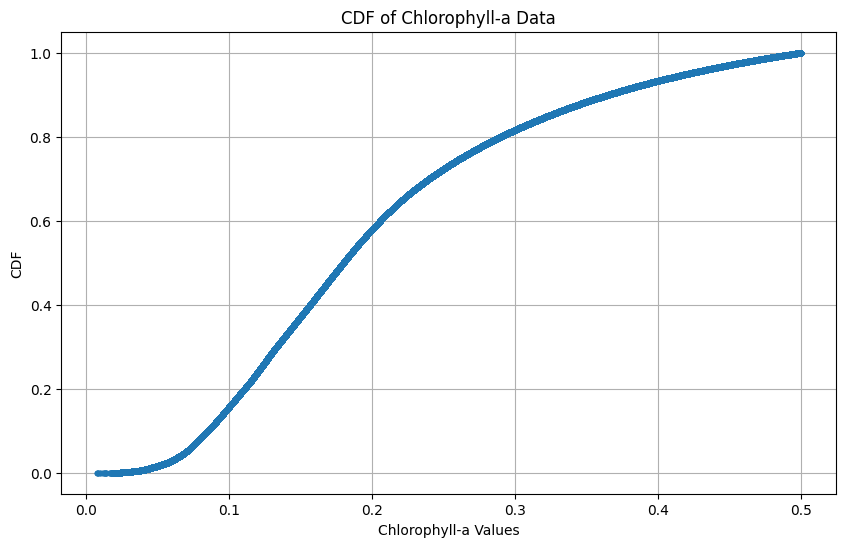


Value Range: (0, 0.25)
Fraction Valid: 0.14678631901577505
Mean: 0.14823418855667114
Standard Deviation: 0.0530838817358017
50th Percentile: 0.14793480187654495
80th Percentile: 0.19992552995681762
90th Percentile: 0.22161080986261372


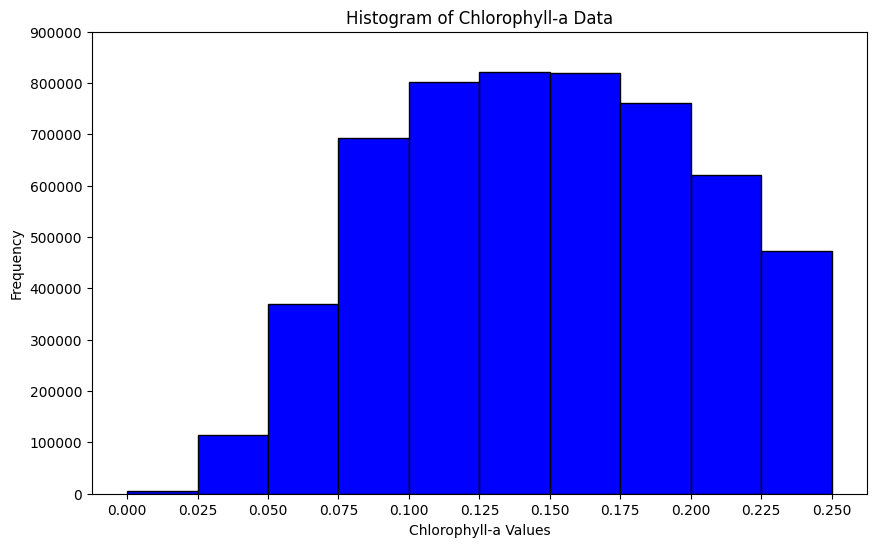

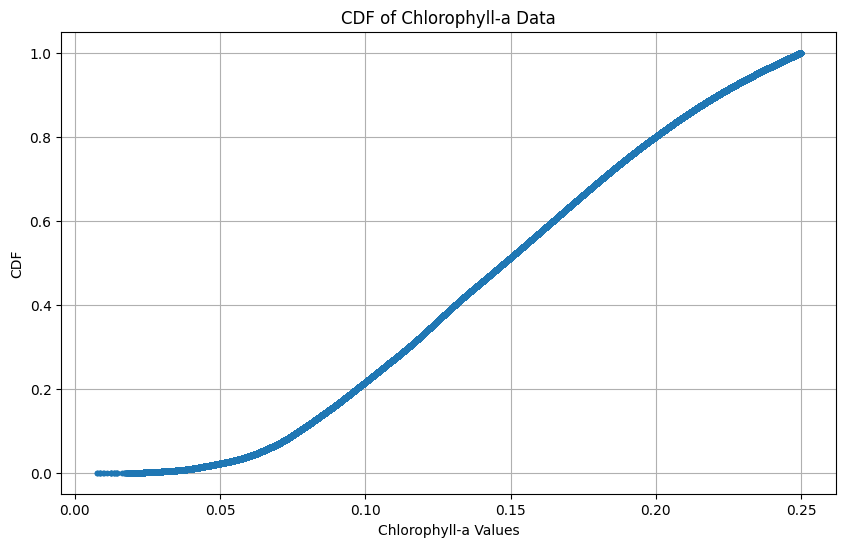


Value Range: (0, 0.1)
Fraction Valid: 0.03167328425068587
Mean: 0.07589171826839447
Standard Deviation: 0.017457779496908188
50th Percentile: 0.07905907183885574
80th Percentile: 0.09205272793769836
90th Percentile: 0.09605547189712524


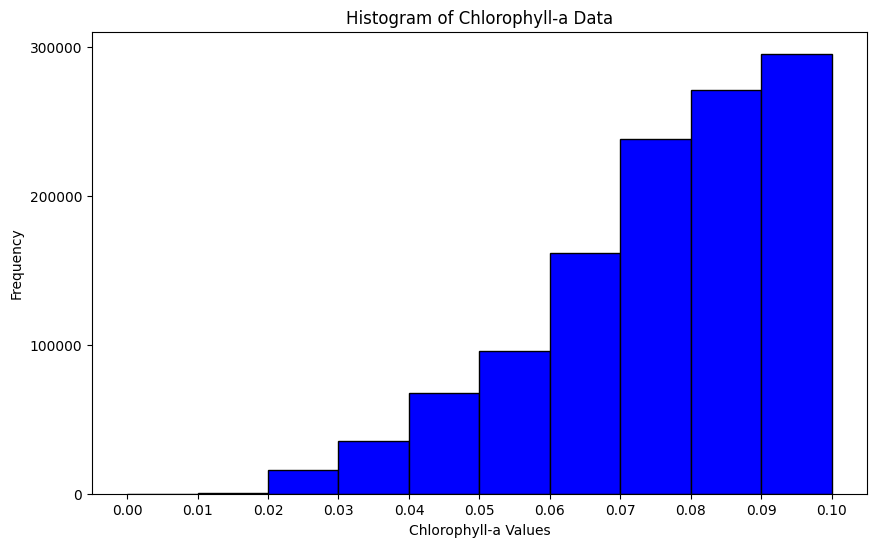

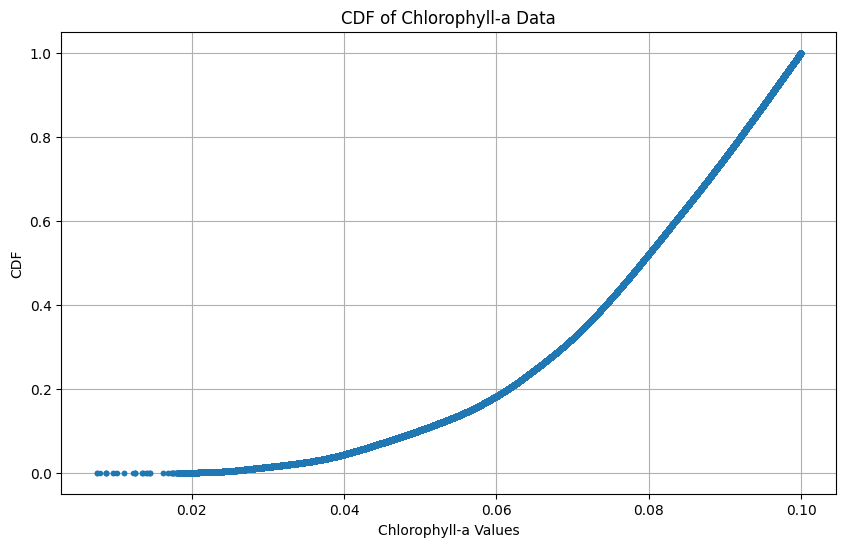


Value Range: (0.02, 1)
Fraction Valid: 0.22472661608367628
Mean: 0.24929647147655487
Standard Deviation: 0.17904087901115417
50th Percentile: 0.19326479732990265
80th Percentile: 0.35245054960250854
90th Percentile: 0.4937496483325958


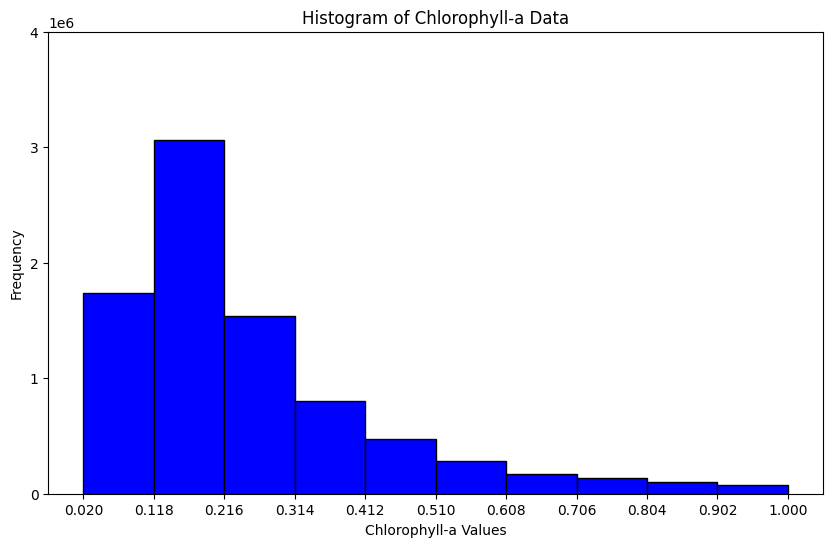

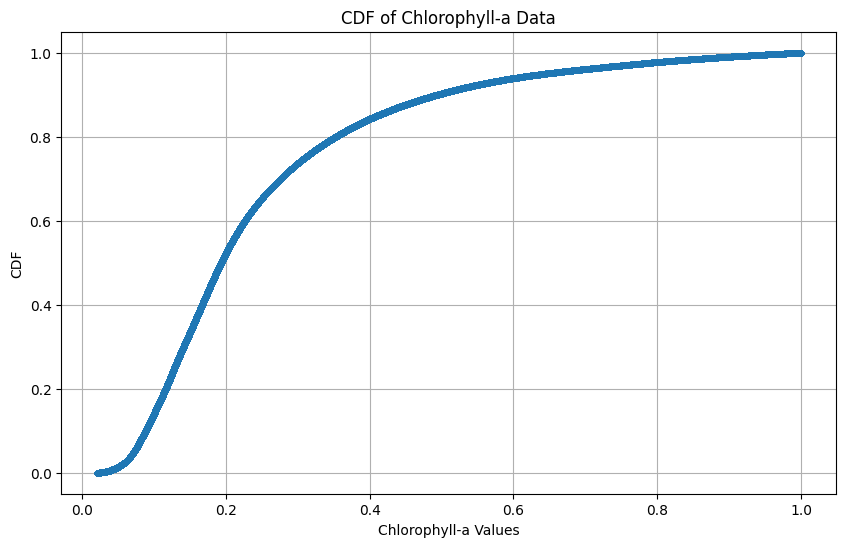


Value Range: (0.02, 0.5)
Fraction Valid: 0.20291942622599451
Mean: 0.20280523598194122
Standard Deviation: 0.10557357966899872
50th Percentile: 0.18002711236476898
80th Percentile: 0.2899563789367676
90th Percentile: 0.3653195381164551


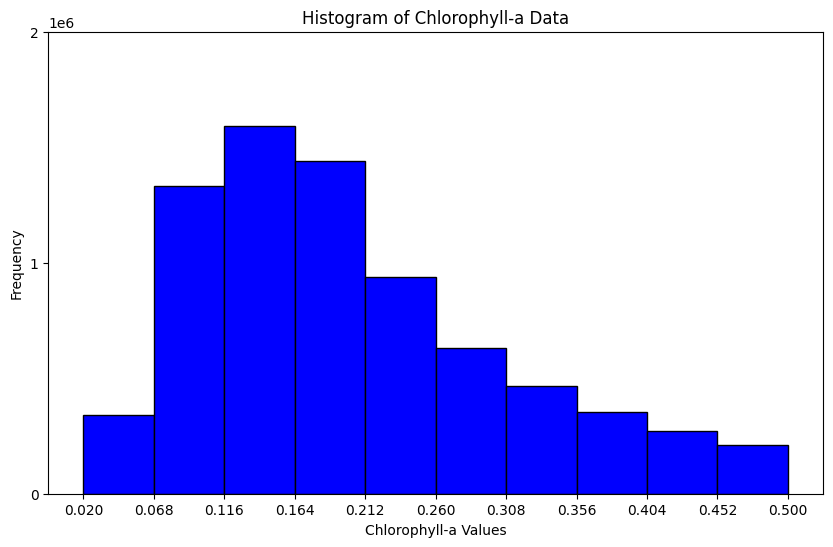

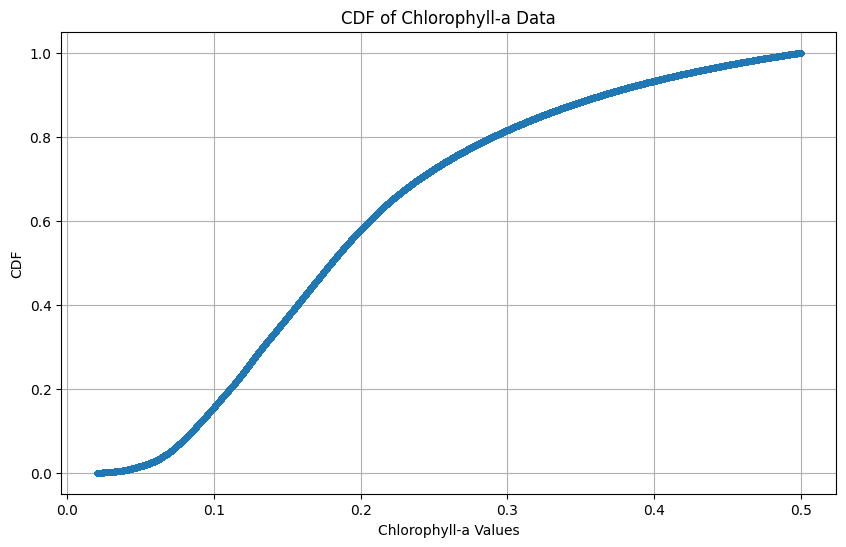


Value Range: (0.02, 0.25)
Fraction Valid: 0.14677793317043897
Mean: 0.14824160933494568
Standard Deviation: 0.05307631939649582
50th Percentile: 0.14793901145458221
80th Percentile: 0.19992829263210293
90th Percentile: 0.2216125011444092


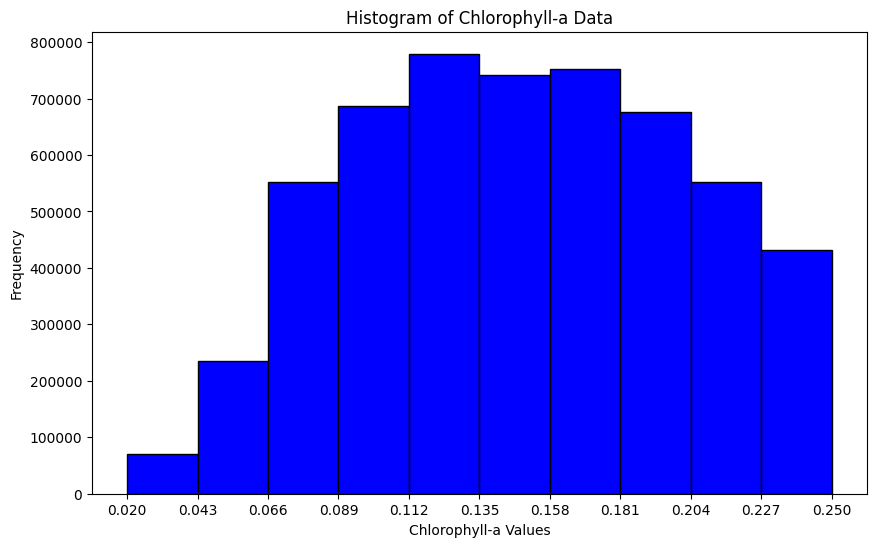

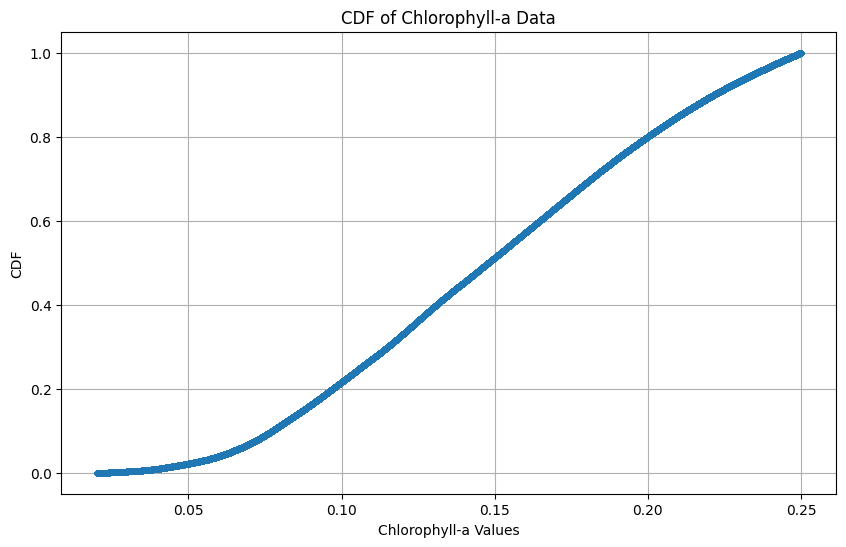


Value Range: (0.02, 0.1)
Fraction Valid: 0.03166489840534979
Mean: 0.07590695470571518
Standard Deviation: 0.017434947192668915
50th Percentile: 0.07906454801559448
80th Percentile: 0.09205463528633118
90th Percentile: 0.09605655446648598


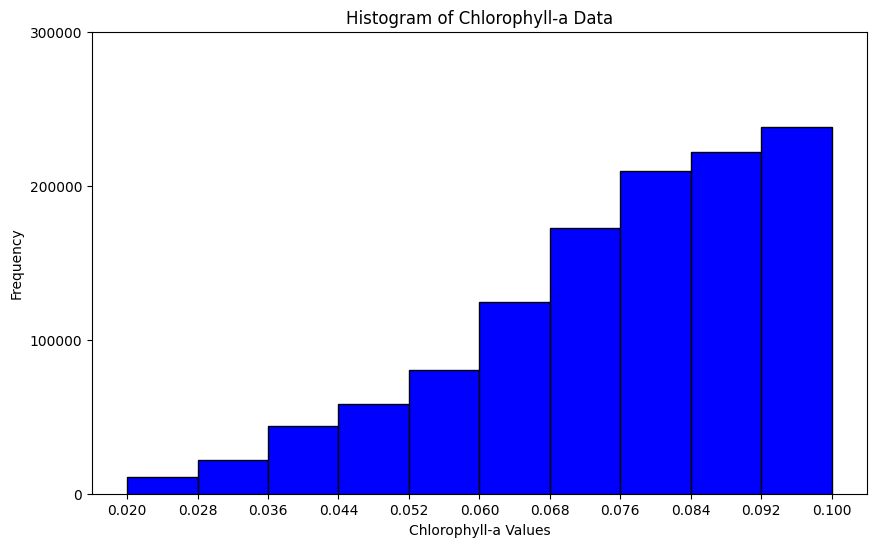

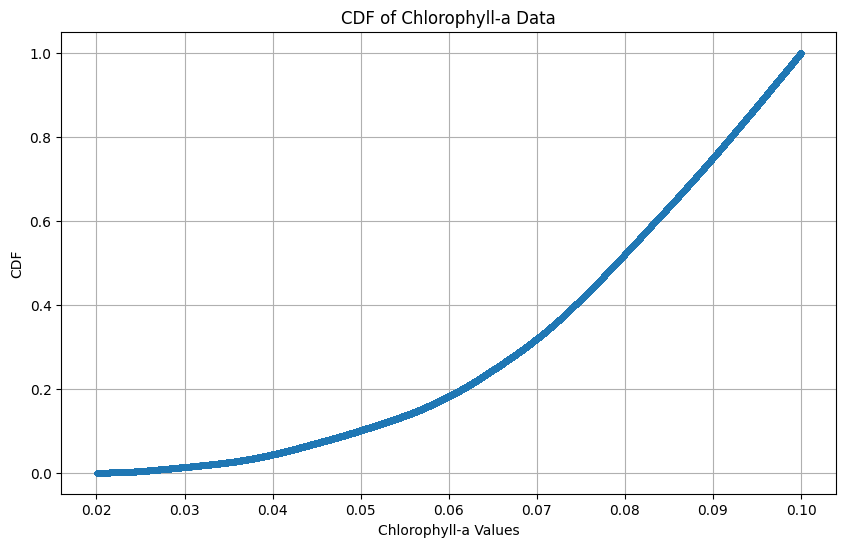

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

def plot_histogram(chlorA_data, value_range):
    chlorA_data = chlorA_data[(chlorA_data >= value_range[0]) & (chlorA_data <= value_range[1])]
    
    plt.figure(figsize=(10, 6))
    
    bins = np.linspace(value_range[0], value_range[1], 11)
    hist, bins, patches = plt.hist(chlorA_data, bins=bins, edgecolor='black', color='blue')
    
    plt.xticks(bins)
    
    y_max = max(hist)
    a = 10 ** (len(str(int(y_max))) - 1)
    arr = np.arange(0, y_max + a, a)
    
    plt.yticks(arr)
    
    plt.xlabel('Chlorophyll-a Values')
    plt.ylabel('Frequency')
    plt.title('Histogram of Chlorophyll-a Data')
    
    plt.show()

def plot_cdf(value_range, chlorA_data):
    filtered_data = chlorA_data[(chlorA_data >= value_range[0]) & (chlorA_data <= value_range[1])]
    sorted_data = np.sort(filtered_data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_data, cdf, marker='.', linestyle='none')
    
    plt.xlabel('Chlorophyll-a Values')
    plt.ylabel('CDF')
    plt.title('CDF of Chlorophyll-a Data')
    plt.grid(True)
    plt.show()

nc_file = nc.Dataset('AQUA_MODIS.20020101_20021231.L3m.YR.CHL.chlor_a.4km.nc', 'r')
chlorA_data = nc_file.variables['chlor_a'][:]
fill_value = -32767.0
chlorA_data = np.where(chlorA_data == fill_value, np.nan, chlorA_data)

latitudes = nc_file.variables['lat'][:]
longitudes = nc_file.variables['lon'][:]
nc_file.close()

latitude_bands = {
    "30N-30S": (latitudes >= -30) & (latitudes <= 30),
    "60N-60S": (latitudes >= -60) & (latitudes <= 60),
    "90N-90S": np.full_like(latitudes, True, dtype=bool),
    "(30-60)N-(30-60)S": ((latitudes >= -60) & (latitudes <= -30)) | ((latitudes >= 30) & (latitudes <= 60))
}

# Define value ranges
value_ranges = [
    (0, 1), (0, 0.5), (0, 0.25), (0, 0.1),
    (0.02, 1), (0.02, 0.5), (0.02, 0.25), (0.02, 0.1)
]

def calculate_metrics(chlorA_data):
    mean_value = np.nanmean(chlorA_data)
    std_dev = np.nanstd(chlorA_data)
    percentiles = np.nanpercentile(chlorA_data, [50, 80, 90])
    return mean_value, std_dev, percentiles

regional_pixels = chlorA_data.size

# Loop through latitude bands and value ranges
for band_name, band_filter in latitude_bands.items():
    band_lat_indices = np.where(band_filter)[0]
    filtered_data = chlorA_data[band_lat_indices, :]

    print(f"\nLatitude Band: {band_name}")
    for value_range in value_ranges:
        range_filter = (filtered_data >= value_range[0]) & (filtered_data <= value_range[1])
        valid_pixels = np.sum(range_filter)
        Fraction_Valid = valid_pixels / regional_pixels
        
        if valid_pixels > 0:
            filtered_values = filtered_data[range_filter]
            mean_value, std_dev, percentiles = calculate_metrics(filtered_values)
            print(f"\nValue Range: {value_range}")
            print(f"Fraction Valid: {Fraction_Valid}")
            print(f"Mean: {mean_value}")
            print(f"Standard Deviation: {std_dev}")
            print(f"50th Percentile: {percentiles[0]}")
            print(f"80th Percentile: {percentiles[1]}")
            print(f"90th Percentile: {percentiles[2]}")
            plot_histogram(filtered_values, value_range)
            plot_cdf(value_range, filtered_values)
        else:
            print(f"\nValue Range: {value_range}")
            print("No data in this range.")
